# 🧠 CATalyst Studios Makerspace Data Analysis
## Credit Utilization Trends & Data Visualization
### 📊 Capstone Project – Spring 2025

**Author**: Ashwini R Jannu  
**Program**: MS in Information Science, University of Arizona  
**Mentors**: Jennifer Nicols & Hana Lipke  
**Instructor**: Dr. Greg Chism  
**Date**: May 2025

---

### 📌 Project Summary

This notebook presents a complete analysis of how students at the University of Arizona utilize their one-time $50 CATalyst Studios credit. The goal is to uncover patterns in usage across students, departments, and semesters using structured data processing and visual analytics.

CATalyst Studios, located within the UA Libraries, offers access to digital fabrication tools (3D printers, laser cutters, sewing machines, etc.). Every student receives a $50 material credit, but there has been limited visibility into how that credit is used.

This project:
- Extracts balance usage from unstructured text fields using **Python + Regex**
- Analyzes usage patterns using **Pandas** and **Matplotlib**
- Visualizes results to help identify underutilized credit segments
- Prepares insights to guide better outreach and resource planning at CATalyst

---

### 🧰 Tools & Techniques Used:
- Python (Pandas, NumPy, Regex, Matplotlib)
- Exploratory Data Analysis (EDA)
- Data cleaning and transformation
- Visualization and summary reporting

In [2]:
# importing necessary libraries 
import pandas as pd 
import numpy as np
import re

In [4]:
# Loading the original dataset 
df = pd.read_excel("Catalyst Student Credit Report (1).xlsx")
df

Statistical Category Type   Statistical Category Description  \
0         CATalyst Free Money    CATalyst Free Money Spring 2024   
1         CATalyst Free Money    CATalyst Free Money Spring 2024   
2         CATalyst Free Money  CATalyst Free Money Pre Fall 2023   
3         CATalyst Free Money     CATalyst Free Money Under Grad   
4         CATalyst Free Money      CATalyst Free Money Fall 2023   
..                        ...                                ...   
775       CATalyst Free Money    CATalyst Free Money Spring 2024   
776       CATalyst Free Money      CATalyst Free Money Fall 2023   
777       CATalyst Free Money  CATalyst Free Money Pre Fall 2023   
778       CATalyst Free Money  CATalyst Free Money Pre Fall 2023   
779       CATalyst Free Money  CATalyst Free Money Pre Fall 2023   

    Primary Identifier    Status  Number of Users   Statistical Category 01  \
0         100023296406    Active                1     Undergrad - Sophomore   
1         100023296406    Active                1     Undergrad - Sophomore   
2         100051187886  Inactive                1        Undergrad - Senior   
3         100051187886  Inactive                1        Undergrad - Senior   
4         100051187886  Inactive                1        Undergrad - Senior   
..                 ...       ...              ...                       ...   
775                NaN   Deleted                1        Undergrad - Senior   
776                NaN   Deleted                1  No Student Status in EDS   
777                NaN   Deleted                1  No Student Status in EDS   
778                NaN   Deleted                1  No Student Status in EDS   
779                NaN   Deleted                1        Undergrad - Senior   

                 Statistical Category 03  \
0                Applied Humanities - BA   
1                Applied Humanities - BA   
2    Ecology & Evolutionary Biology - BS   
3    Ecology & Evolutionary Biology - BS   
4    Ecology & Evolutionary Biology - BS   
..                                   ...   
775                Computer Science - BS   
776         Chemical Engineering - BSCHE   
777                    Architecture - BA   
778                                  NaN   
779                Computer Science - BS   

                                       Statistics Note  
0    Remaining $27.60\n$18.40 - vinyl -vc\nUsed $4....  
1                           vinyl $7 $39 remaining 2/5  
2                         6/12 - $22.80 - LASER - HL\n  
3         Balance $43.00\n09/19 - PLYWOOD - $7.00 - JN  
4    Balance: $13.16\n? - $4 - LASER - ?\n? - $4 - ...  
..                                                 ...  
775           Balance: $47.30\n1/24 - $2.70 - FDM - AE  
776          Balance: $47.84\n11/13 - $2.16 - FDM - AS  
777  Used 1.30 on 5.4.23 Balance 48.7; used 12 on 5...  
778                   used $3 on 1/19/2023 balance $47  
779  used 3.2 on 3/27/23. balance: 46.3; used 10 on...  

[780 rows x 8 columns]

# Data Cleaning & Exploratory Data Analysis 

In [6]:
# Check the content of the 'Statistics Note' column to understand the format.
# 'Statistic note' is the target column. The balance is supposed to be extracted from this column
df['Statistics Note'][0]

'Remaining $27.60\n$18.40 - vinyl -vc\nUsed $4.00 vinyl - vc'

In [ ]:
# ---------------------------------------------
# Data Cleaning with Regular Expressions (Regex)
# ---------------------------------------------
# The 'Statistics Note' column contains unstructured text describing the student's remaining credit balance.
# These notes vary in format (e.g., "Remaining: $23.50", "Balance $0.00", "You have $15 left", etc.)
# 
# To extract consistent numeric values from this messy text, we use Regex:
#  - First, we search for keywords like "Balance", "Remaining", or "Left" followed by a dollar amount.
#  - Then, we extract the actual numeric part from the matched string.
#  - The result is a clean float value representing the final balance for each student.
#
# This step transforms unstructured comments into usable numeric data for further analysis.


In [8]:
import re

# Function to extract only the final balance from the "Statistics Note"
def extract_final_balance(note):
    if isinstance(note, str):  # Ensure the value is a string
        # Search for "Balance" or "Remaining" followed by a dollar amount
        match = re.search(r'(Balance[:\s]*\$\d+\.?\d*|Remaining[:\s]*\$\d+\.?\d*)', note, re.IGNORECASE)
        if match:
            # Extract the numeric value of the balance (e.g., $43.00 -> 43.00)
            balance = re.search(r'\d+\.?\d*', match.group())
            return float(balance.group()) if balance else None
    return None

# Apply the refined extraction function
df['Extracted Final Balance'] = df['Statistics Note'].apply(extract_final_balance)

# Display the data with extracted balances
df[['Primary Identifier', 'Statistics Note', 'Extracted Final Balance']]


Primary Identifier                                    Statistics Note  \
0         100023296406  Remaining $27.60\n$18.40 - vinyl -vc\nUsed $4....   
1         100023296406                         vinyl $7 $39 remaining 2/5   
2         100051187886                       6/12 - $22.80 - LASER - HL\n   
3         100051187886       Balance $43.00\n09/19 - PLYWOOD - $7.00 - JN   
4         100051187886  Balance: $13.16\n? - $4 - LASER - ?\n? - $4 - ...   
..                 ...                                                ...   
775                NaN           Balance: $47.30\n1/24 - $2.70 - FDM - AE   
776                NaN          Balance: $47.84\n11/13 - $2.16 - FDM - AS   
777                NaN  Used 1.30 on 5.4.23 Balance 48.7; used 12 on 5...   
778                NaN                   used $3 on 1/19/2023 balance $47   
779                NaN  used 3.2 on 3/27/23. balance: 46.3; used 10 on...   

     Extracted Final Balance  
0                      27.60  
1                        NaN  
2                        NaN  
3                      43.00  
4                      13.16  
..                       ...  
775                    47.30  
776                    47.84  
777                      NaN  
778                    47.00  
779                      NaN  

[780 rows x 3 columns]

In [10]:
import pandas as pd
import re

# Function to extract final balance based on keywords
def extract_final_balance(note):
    if isinstance(note, str):  # Ensure the value is a string
        # Search for keywords like "Balance", "Remaining", "Left" followed by a dollar amount
        match = re.search(r'(Balance[:\s]*\$\d+\.?\d*|Remaining[:\s]*\$\d+\.?\d*|Left[:\s]*\$\d+\.?\d*)', note, re.IGNORECASE)
        if match:
            # Extract the numeric value of the balance (e.g., $43.00 -> 43.00)
            balance = re.search(r'\d+\.?\d*', match.group())
            return float(balance.group()) if balance else None
    return None

# Load the dataset
file_path = 'Catalyst Student Credit Report (1).xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Apply the function to extract balances
df['Extracted Final Balance'] = df['Statistics Note'].apply(extract_final_balance)

# Display all columns with the extracted balance
print(df.head())

# Save the updated DataFrame to a new Excel file (optional)
output_file_path = 'output_with_balances.xlsx'
df.to_excel(output_file_path, index=False)
print(f"Updated file saved to {output_file_path}")


  Statistical Category Type   Statistical Category Description  \
0       CATalyst Free Money    CATalyst Free Money Spring 2024   
1       CATalyst Free Money    CATalyst Free Money Spring 2024   
2       CATalyst Free Money  CATalyst Free Money Pre Fall 2023   
3       CATalyst Free Money     CATalyst Free Money Under Grad   
4       CATalyst Free Money      CATalyst Free Money Fall 2023   

  Primary Identifier    Status  Number of Users Statistical Category 01  \
0       100023296406    Active                1   Undergrad - Sophomore   
1       100023296406    Active                1   Undergrad - Sophomore   
2       100051187886  Inactive                1      Undergrad - Senior   
3       100051187886  Inactive                1      Undergrad - Senior   
4       100051187886  Inactive                1      Undergrad - Senior   

               Statistical Category 03  \
0              Applied Humanities - BA   
1              Applied Humanities - BA   
2  Ecology & Evolutionary 

In [12]:
out = pd.read_excel('output_with_balances.xlsx')
out.isnull().sum()

Statistical Category Type             0
Statistical Category Description      0
Primary Identifier                    7
Status                                0
Number of Users                       0
Statistical Category 01               0
Statistical Category 03             113
Statistics Note                       1
Extracted Final Balance             177
dtype: int64

In [14]:
# Refined function to handle additional balance descriptions
def extract_final_balance_v3(note):
    if isinstance(note, str):  # Ensure the value is a string
        # Expanded regex to include additional keywords and patterns
        match = re.search(r'(Balance[:\s]*\$\d+\.?\d*|Remaining[:\s]*\$\d+\.?\d*|'
                          r'Left[:\s]*\$\d+\.?\d*|Still due[:\s]*\$\d+\.?\d*|'
                          r'\$\d+\.?\d*\s*(left|remaining|due))', note, re.IGNORECASE)
        if match:
            # Extract the numeric value of the balance (e.g., $43.00 -> 43.00)
            balance = re.search(r'\d+\.?\d*', match.group())
            return float(balance.group()) if balance else None
    return None

# Apply the improved function
df['Extracted Final Balance'] = df['Statistics Note'].apply(extract_final_balance_v3)

# Check records still marked as NaN
#nan_records = df[df['Extracted Final Balance'].isna()]
#print(f"Remaining NaN Records: {len(nan_records)}")
#print(nan_records[['Statistics Note']].head(10))  # Display some NaN records to analyze further


In [16]:
df['Extracted Final Balance'].isnull().sum()

171

In [ ]:
# Used Regex to extract balances from unstructured notes; manually filled missing values due to formatting inconsistencies.

In [22]:
df_out = pd.read_excel("out.xlsx")
df_out

Statistical Category Type   Statistical Category Description  \
0         CATalyst Free Money    CATalyst Free Money Spring 2024   
1         CATalyst Free Money    CATalyst Free Money Spring 2024   
2         CATalyst Free Money  CATalyst Free Money Pre Fall 2023   
3         CATalyst Free Money     CATalyst Free Money Under Grad   
4         CATalyst Free Money      CATalyst Free Money Fall 2023   
..                        ...                                ...   
773       CATalyst Free Money    CATalyst Free Money Spring 2024   
774       CATalyst Free Money      CATalyst Free Money Fall 2023   
775       CATalyst Free Money  CATalyst Free Money Pre Fall 2023   
776       CATalyst Free Money  CATalyst Free Money Pre Fall 2023   
777       CATalyst Free Money  CATalyst Free Money Pre Fall 2023   

    Primary Identifier    Status  Number of Users   Statistical Category 01  \
0         100023296406    Active                1     Undergrad - Sophomore   
1         100023296406    Active                1     Undergrad - Sophomore   
2         100051187886  Inactive                1        Undergrad - Senior   
3         100051187886  Inactive                1        Undergrad - Senior   
4         100051187886  Inactive                1        Undergrad - Senior   
..                 ...       ...              ...                       ...   
773                NaN   Deleted                1        Undergrad - Senior   
774                NaN   Deleted                1  No Student Status in EDS   
775                NaN   Deleted                1  No Student Status in EDS   
776                NaN   Deleted                1  No Student Status in EDS   
777                NaN   Deleted                1        Undergrad - Senior   

                 Statistical Category 03  \
0                Applied Humanities - BA   
1                Applied Humanities - BA   
2    Ecology & Evolutionary Biology - BS   
3    Ecology & Evolutionary Biology - BS   
4    Ecology & Evolutionary Biology - BS   
..                                   ...   
773                Computer Science - BS   
774         Chemical Engineering - BSCHE   
775                    Architecture - BA   
776                                  NaN   
777                Computer Science - BS   

                                       Statistics Note  \
0    Remaining $27.60\n$18.40 - vinyl -vc\nUsed $4....   
1                           vinyl $7 $39 remaining 2/5   
2                         6/12 - $22.80 - LASER - HL\n   
3         Balance $43.00\n09/19 - PLYWOOD - $7.00 - JN   
4    Balance: $13.16\n? - $4 - LASER - ?\n? - $4 - ...   
..                                                 ...   
773           Balance: $47.30\n1/24 - $2.70 - FDM - AE   
774          Balance: $47.84\n11/13 - $2.16 - FDM - AS   
775  Used 1.30 on 5.4.23 Balance 48.7; used 12 on 5...   
776                   used $3 on 1/19/2023 balance $47   
777  used 3.2 on 3/27/23. balance: 46.3; used 10 on...   

     Extracted Final Balance  
0                      27.60  
1                      39.00  
2                      22.80  
3                      43.00  
4                      13.16  
..                       ...  
773                    47.30  
774                    47.84  
775                    36.70  
776                    47.00  
777                    17.14  

[778 rows x 9 columns]

In [24]:
# Average amt of credit used overall ( 2023 - present) 
df_out['Extracted Final Balance'].mean()

36.345446272493575

# Data Visualization 

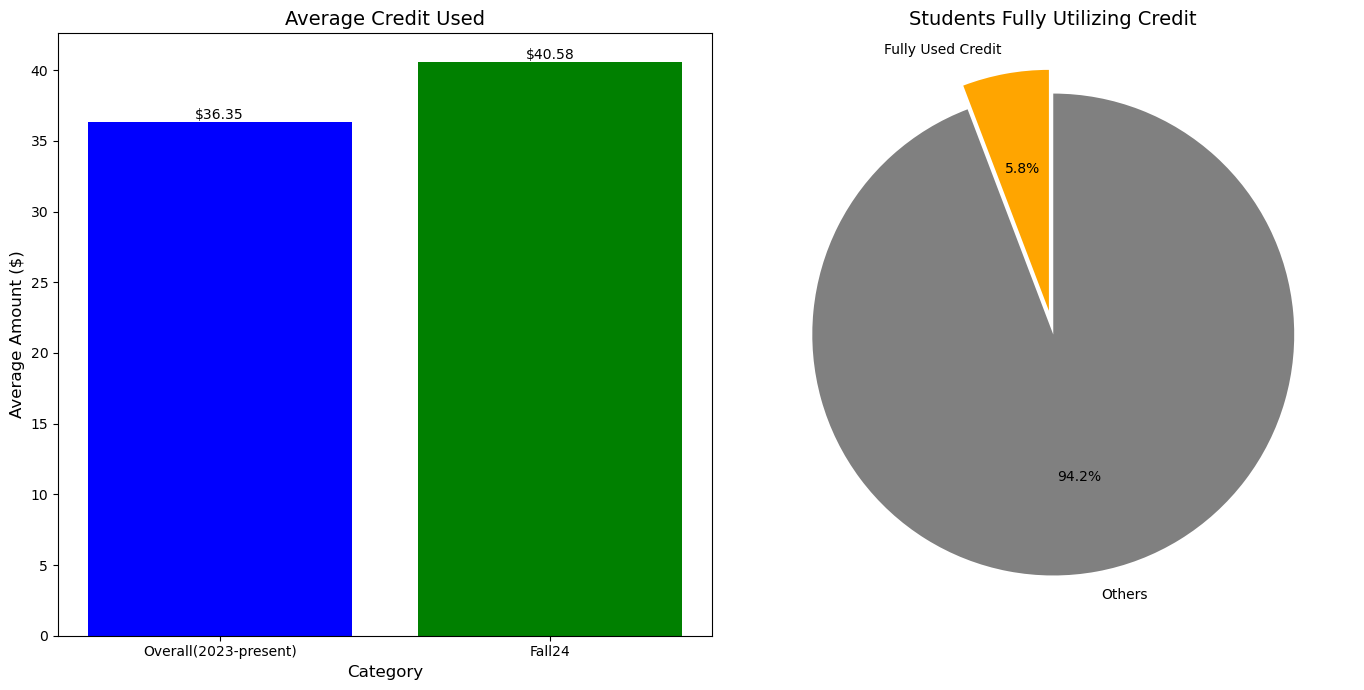

Average Credit used Overall( 2023- present) : $ 36.35
Average Credit used in Fall24 : $ 40.58
Number of Students who fully utilized credit: 45


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

df = pd.read_excel('out.xlsx')

# 1. Calculate the average credit used overall
df['Credit Used'] = df['Extracted Final Balance'].fillna(0)  # Ensure no missing values
avg_credit_used_overall = df['Credit Used'].mean()

# 2. Filter data for specific categories and calculate average of Extracted Final Balance
specific_categories = ["CATalyst Free Money Grad", "CATalyst Free Money Under Grad"]
category_filter = df['Statistical Category Description'].isin(specific_categories)

filtered_data = df[category_filter]
avg_balance_specific_categories = filtered_data['Extracted Final Balance'].mean()

# 3. Count students who used their credit completely (Extracted Final Balance = 0)
students_full_credit_used = df[df['Extracted Final Balance'] == 0].shape[0]

# 4. Visualizations
plt.figure(figsize=(14, 7))

# Average credit used visualization
plt.subplot(1, 2, 1)
categories = ['Overall(2023-present)', 'Fall24']
averages = [avg_credit_used_overall, avg_balance_specific_categories]
bars = plt.bar(categories, averages, color=['blue', 'green'])
plt.title('Average Credit Used', fontsize=14)
plt.ylabel('Average Amount ($)', fontsize=12)
plt.xlabel('Category', fontsize=12)

# Adding data labels to the bar chart
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"${height:.2f}", ha='center', va='bottom', fontsize=10)

# Students using full credit visualization
plt.subplot(1, 2, 2)
labels = ['Fully Used Credit', 'Others']
sizes = [students_full_credit_used, df.shape[0] - students_full_credit_used]
colors = ['orange', 'grey']
explode = (0.1, 0)  # Slightly "explode" the first slice
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Students Fully Utilizing Credit', fontsize=14)

# Display the plots
plt.tight_layout()
plt.show()

# Display calculated results
print("Average Credit used Overall( 2023- present) : $", round(avg_credit_used_overall, 2))
print("Average Credit used in Fall24 : $", round(avg_balance_specific_categories, 2))
print("Number of Students who fully utilized credit:", students_full_credit_used)


In [7]:
df.columns 

Index(['Statistical Category Type', 'Statistical Category Description',
       'Primary Identifier', 'Status', 'Number of Users',
       'Statistical Category 01', 'Statistical Category 03', 'Statistics Note',
       'Extracted Final Balance', 'Credit Used'],
      dtype='object')

In [25]:
df['Statistical Category Description'].unique()

array(['CATalyst Free Money Spring 2024',
       'CATalyst Free Money Pre Fall 2023',
       'CATalyst Free Money Under Grad', 'CATalyst Free Money Fall 2023',
       'CATalyst Free Money Grad', 'CATalyst Free Money Summer 2024'],
      dtype=object)

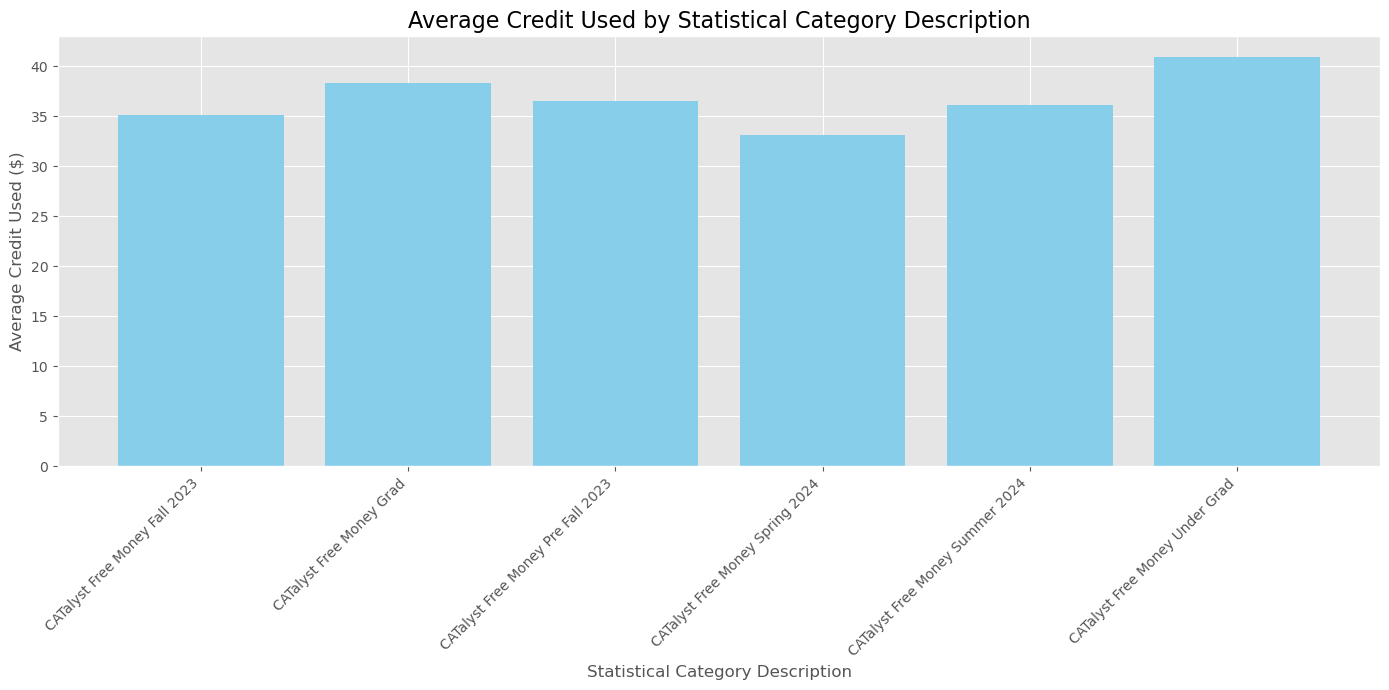

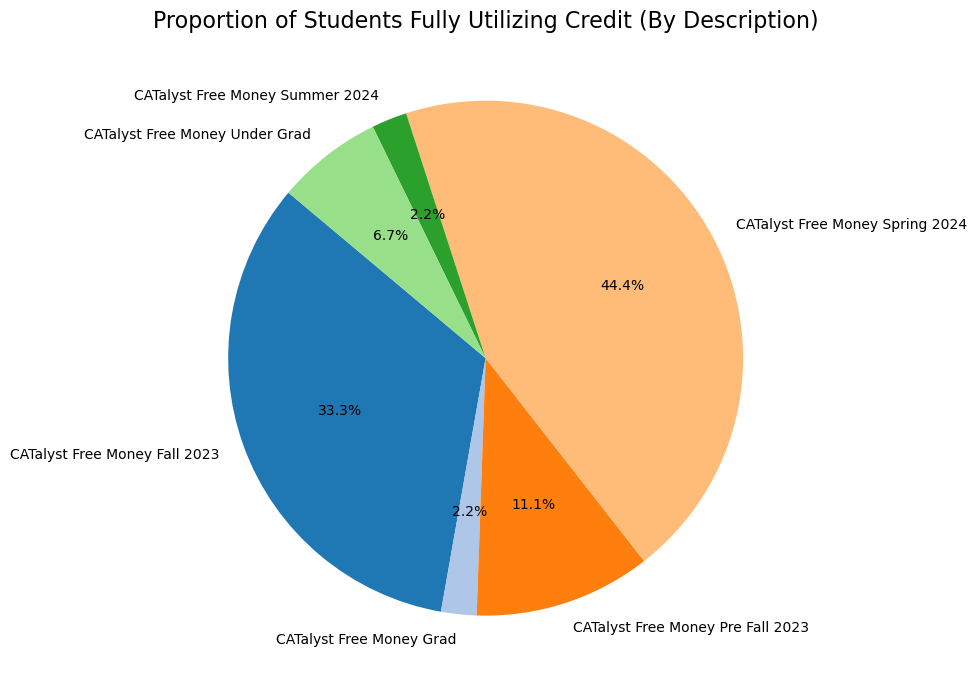

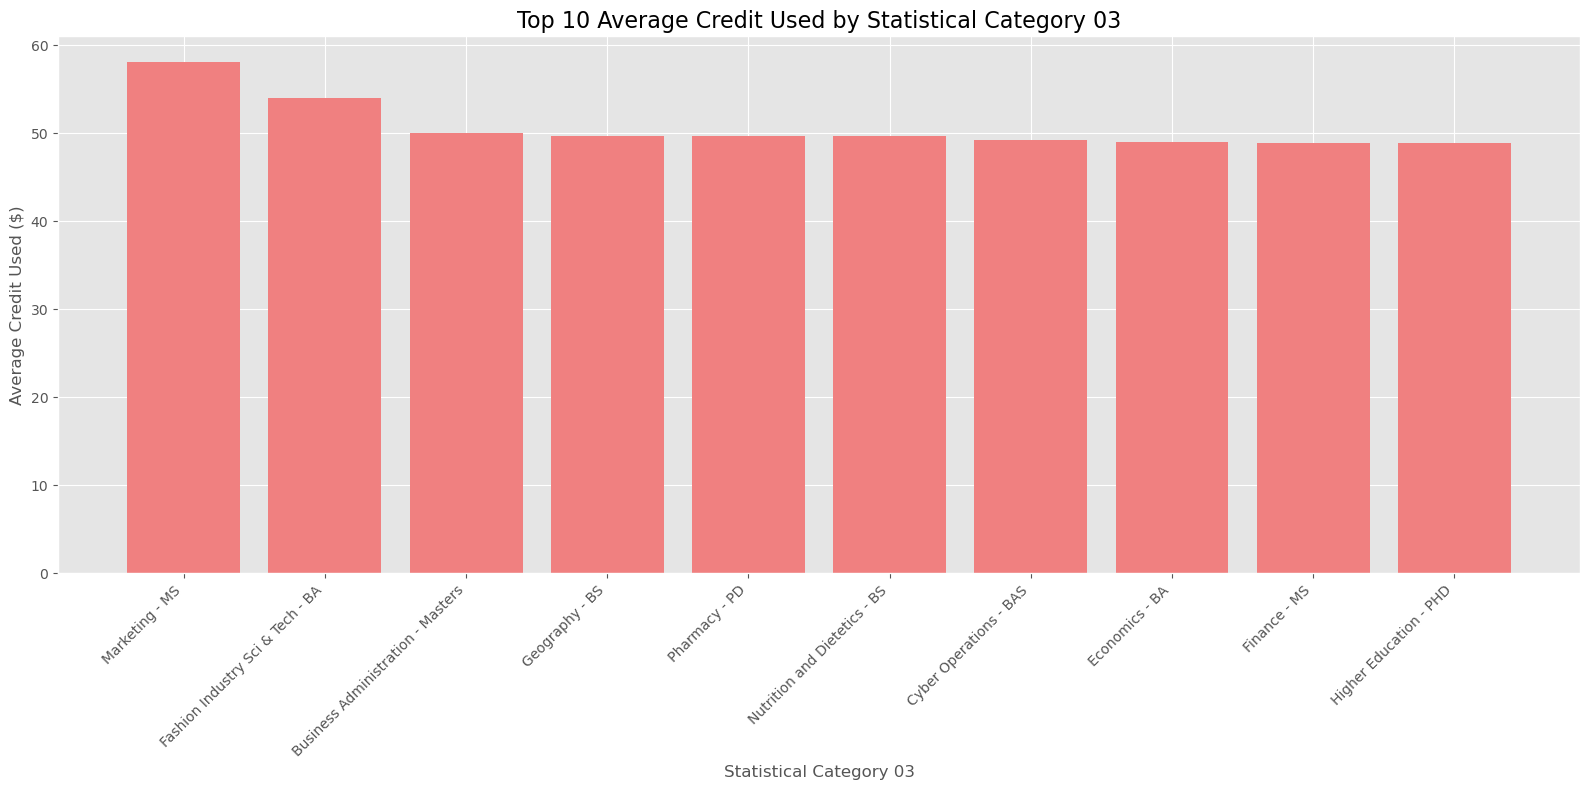

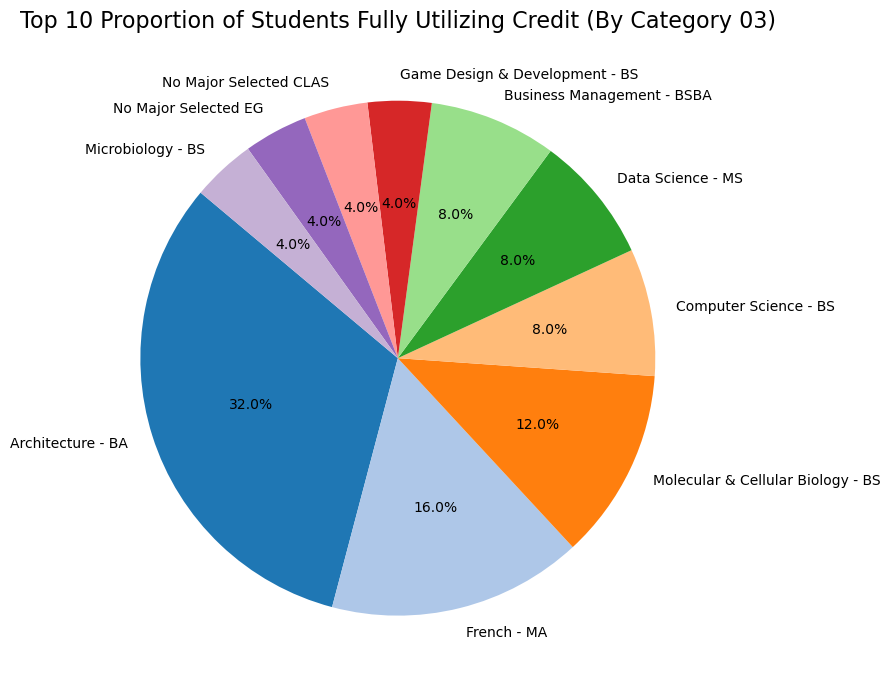

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

df = pd.read_excel('out.xlsx')

# 1. Calculate average credit used and number of students who fully used credit across Statistical Category Description
category_description_stats = df.groupby('Statistical Category Description')['Extracted Final Balance'].agg(
    Avg_Credit_Used=lambda x: x.fillna(0).mean(),
    Fully_Used_Credit=lambda x: (x == 0).sum()
).reset_index()

# 2. Calculate average credit used and number of students who fully used credit across Statistical Category 03
category_03_stats = df.groupby('Statistical Category 03')['Extracted Final Balance'].agg(
    Avg_Credit_Used=lambda x: x.fillna(0).mean(),
    Fully_Used_Credit=lambda x: (x == 0).sum()
).reset_index()

# Set up the visualization style
plt.style.use('ggplot')  # Use a valid Matplotlib style

# 1. Bar Chart for Statistical Category Description
plt.figure(figsize=(14, 7))
plt.bar(category_description_stats['Statistical Category Description'],
        category_description_stats['Avg_Credit_Used'],
        color='skyblue')
plt.title('Average Credit Used by Statistical Category Description', fontsize=16)
plt.xlabel('Statistical Category Description', fontsize=12)
plt.ylabel('Average Credit Used ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# 2. Pie Chart for Fully Used Credit in Statistical Category Description
plt.figure(figsize=(10, 7))
sizes = category_description_stats['Fully_Used_Credit']
labels = category_description_stats['Statistical Category Description']
colors = plt.cm.tab20.colors[:len(labels)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proportion of Students Fully Utilizing Credit (By Description)', fontsize=16)
plt.tight_layout()
plt.show()

# 3. Bar Chart for Statistical Category 03
plt.figure(figsize=(16, 8))
top_categories_03 = category_03_stats.sort_values(by='Avg_Credit_Used', ascending=False).head(10)
plt.bar(top_categories_03['Statistical Category 03'], 
        top_categories_03['Avg_Credit_Used'], 
        color='lightcoral')
plt.title('Top 10 Average Credit Used by Statistical Category 03', fontsize=16)
plt.xlabel('Statistical Category 03', fontsize=12)
plt.ylabel('Average Credit Used ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# 4. Pie Chart for Fully Used Credit in Statistical Category 03
top_fully_used_03 = category_03_stats.sort_values(by='Fully_Used_Credit', ascending=False).head(10)
plt.figure(figsize=(10, 7))
sizes = top_fully_used_03['Fully_Used_Credit']
labels = top_fully_used_03['Statistical Category 03']
colors = plt.cm.tab20.colors[:len(labels)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Top 10 Proportion of Students Fully Utilizing Credit (By Category 03)', fontsize=16)
plt.tight_layout()
plt.show()


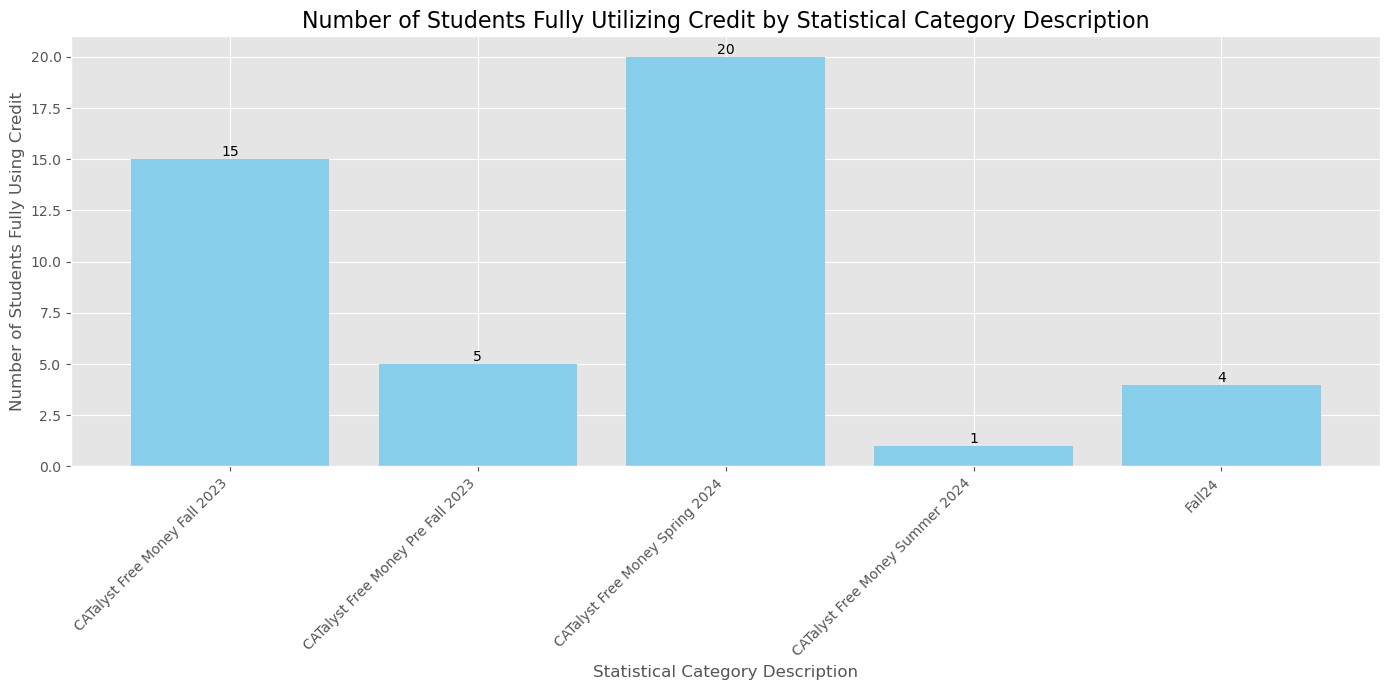

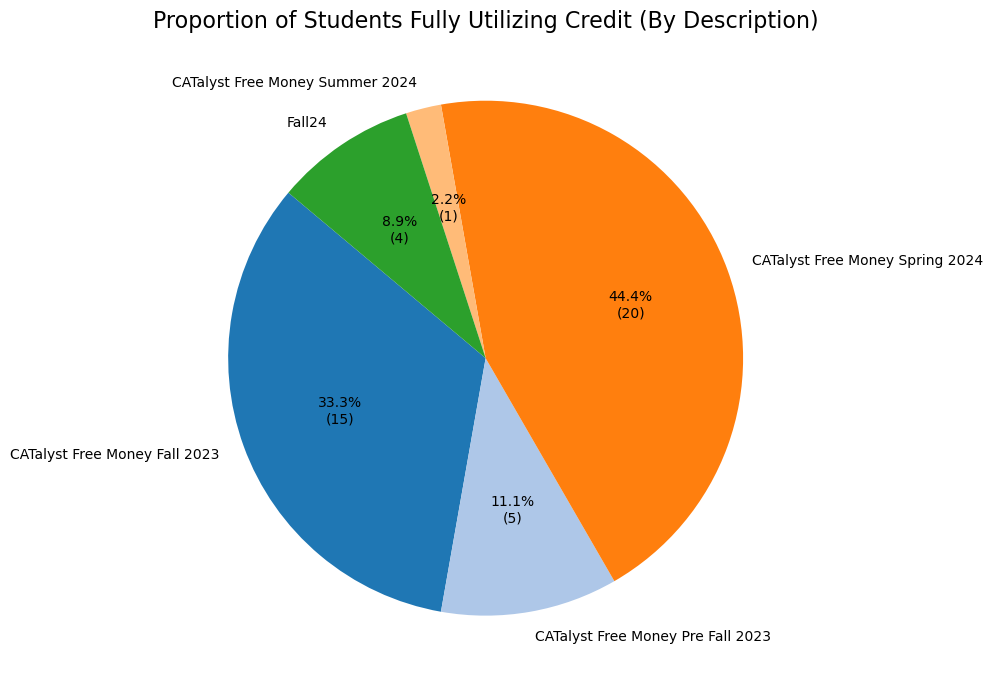

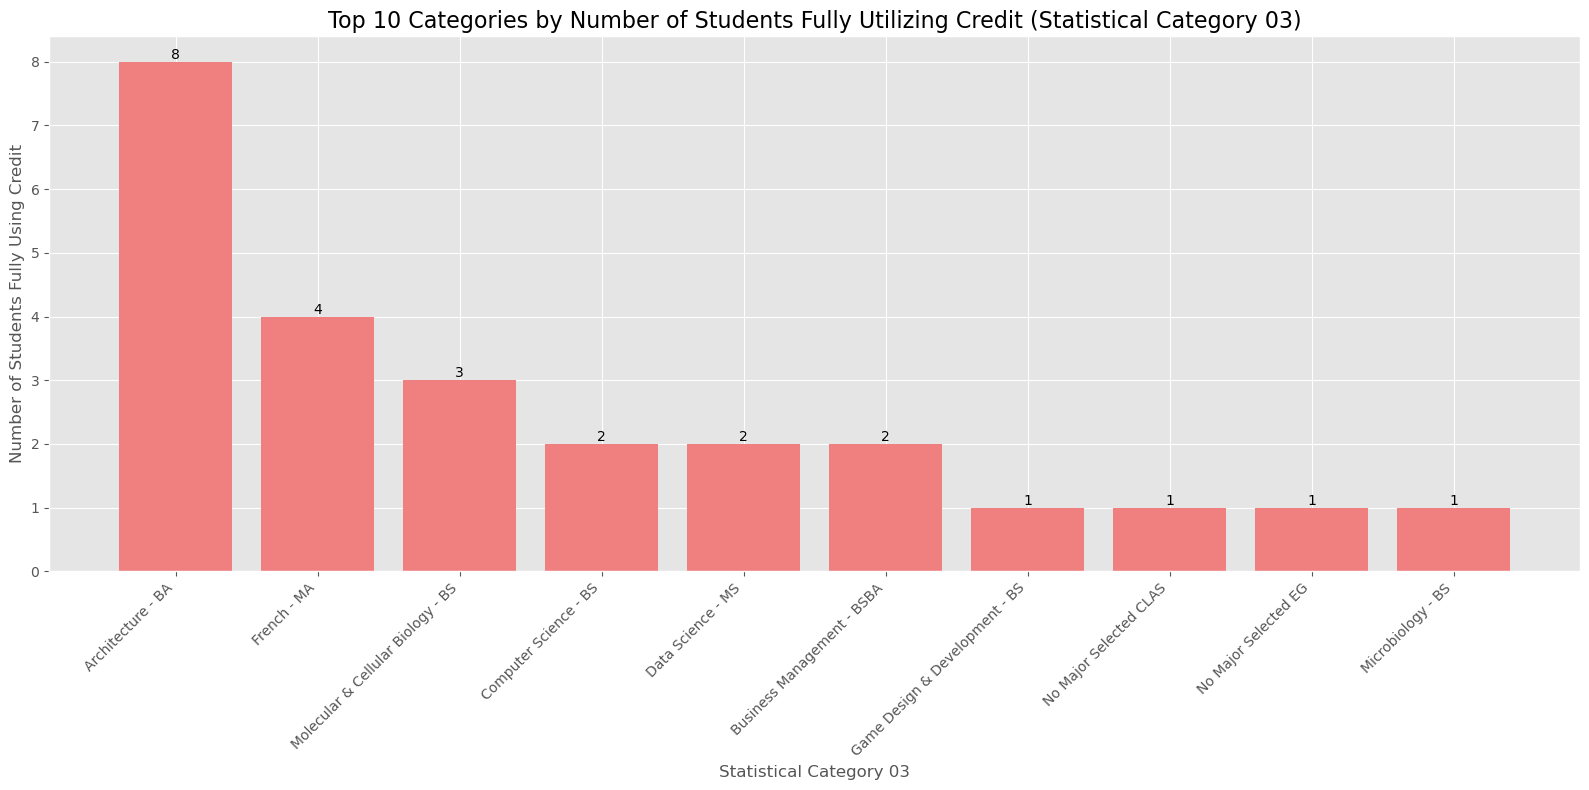

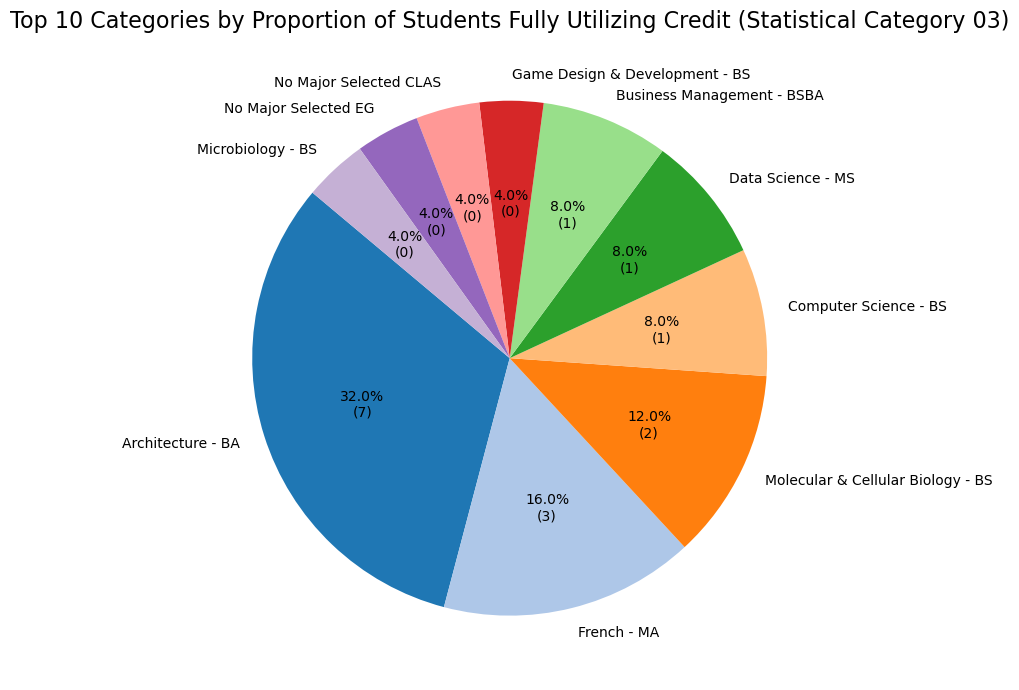

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

df = pd.read_excel('out.xlsx')

# Combine "CATalyst Free Money Grad" and "CATalyst Free Money Under Grad" into one category called "Fall24"
df['Statistical Category Description'] = df['Statistical Category Description'].replace(
    {"CATalyst Free Money Grad": "Fall24", "CATalyst Free Money Under Grad": "Fall24"}
)

# 1. Calculate average credit used and number of students who fully used credit across Statistical Category Description
category_description_stats = df.groupby('Statistical Category Description')['Extracted Final Balance'].agg(
    Avg_Credit_Used=lambda x: x.fillna(0).mean(),
    Fully_Used_Credit=lambda x: (x == 0).sum(),
    Count='count'
).reset_index()

# 2. Calculate average credit used and number of students who fully used credit across Statistical Category 03
category_03_stats = df.groupby('Statistical Category 03')['Extracted Final Balance'].agg(
    Avg_Credit_Used=lambda x: x.fillna(0).mean(),
    Fully_Used_Credit=lambda x: (x == 0).sum(),
    Count='count'
).reset_index()

# Set up the visualization style
plt.style.use('ggplot')

# 1. Bar Chart for Statistical Category Description
plt.figure(figsize=(14, 7))
bars = plt.bar(category_description_stats['Statistical Category Description'],
               category_description_stats['Fully_Used_Credit'],
               color='skyblue')
plt.title('Number of Students Fully Utilizing Credit by Statistical Category Description', fontsize=16)
plt.xlabel('Statistical Category Description', fontsize=12)
plt.ylabel('Number of Students Fully Using Credit', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Pie Chart for Fully Used Credit in Statistical Category Description
plt.figure(figsize=(10, 7))
sizes = category_description_stats['Fully_Used_Credit']
labels = category_description_stats['Statistical Category Description']
colors = plt.cm.tab20.colors[:len(labels)]
plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(sizes) / 100)})', startangle=140, colors=colors)
plt.title('Proportion of Students Fully Utilizing Credit (By Description)', fontsize=16)
plt.tight_layout()
plt.show()

# 3. Bar Chart for Statistical Category 03
plt.figure(figsize=(16, 8))
top_categories_03 = category_03_stats.sort_values(by='Fully_Used_Credit', ascending=False).head(10)
bars = plt.bar(top_categories_03['Statistical Category 03'], 
               top_categories_03['Fully_Used_Credit'], 
               color='lightcoral')
plt.title('Top 10 Categories by Number of Students Fully Utilizing Credit (Statistical Category 03)', fontsize=16)
plt.xlabel('Statistical Category 03', fontsize=12)
plt.ylabel('Number of Students Fully Using Credit', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 4. Pie Chart for Fully Used Credit in Statistical Category 03
top_fully_used_03 = category_03_stats.sort_values(by='Fully_Used_Credit', ascending=False).head(10)
plt.figure(figsize=(10, 7))
sizes = top_fully_used_03['Fully_Used_Credit']
labels = top_fully_used_03['Statistical Category 03']
colors = plt.cm.tab20.colors[:len(labels)]
plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(sizes) / 100)})', startangle=140, colors=colors)
plt.title('Top 10 Categories by Proportion of Students Fully Utilizing Credit (Statistical Category 03)', fontsize=16)
plt.tight_layout()
plt.show()


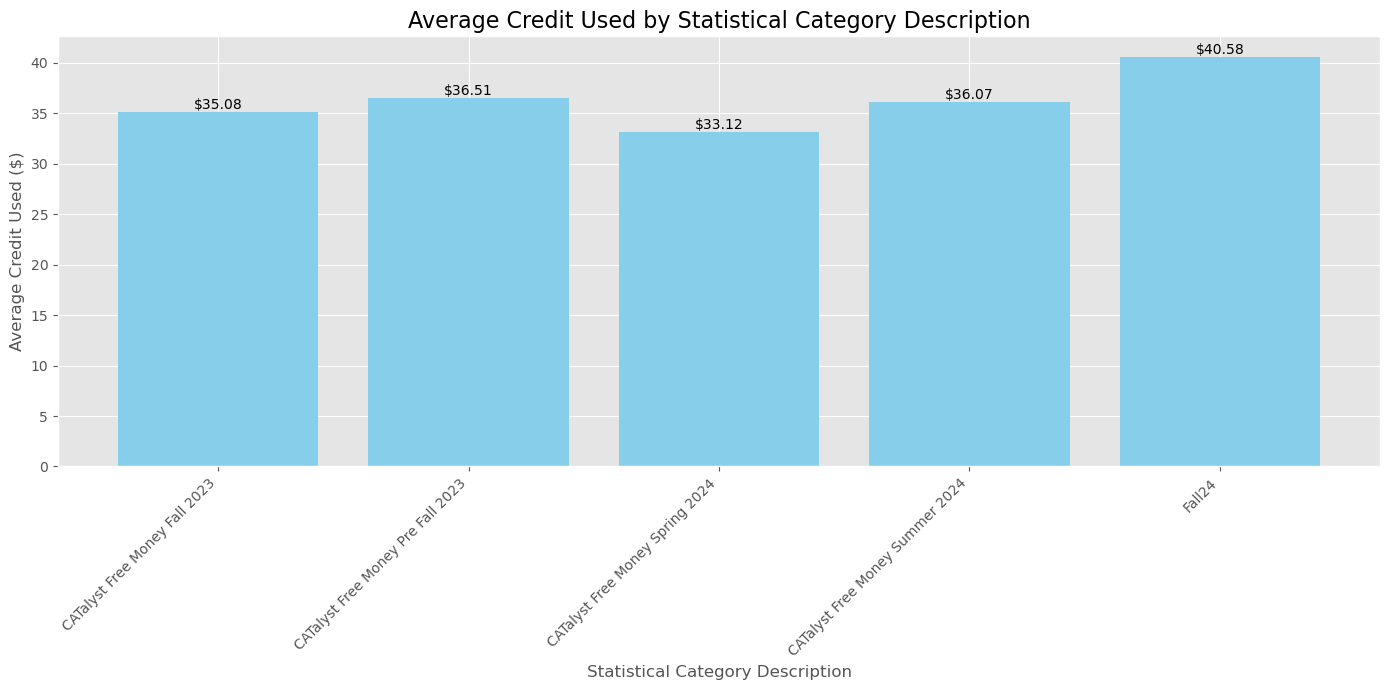

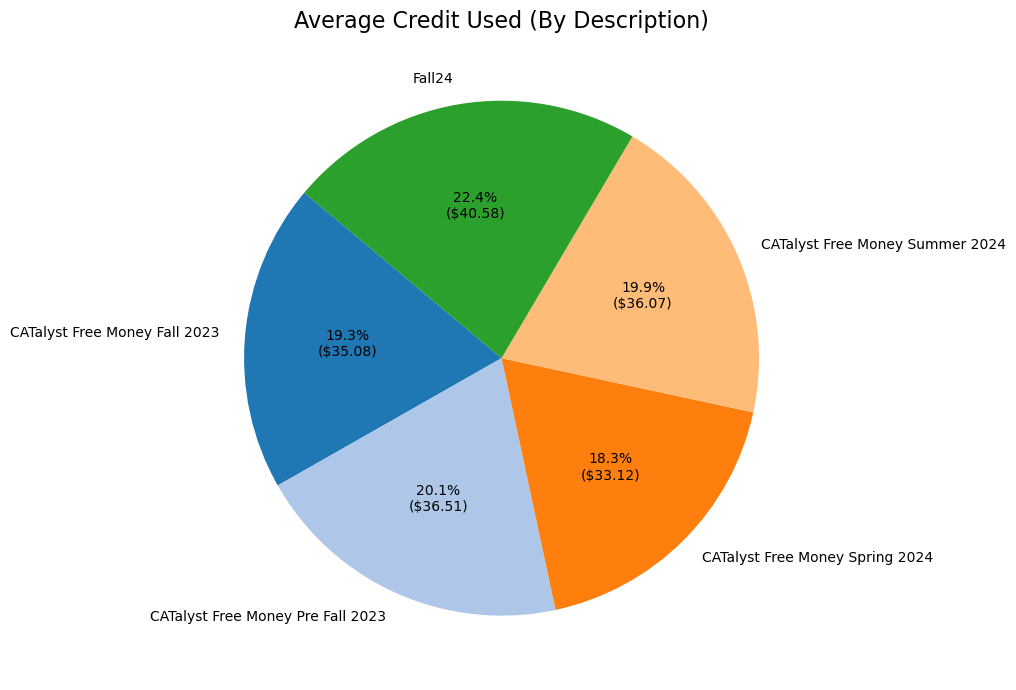

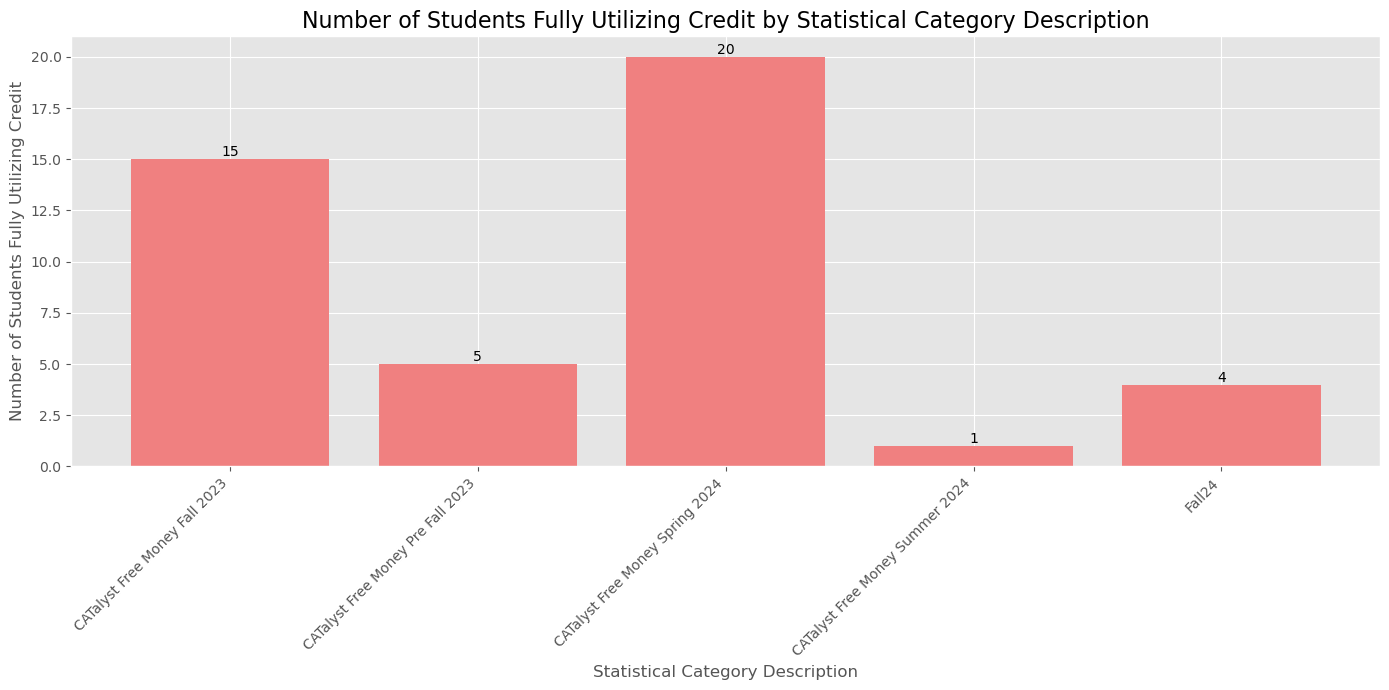

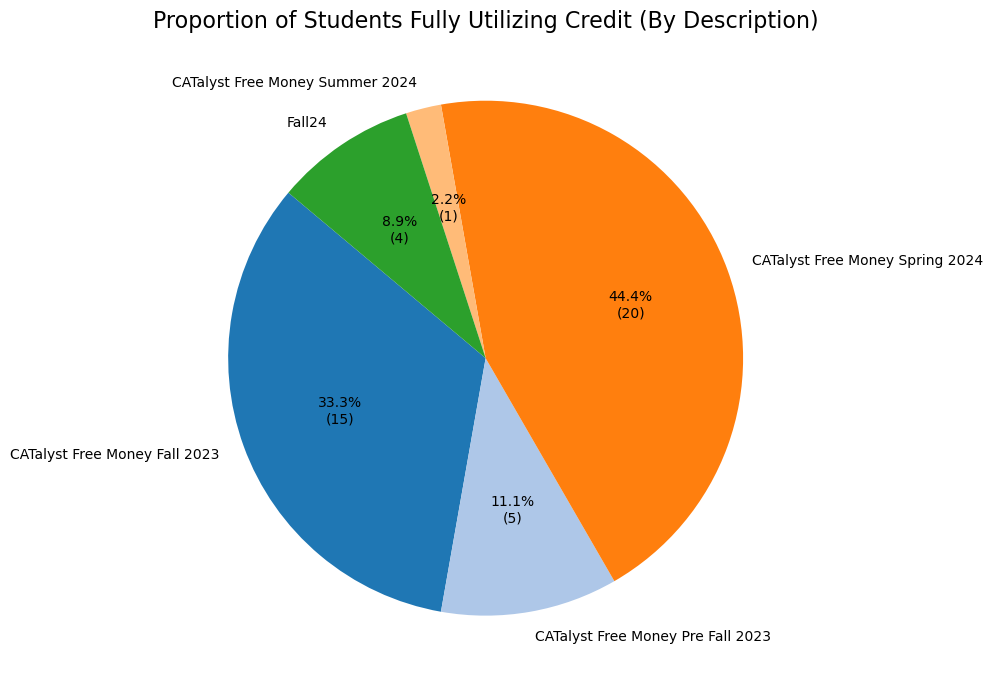

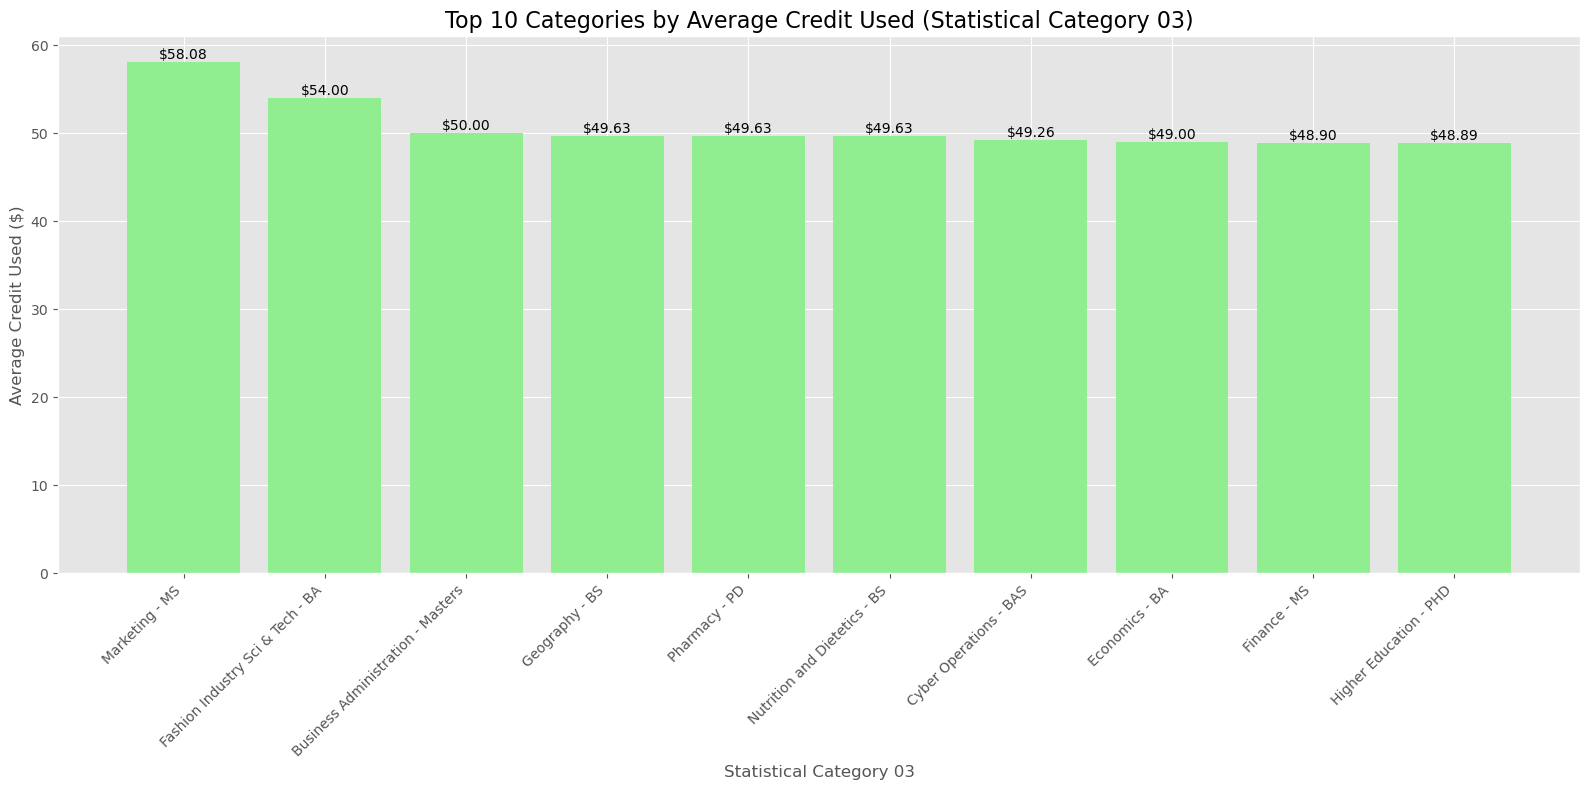

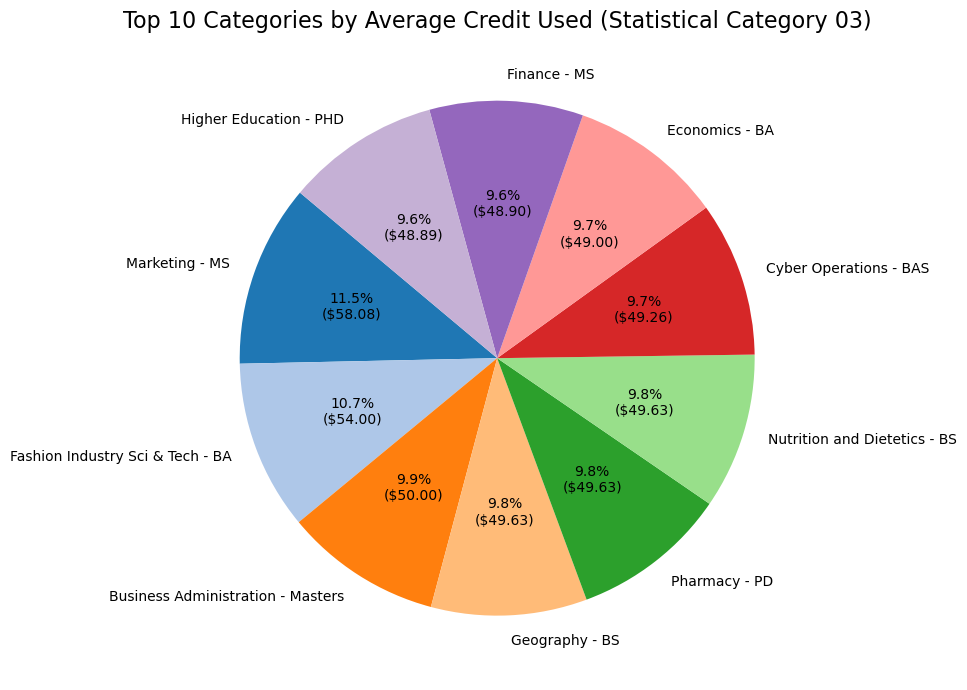

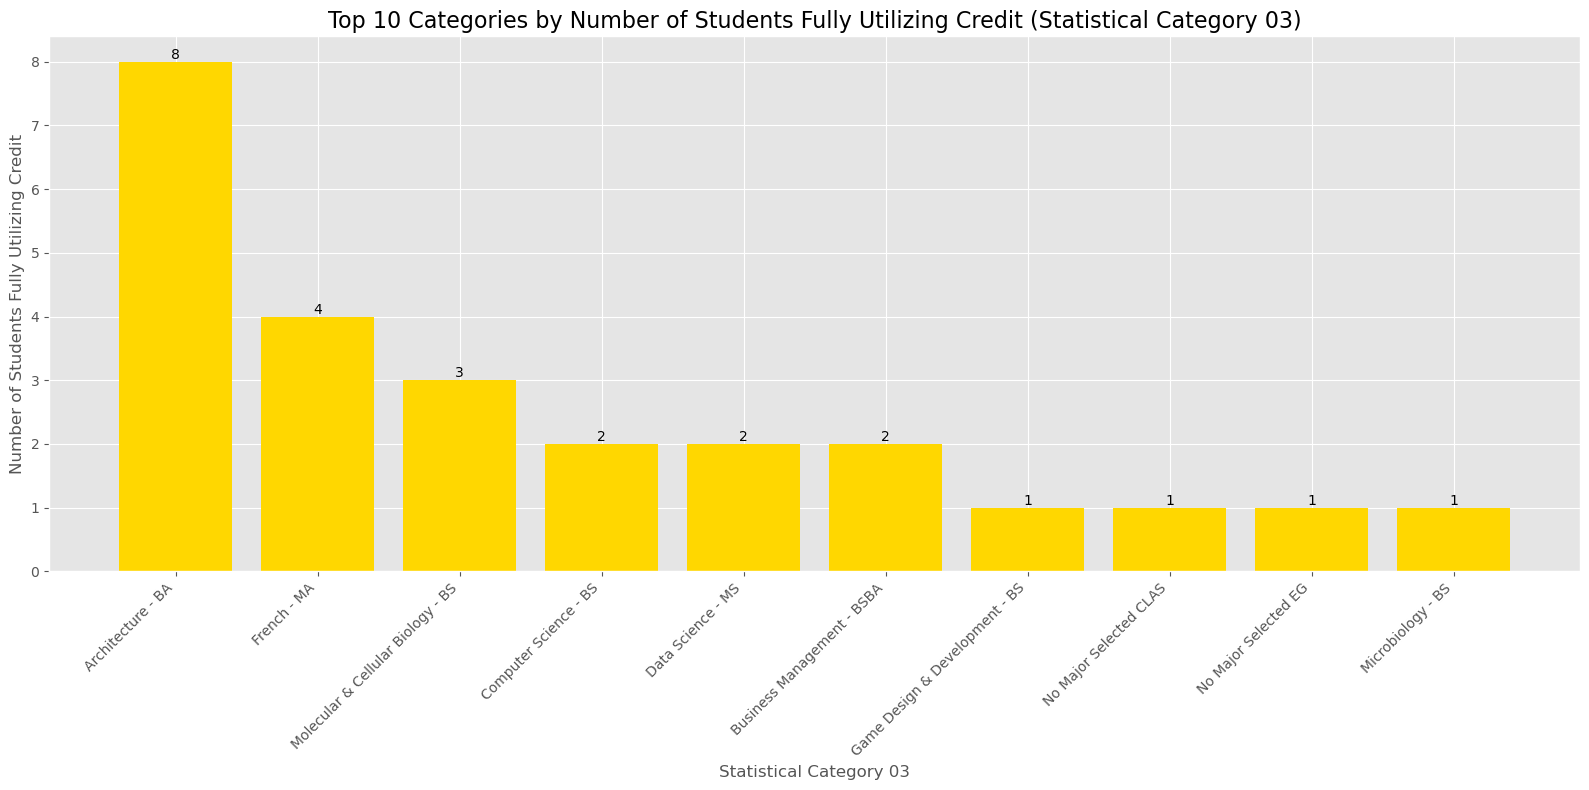

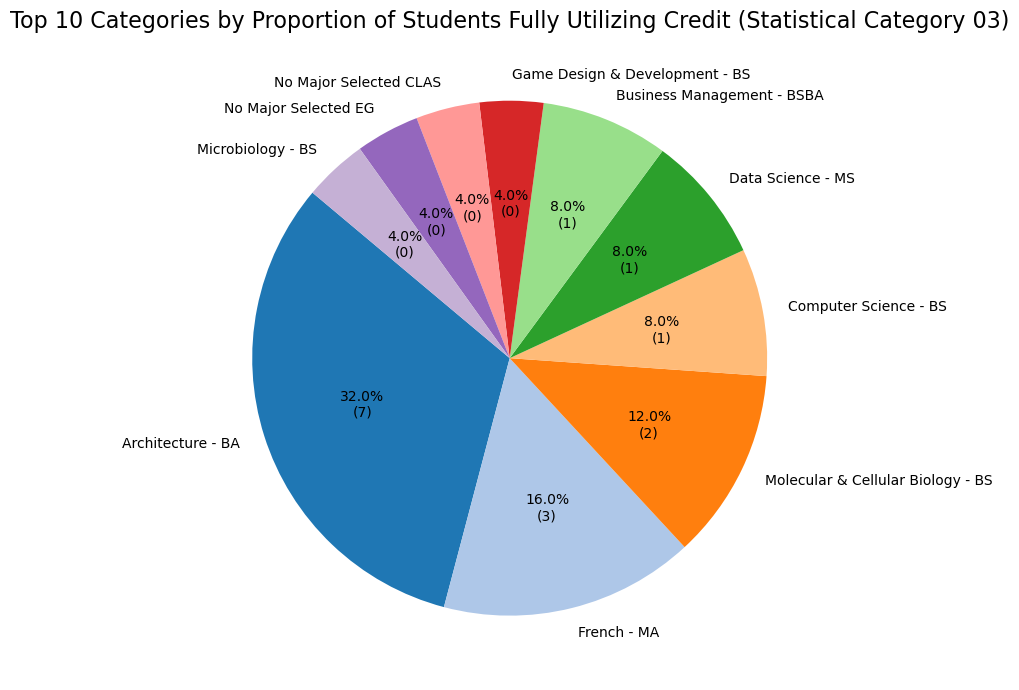

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

df = pd.read_excel('out.xlsx')

# Combine "CATalyst Free Money Grad" and "CATalyst Free Money Under Grad" into one category called "Fall24"
df['Statistical Category Description'] = df['Statistical Category Description'].replace(
    {"CATalyst Free Money Grad": "Fall24", "CATalyst Free Money Under Grad": "Fall24"}
)

# Calculate statistics for Statistical Category Description
category_description_stats = df.groupby('Statistical Category Description')['Extracted Final Balance'].agg(
    Avg_Credit_Used=lambda x: x.fillna(0).mean(),
    Fully_Used_Credit=lambda x: (x == 0).sum()
).reset_index()

# Calculate statistics for Statistical Category 03
category_03_stats = df.groupby('Statistical Category 03')['Extracted Final Balance'].agg(
    Avg_Credit_Used=lambda x: x.fillna(0).mean(),
    Fully_Used_Credit=lambda x: (x == 0).sum()
).reset_index()

# Set up the visualization style
plt.style.use('ggplot')

# Bar Chart: Average Credit Used by Statistical Category Description
plt.figure(figsize=(14, 7))
bars = plt.bar(category_description_stats['Statistical Category Description'],
               category_description_stats['Avg_Credit_Used'],
               color='skyblue')
plt.title('Average Credit Used by Statistical Category Description', fontsize=16)
plt.xlabel('Statistical Category Description', fontsize=12)
plt.ylabel('Average Credit Used ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"${height:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Pie Chart: Average Credit Used by Statistical Category Description
plt.figure(figsize=(10, 7))
sizes = category_description_stats['Avg_Credit_Used']
labels = category_description_stats['Statistical Category Description']
colors = plt.cm.tab20.colors[:len(labels)]
plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n(${p * sum(sizes) / 100:.2f})', startangle=140, colors=colors)
plt.title('Average Credit Used (By Description)', fontsize=16)
plt.tight_layout()
plt.show()

# Bar Chart: Fully Used Credit by Statistical Category Description
plt.figure(figsize=(14, 7))
bars = plt.bar(category_description_stats['Statistical Category Description'],
               category_description_stats['Fully_Used_Credit'],
               color='lightcoral')
plt.title('Number of Students Fully Utilizing Credit by Statistical Category Description', fontsize=16)
plt.xlabel('Statistical Category Description', fontsize=12)
plt.ylabel('Number of Students Fully Utilizing Credit', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Pie Chart: Fully Used Credit by Statistical Category Description
plt.figure(figsize=(10, 7))
sizes = category_description_stats['Fully_Used_Credit']
labels = category_description_stats['Statistical Category Description']
colors = plt.cm.tab20.colors[:len(labels)]
plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(sizes) / 100)})', startangle=140, colors=colors)
plt.title('Proportion of Students Fully Utilizing Credit (By Description)', fontsize=16)
plt.tight_layout()
plt.show()

# Bar Chart: Average Credit Used by Statistical Category 03
plt.figure(figsize=(16, 8))
top_categories_03 = category_03_stats.sort_values(by='Avg_Credit_Used', ascending=False).head(10)
bars = plt.bar(top_categories_03['Statistical Category 03'], 
               top_categories_03['Avg_Credit_Used'], 
               color='lightgreen')
plt.title('Top 10 Categories by Average Credit Used (Statistical Category 03)', fontsize=16)
plt.xlabel('Statistical Category 03', fontsize=12)
plt.ylabel('Average Credit Used ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"${height:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Pie Chart: Average Credit Used by Statistical Category 03
plt.figure(figsize=(10, 7))
sizes = top_categories_03['Avg_Credit_Used']
labels = top_categories_03['Statistical Category 03']
colors = plt.cm.tab20.colors[:len(labels)]
plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n(${p * sum(sizes) / 100:.2f})', startangle=140, colors=colors)
plt.title('Top 10 Categories by Average Credit Used (Statistical Category 03)', fontsize=16)
plt.tight_layout()
plt.show()

# Bar Chart: Fully Used Credit by Statistical Category 03
plt.figure(figsize=(16, 8))
top_fully_used_03 = category_03_stats.sort_values(by='Fully_Used_Credit', ascending=False).head(10)
bars = plt.bar(top_fully_used_03['Statistical Category 03'], 
               top_fully_used_03['Fully_Used_Credit'], 
               color='gold')
plt.title('Top 10 Categories by Number of Students Fully Utilizing Credit (Statistical Category 03)', fontsize=16)
plt.xlabel('Statistical Category 03', fontsize=12)
plt.ylabel('Number of Students Fully Utilizing Credit', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Pie Chart: Fully Used Credit by Statistical Category 03
plt.figure(figsize=(10, 7))
sizes = top_fully_used_03['Fully_Used_Credit']
labels = top_fully_used_03['Statistical Category 03']
colors = plt.cm.tab20.colors[:len(labels)]
plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(sizes) / 100)})', startangle=140, colors=colors)
plt.title('Top 10 Categories by Proportion of Students Fully Utilizing Credit (Statistical Category 03)', fontsize=16)
plt.tight_layout()
plt.show()


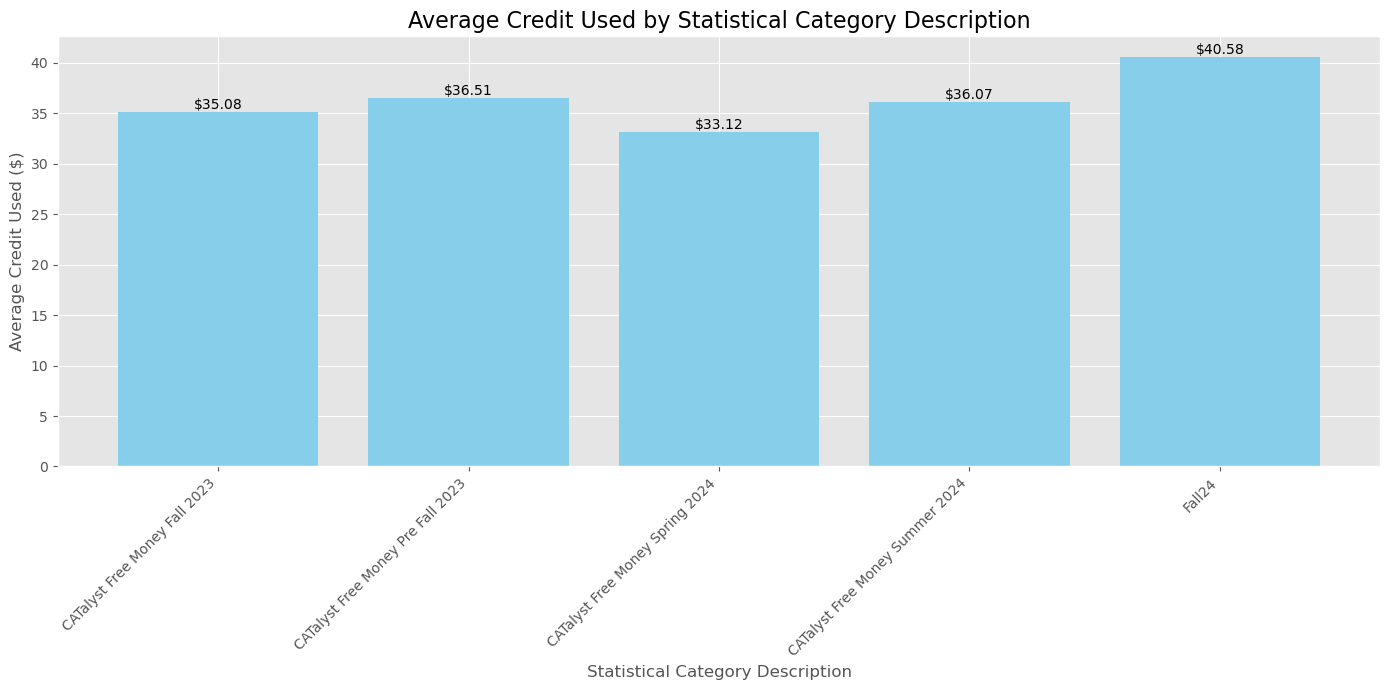

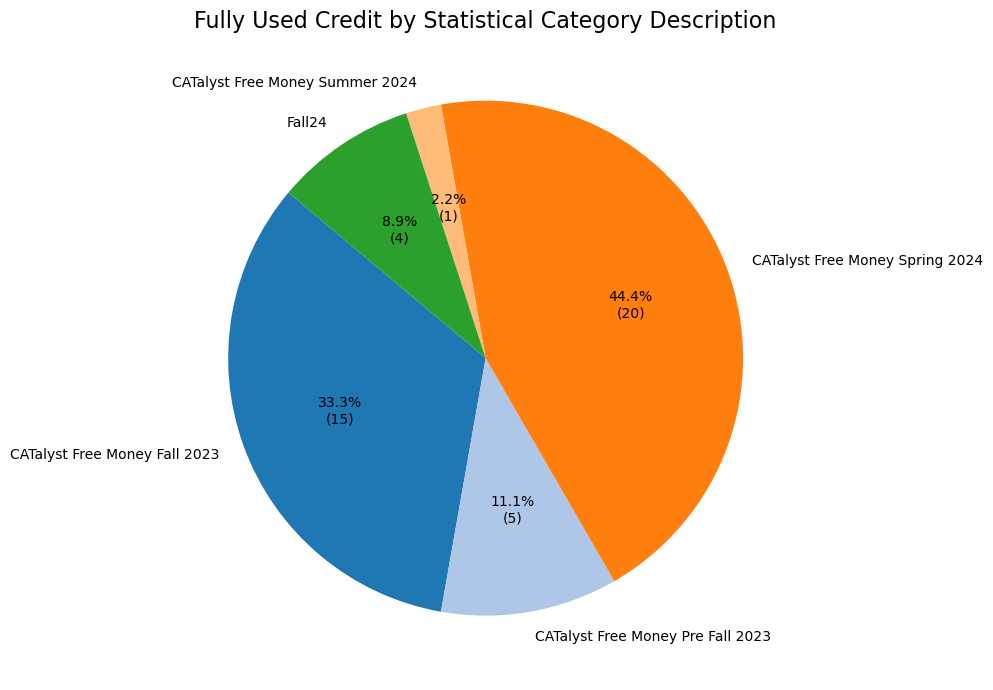

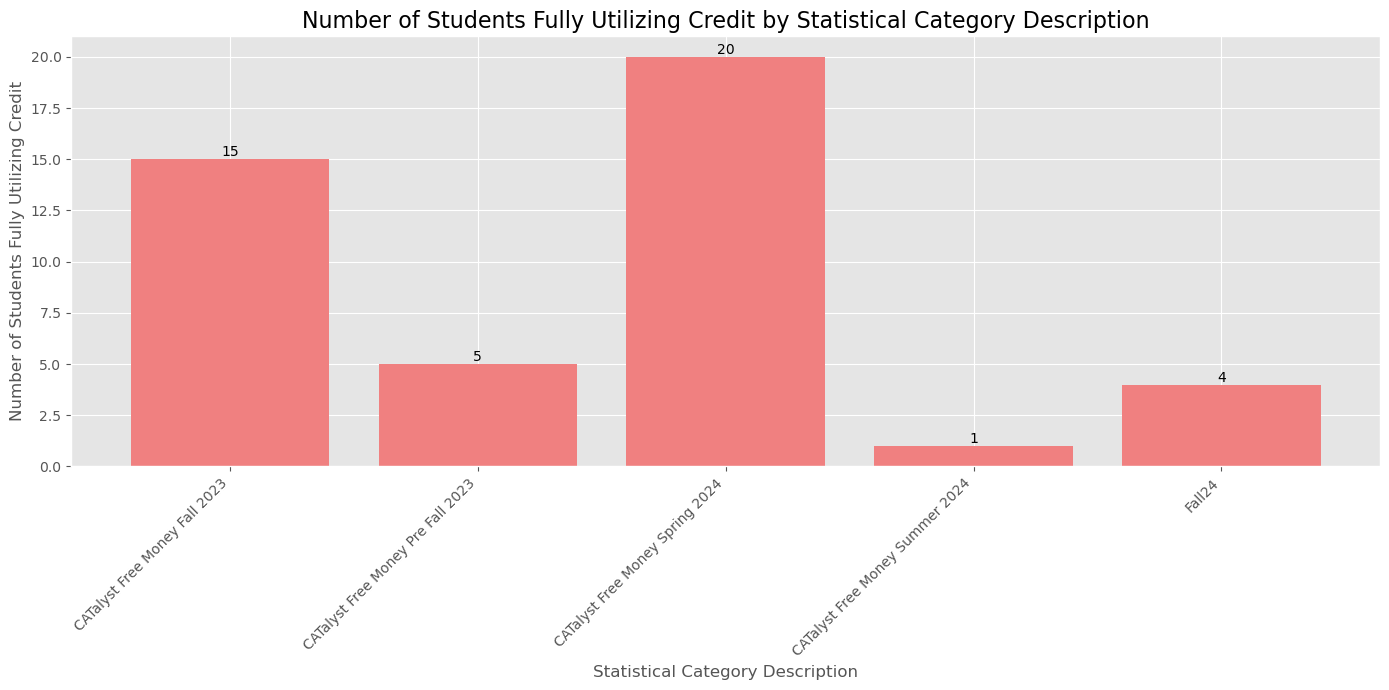

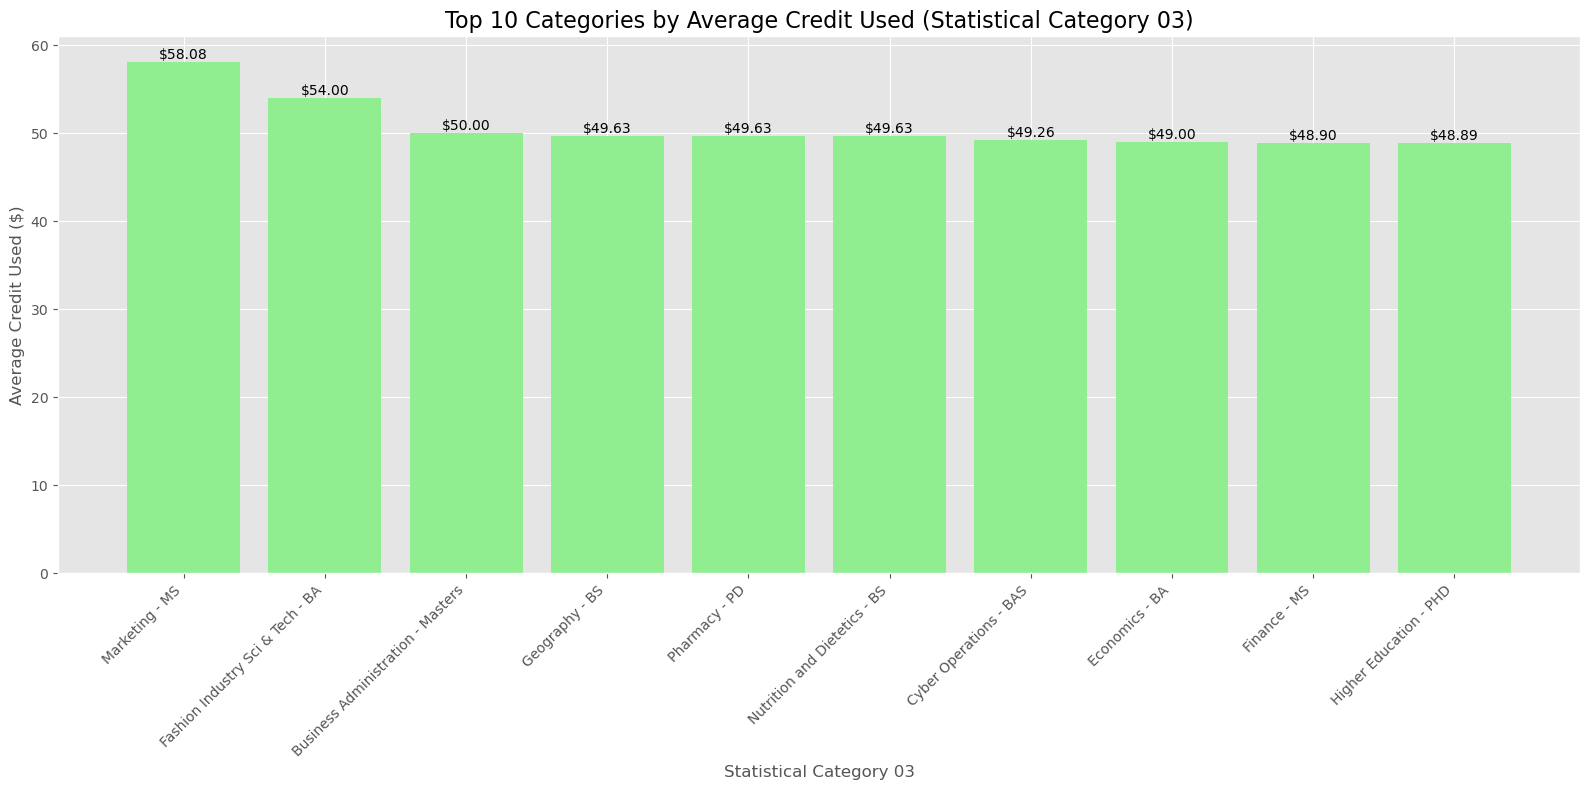

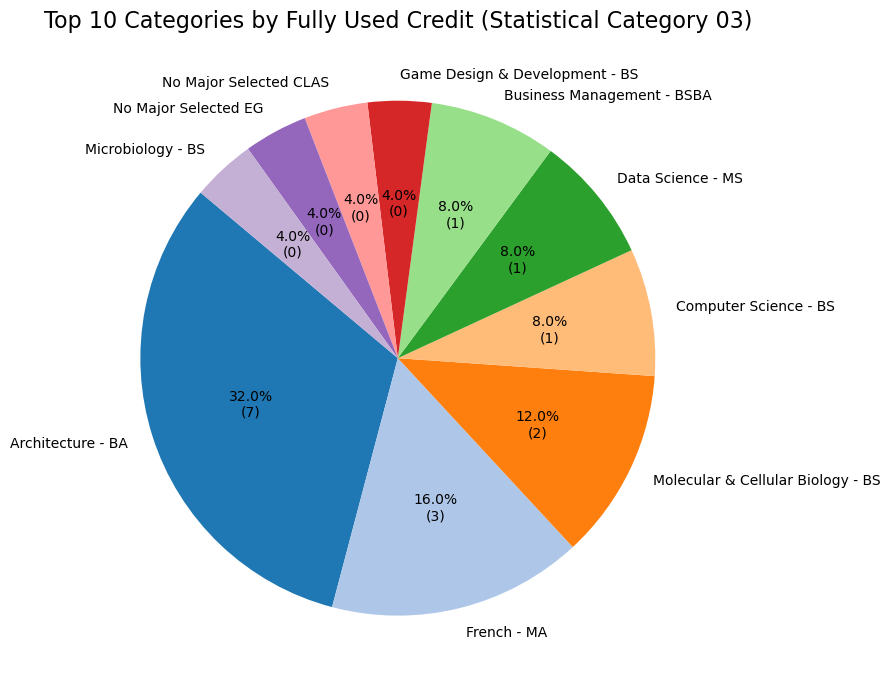

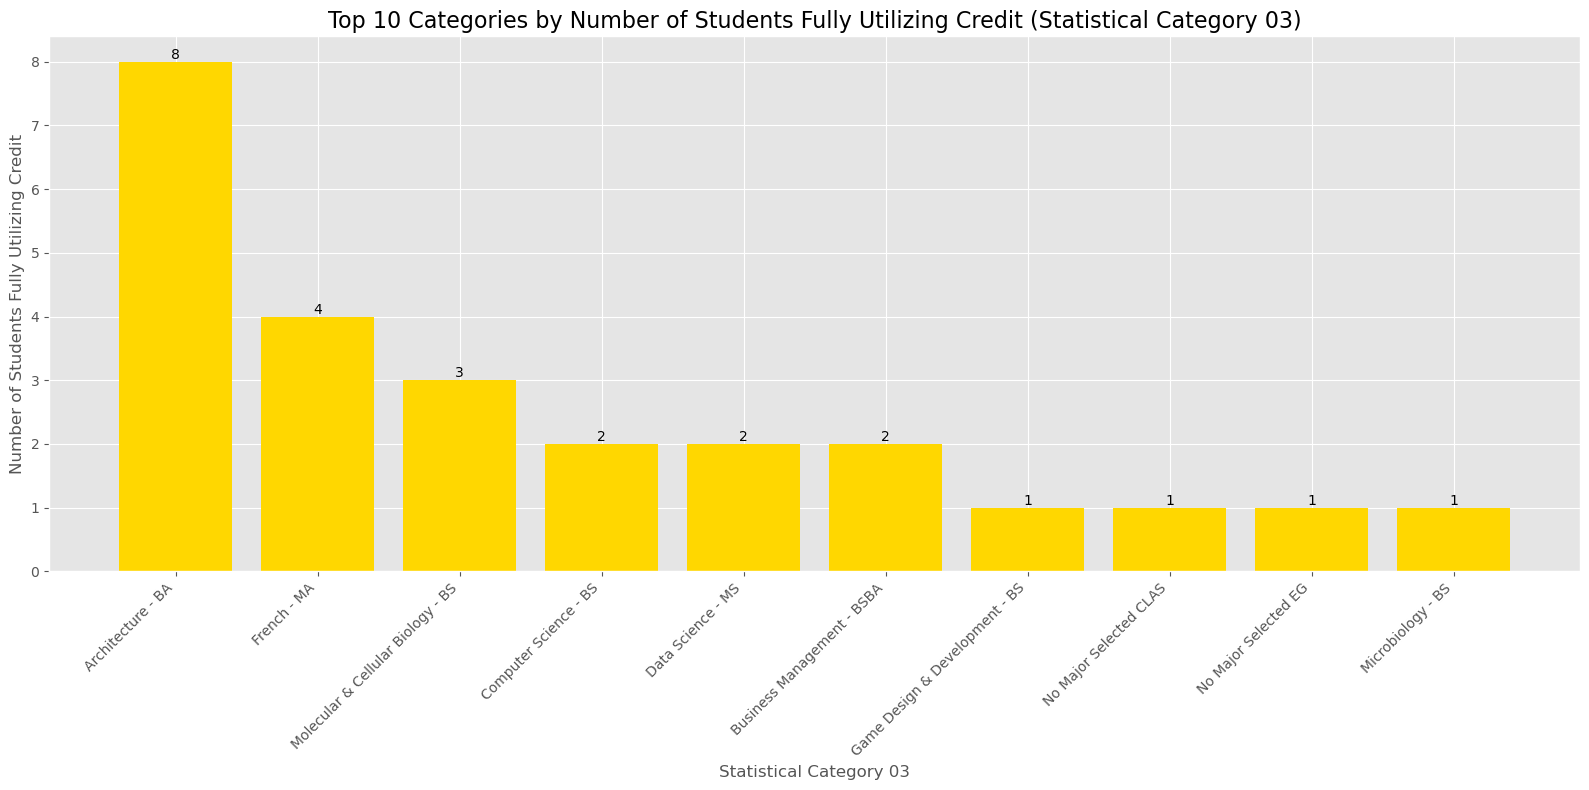

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

df = pd.read_excel('out.xlsx')

# Combine "CATalyst Free Money Grad" and "CATalyst Free Money Under Grad" into one category called "Fall24"
df['Statistical Category Description'] = df['Statistical Category Description'].replace(
    {"CATalyst Free Money Grad": "Fall24", "CATalyst Free Money Under Grad": "Fall24"}
)

# Calculate statistics for Statistical Category Description
category_description_stats = df.groupby('Statistical Category Description')['Extracted Final Balance'].agg(
    Avg_Credit_Used=lambda x: x.fillna(0).mean(),
    Fully_Used_Credit=lambda x: (x == 0).sum()
).reset_index()

# Calculate statistics for Statistical Category 03
category_03_stats = df.groupby('Statistical Category 03')['Extracted Final Balance'].agg(
    Avg_Credit_Used=lambda x: x.fillna(0).mean(),
    Fully_Used_Credit=lambda x: (x == 0).sum()
).reset_index()

# Set up the visualization style
plt.style.use('ggplot')

# 1. Bar Chart: Average Credit Used by Statistical Category Description
plt.figure(figsize=(14, 7))
bars = plt.bar(category_description_stats['Statistical Category Description'],
               category_description_stats['Avg_Credit_Used'],
               color='skyblue')
plt.title('Average Credit Used by Statistical Category Description', fontsize=16)
plt.xlabel('Statistical Category Description', fontsize=12)
plt.ylabel('Average Credit Used ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"${height:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Pie Chart: Fully Used Credit by Statistical Category Description
plt.figure(figsize=(10, 7))
sizes = category_description_stats['Fully_Used_Credit']
labels = category_description_stats['Statistical Category Description']
colors = plt.cm.tab20.colors[:len(labels)]
plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(sizes) / 100)})', startangle=140, colors=colors)
plt.title('Fully Used Credit by Statistical Category Description', fontsize=16)
plt.tight_layout()
plt.show()

# 3. Bar Chart: Fully Used Credit by Statistical Category Description
plt.figure(figsize=(14, 7))
bars = plt.bar(category_description_stats['Statistical Category Description'],
               category_description_stats['Fully_Used_Credit'],
               color='lightcoral')
plt.title('Number of Students Fully Utilizing Credit by Statistical Category Description', fontsize=16)
plt.xlabel('Statistical Category Description', fontsize=12)
plt.ylabel('Number of Students Fully Utilizing Credit', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 4. Bar Chart: Average Credit Used by Statistical Category 03
plt.figure(figsize=(16, 8))
top_categories_03 = category_03_stats.sort_values(by='Avg_Credit_Used', ascending=False).head(10)
bars = plt.bar(top_categories_03['Statistical Category 03'], 
               top_categories_03['Avg_Credit_Used'], 
               color='lightgreen')
plt.title('Top 10 Categories by Average Credit Used (Statistical Category 03)', fontsize=16)
plt.xlabel('Statistical Category 03', fontsize=12)
plt.ylabel('Average Credit Used ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"${height:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 5. Pie Chart: Fully Used Credit by Statistical Category 03
top_fully_used_03 = category_03_stats.sort_values(by='Fully_Used_Credit', ascending=False).head(10)
plt.figure(figsize=(10, 7))
sizes = top_fully_used_03['Fully_Used_Credit']
labels = top_fully_used_03['Statistical Category 03']
colors = plt.cm.tab20.colors[:len(labels)]
plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(sizes) / 100)})', startangle=140, colors=colors)
plt.title('Top 10 Categories by Fully Used Credit (Statistical Category 03)', fontsize=16)
plt.tight_layout()
plt.show()

# 6. Bar Chart: Fully Used Credit by Statistical Category 03
plt.figure(figsize=(16, 8))
bars = plt.bar(top_fully_used_03['Statistical Category 03'], 
               top_fully_used_03['Fully_Used_Credit'], 
               color='gold')
plt.title('Top 10 Categories by Number of Students Fully Utilizing Credit (Statistical Category 03)', fontsize=16)
plt.xlabel('Statistical Category 03', fontsize=12)
plt.ylabel('Number of Students Fully Utilizing Credit', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


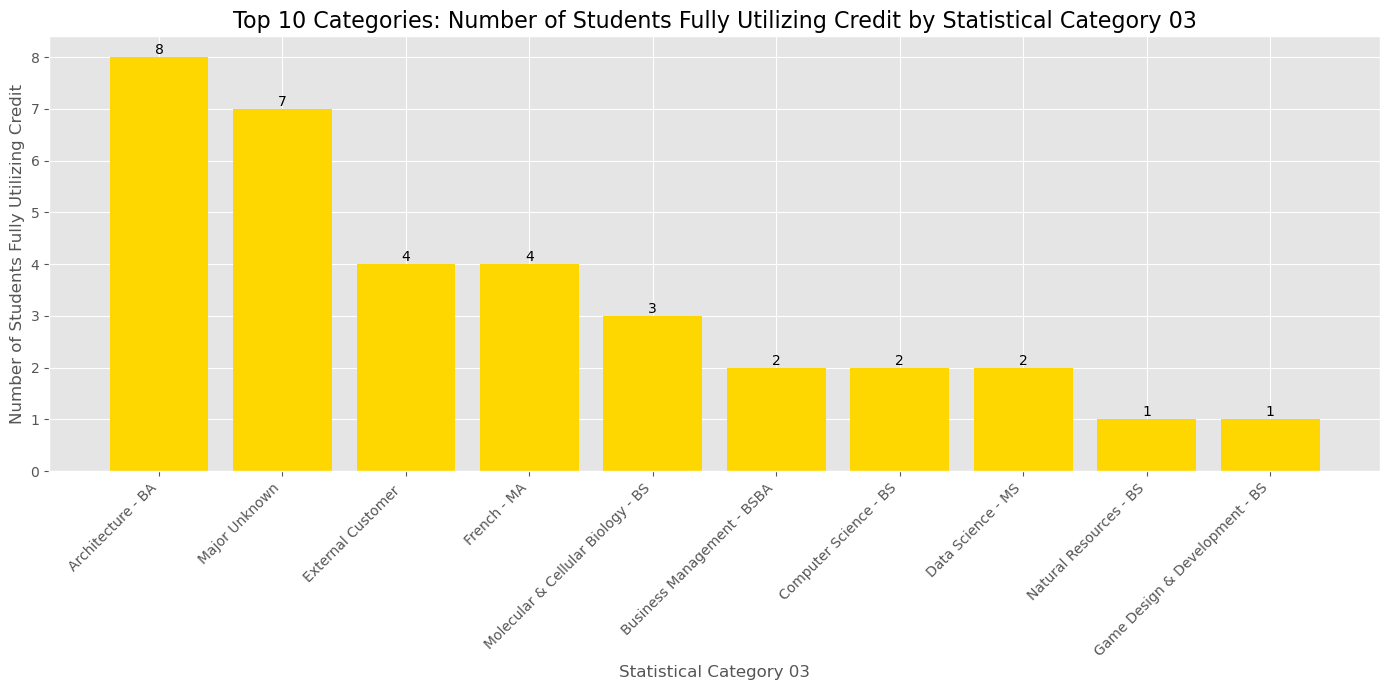

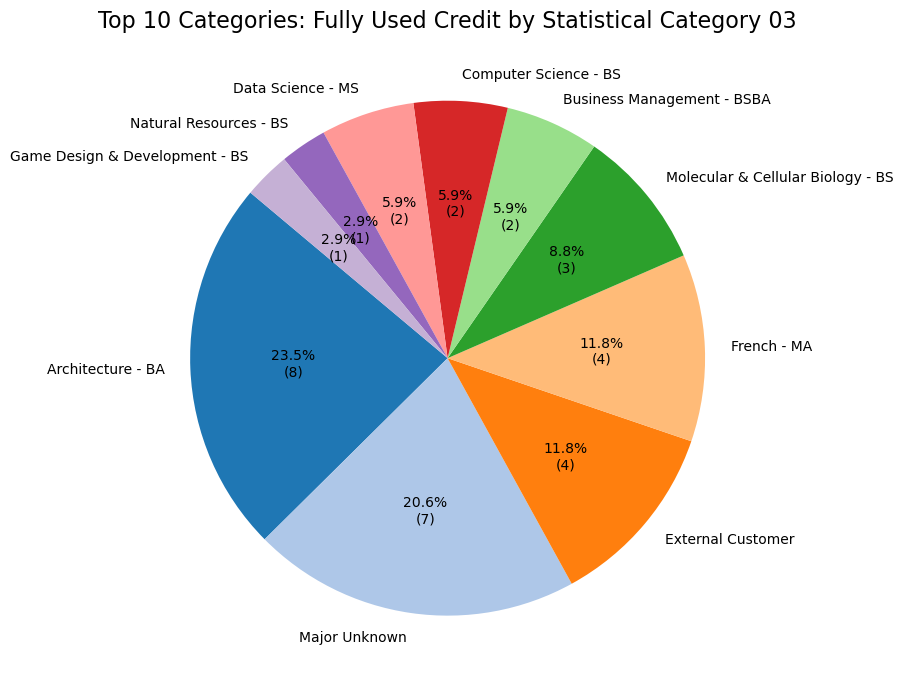

               Statistical Category 03  Avg_Credit_Used  Fully_Used_Credit
10                   Architecture - BA        30.008436                  8
81                       Major Unknown         0.000000                  7
60                  External Customer          0.000000                  4
64                         French - MA         6.231429                  4
99   Molecular & Cellular Biology - BS        29.061667                  3
31          Business Management - BSBA        33.340833                  2
41               Computer Science - BS        30.946800                  2
44                   Data Science - MS        24.122857                  2
102             Natural Resources - BS        28.052500                  1
65      Game Design & Development - BS        30.915000                  1


In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'out1.csv'  # Replace with the actual file path if necessary
df = pd.read_csv(file_path)

# Combine "CATalyst Free Money Grad" and "CATalyst Free Money Under Grad" into "Fall24"
df['Statistical Category Description'] = df['Statistical Category Description'].replace(
    {"CATalyst Free Money Grad": "Fall24", "CATalyst Free Money Under Grad": "Fall24"}
)

# Ensure no missing values in categories by replacing NaN with "Uncategorized"
df['Statistical Category Description'] = df['Statistical Category Description'].fillna('Uncategorized')
df['Statistical Category 03'] = df['Statistical Category 03'].fillna('Uncategorized')

# Calculate average credit used and fully utilized credit for Statistical Category Description
category_description_stats = df.groupby('Statistical Category Description')['Extracted Final Balance'].agg(
    Avg_Credit_Used=lambda x: x.fillna(0).mean(),
    Fully_Used_Credit=lambda x: (x == 0).sum()
).reset_index()

# Calculate average credit used and fully utilized credit for Statistical Category 03
category_03_stats = df.groupby('Statistical Category 03')['Extracted Final Balance'].agg(
    Avg_Credit_Used=lambda x: x.fillna(0).mean(),
    Fully_Used_Credit=lambda x: (x == 0).sum()
).reset_index()

# Filter top 10 categories by Fully Used Credit for Statistical Category 03
top_10_fully_used_03 = category_03_stats.sort_values(by='Fully_Used_Credit', ascending=False).head(10)

# Visualization Style
plt.style.use('ggplot')

# 1. Bar Chart: Fully Used Credit by Statistical Category 03 (Top 10)
plt.figure(figsize=(14, 7))
bars = plt.bar(top_10_fully_used_03['Statistical Category 03'],
               top_10_fully_used_03['Fully_Used_Credit'],
               color='gold')
plt.title('Top 10 Categories: Number of Students Fully Utilizing Credit by Statistical Category 03', fontsize=16)
plt.xlabel('Statistical Category 03', fontsize=12)
plt.ylabel('Number of Students Fully Utilizing Credit', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Pie Chart: Fully Used Credit by Statistical Category 03 (Top 10)
plt.figure(figsize=(10, 7))
sizes = top_10_fully_used_03['Fully_Used_Credit']
labels = top_10_fully_used_03['Statistical Category 03']
colors = plt.cm.tab20.colors[:len(labels)]
plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(sizes) / 100)})', startangle=140, colors=colors)
plt.title('Top 10 Categories: Fully Used Credit by Statistical Category 03', fontsize=16)
plt.tight_layout()
plt.show()

# Display calculated results for verification
print(top_10_fully_used_03)


In [57]:
df['Statistical Category 03'].unique()

'Applied Humanities - BAEcology & Evolutionary Biology - BSUncategorizedBiosystems Analytics and Technology - BSRetailing and Consumer Science - BSMolecular & Cellular Biology - BSBiomedical Engineering - BSBMEArchitectural Engineering - BSSociology - BAElectrical & Computer Engineering - BSECEStatistics and Data Science - PhDAstronomy - BSVeterinary Science - BSPhysiology & Medical SciencesArchitecture - BAAnthropology - BAComputer Science - BSNo Major Selected EGMechanical Engineering - BSMEEArt - MFAComputer Science & Engineering - BSMicrobiology - BSInterdisciplinary Studies - BISOptical Sciences - PHDOptical Sciences & Engineering - BSOSEIndustrial Engineering - BSINEBiology - BSPsychology - BABusiness Management - BSBAMining Engineering - BSMNEAerospace Engineering - BSEcology & Evolutionary Biology - PHDMathematics - BSBiosystems Engineering - MSStudio Art - BFAMaterials Science & Engineering - BSMSEMajor UnknownNursing - BSNGeographic Information Sys Tech - MSMechanical Enginee

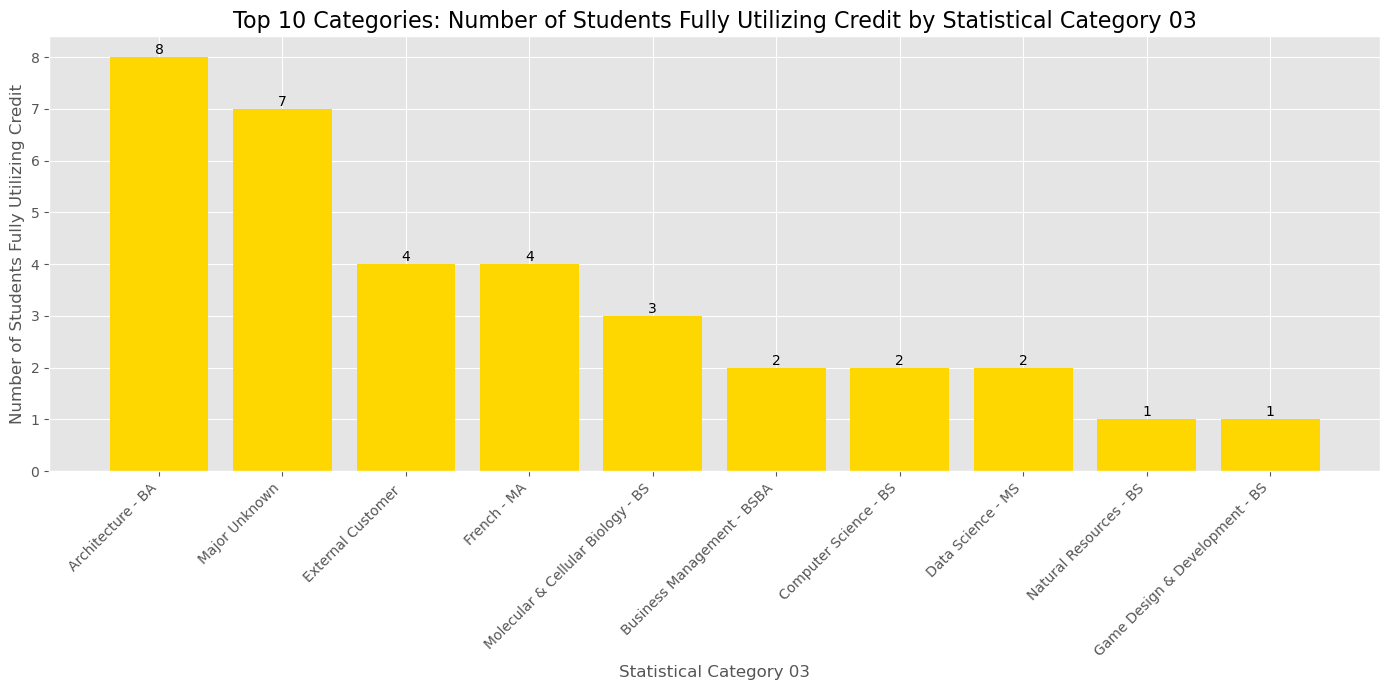

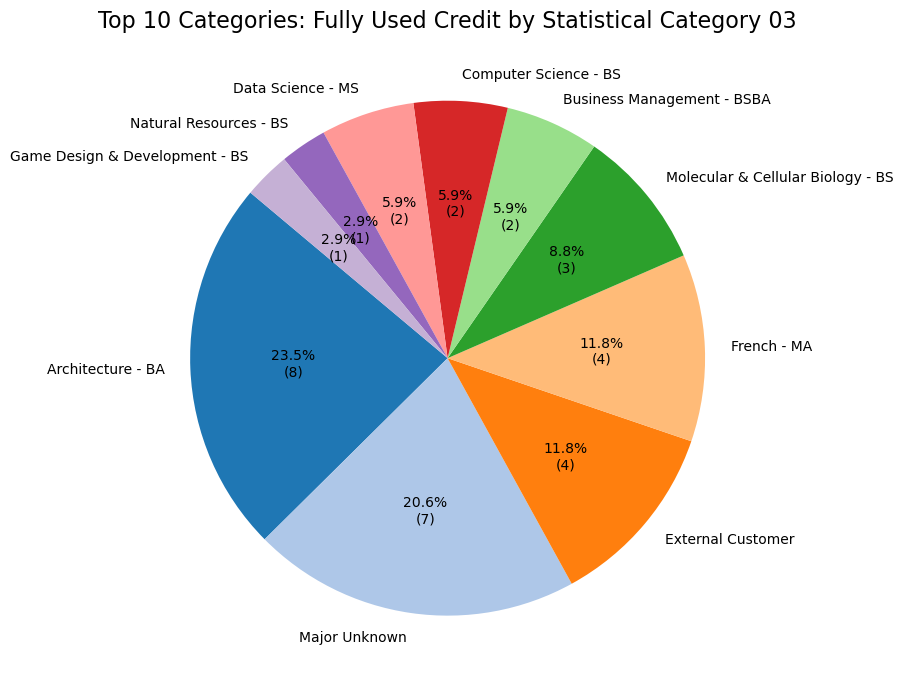

               Statistical Category 03  Avg_Credit_Used  Fully_Used_Credit
10                   Architecture - BA        30.008436                  8
81                       Major Unknown         0.000000                  7
60                  External Customer          0.000000                  4
64                         French - MA         6.231429                  4
99   Molecular & Cellular Biology - BS        29.061667                  3
31          Business Management - BSBA        33.340833                  2
41               Computer Science - BS        30.946800                  2
44                   Data Science - MS        24.122857                  2
102             Natural Resources - BS        28.052500                  1
65      Game Design & Development - BS        30.915000                  1


In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'out1.csv'  # Replace with the actual file path if necessary
df = pd.read_csv(file_path)

# Combine specific categories into new names
df['Statistical Category Description'] = df['Statistical Category Description'].replace(
    {
        "CATalyst Free Money Grad": "Fall24",
        "CATalyst Free Money Under Grad": "Fall24",
        "CATalyst Free Money Pre Fall 2023": "PreFall23",
        "CATalyst Free Money Summer 2023": "Summer23",
        "CATalyst Free Money Spring 2024": "Spring24",
        "CATalyst Free Money Fall 2023": "Fall23",
    }
)

# Ensure no missing values in categories by replacing NaN with "Uncategorized"
df['Statistical Category Description'] = df['Statistical Category Description'].fillna('Uncategorized')
df['Statistical Category 03'] = df['Statistical Category 03'].fillna('Uncategorized')

# Calculate average credit used and fully utilized credit for Statistical Category Description
category_description_stats = df.groupby('Statistical Category Description')['Extracted Final Balance'].agg(
    Avg_Credit_Used=lambda x: x.fillna(0).mean(),
    Fully_Used_Credit=lambda x: (x == 0).sum()
).reset_index()

# Calculate average credit used and fully utilized credit for Statistical Category 03
category_03_stats = df.groupby('Statistical Category 03')['Extracted Final Balance'].agg(
    Avg_Credit_Used=lambda x: x.fillna(0).mean(),
    Fully_Used_Credit=lambda x: (x == 0).sum()
).reset_index()

# Filter top 10 categories by Fully Used Credit for Statistical Category 03
top_10_fully_used_03 = category_03_stats.sort_values(by='Fully_Used_Credit', ascending=False).head(10)

# Visualization Style
plt.style.use('ggplot')

# 1. Bar Chart: Fully Used Credit by Statistical Category 03 (Top 10)
plt.figure(figsize=(14, 7))
bars = plt.bar(top_10_fully_used_03['Statistical Category 03'],
               top_10_fully_used_03['Fully_Used_Credit'],
               color='gold')
plt.title('Top 10 Categories: Number of Students Fully Utilizing Credit by Statistical Category 03', fontsize=16)
plt.xlabel('Statistical Category 03', fontsize=12)
plt.ylabel('Number of Students Fully Utilizing Credit', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Pie Chart: Fully Used Credit by Statistical Category 03 (Top 10)
plt.figure(figsize=(10, 7))
sizes = top_10_fully_used_03['Fully_Used_Credit']
labels = top_10_fully_used_03['Statistical Category 03']
colors = plt.cm.tab20.colors[:len(labels)]
plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(sizes) / 100)})', startangle=140, colors=colors)
plt.title('Top 10 Categories: Fully Used Credit by Statistical Category 03', fontsize=16)
plt.tight_layout()
plt.show()

# Display calculated results for verification
print(top_10_fully_used_03)


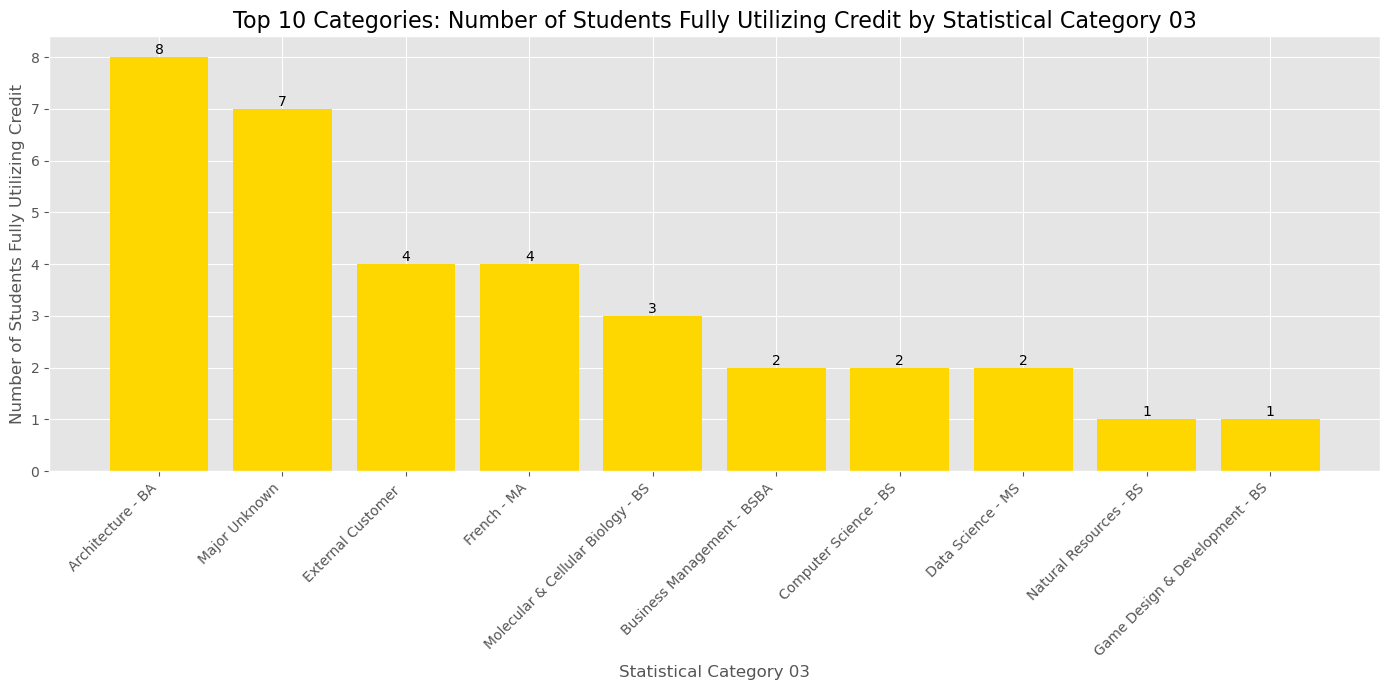

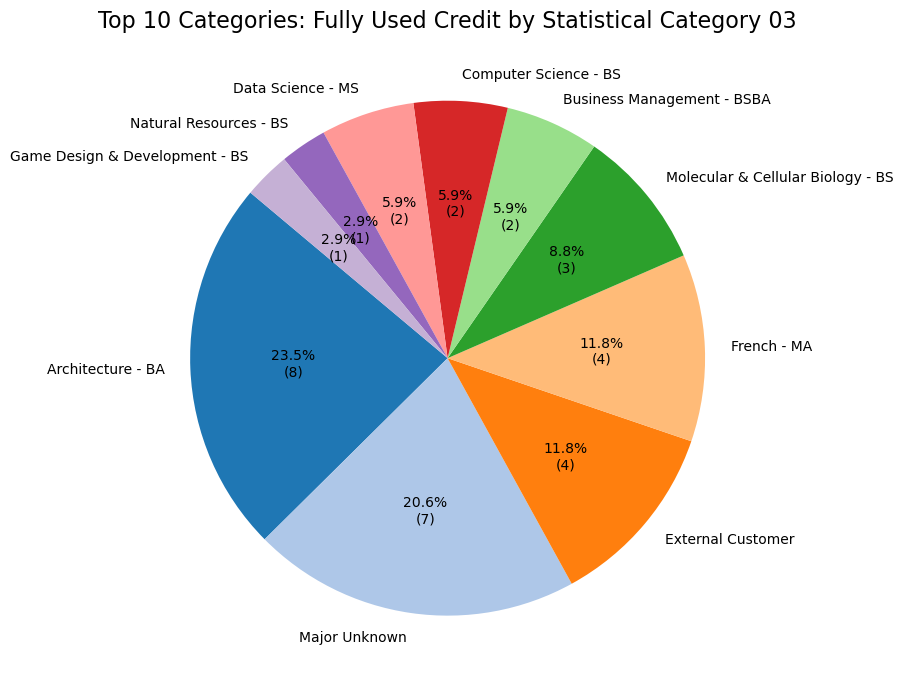

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'out1.csv'  # Replace with the actual file path if necessary
df = pd.read_csv(file_path)

# Combine "CATalyst Free Money Grad" and "CATalyst Free Money Under Grad" into "Fall24"
df['Statistical Category Description'] = df['Statistical Category Description'].replace(
    {"CATalyst Free Money Grad": "Fall24", "CATalyst Free Money Under Grad": "Fall24"}
)

# Ensure no missing values in categories by replacing NaN with "Uncategorized"
df['Statistical Category Description'] = df['Statistical Category Description'].fillna('Uncategorized')
df['Statistical Category 03'] = df['Statistical Category 03'].fillna('Uncategorized')

# Calculate average credit used and fully utilized credit for Statistical Category Description
category_description_stats = df.groupby('Statistical Category Description')['Extracted Final Balance'].agg(
    Avg_Credit_Used=lambda x: x.fillna(0).mean(),
    Fully_Used_Credit=lambda x: (x == 0).sum()
).reset_index()

# Calculate average credit used and fully utilized credit for Statistical Category 03
category_03_stats = df.groupby('Statistical Category 03')['Extracted Final Balance'].agg(
    Avg_Credit_Used=lambda x: x.fillna(0).mean(),
    Fully_Used_Credit=lambda x: (x == 0).sum()
).reset_index()

# Filter top 10 categories by Fully Used Credit for Statistical Category 03
top_10_fully_used_03 = category_03_stats.sort_values(by='Fully_Used_Credit', ascending=False).head(10)

# Visualization Style
plt.style.use('ggplot')

# 1. Bar Chart: Fully Used Credit by Statistical Category 03 (Top 10)
plt.figure(figsize=(14, 7))
bars = plt.bar(top_10_fully_used_03['Statistical Category 03'],
               top_10_fully_used_03['Fully_Used_Credit'],
               color='gold')
plt.title('Top 10 Categories: Number of Students Fully Utilizing Credit by Statistical Category 03', fontsize=16)
plt.xlabel('Statistical Category 03', fontsize=12)
plt.ylabel('Number of Students Fully Utilizing Credit', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Pie Chart: Fully Used Credit by Statistical Category 03 (Top 10)
plt.figure(figsize=(10, 7))
sizes = top_10_fully_used_03['Fully_Used_Credit']
labels = top_10_fully_used_03['Statistical Category 03']
colors = plt.cm.tab20.colors[:len(labels)]
plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(sizes) / 100)})', startangle=140, colors=colors)
plt.title('Top 10 Categories: Fully Used Credit by Statistical Category 03', fontsize=16)
plt.tight_layout()
plt.show()

# Display calculated results for verification
#print(top_10_fully_used_03)


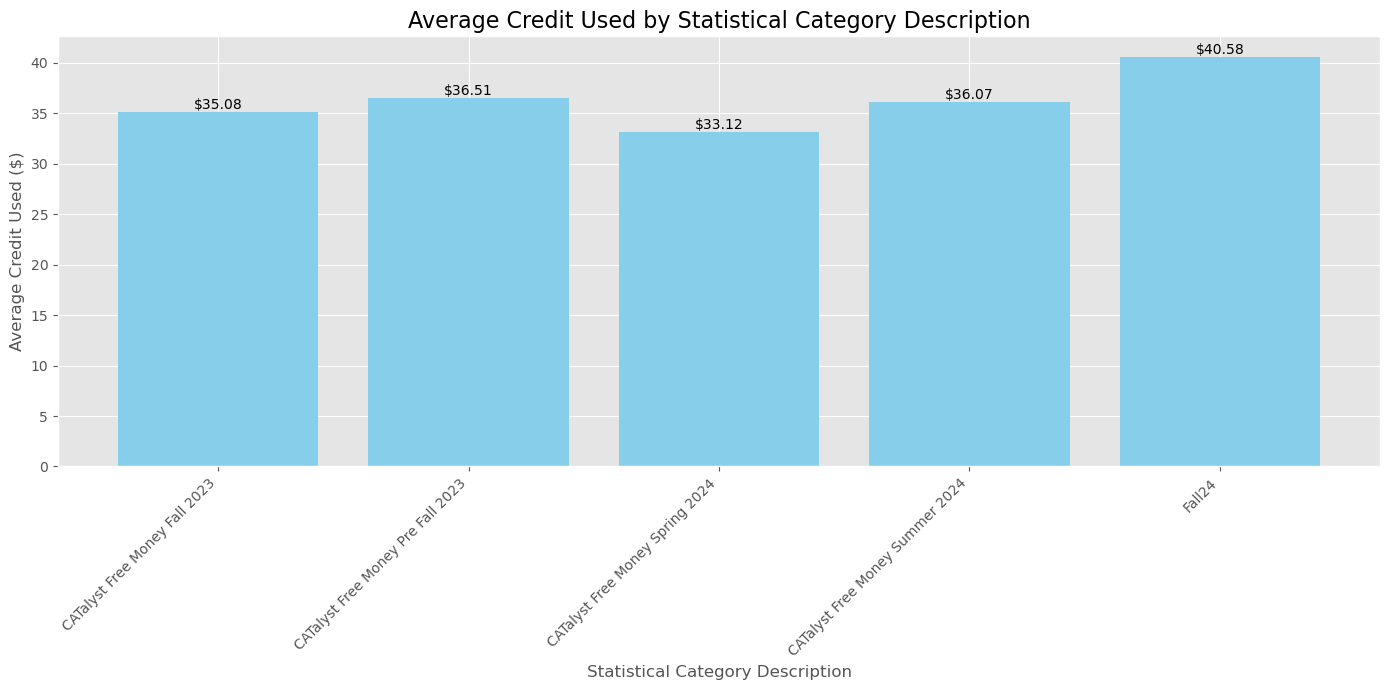

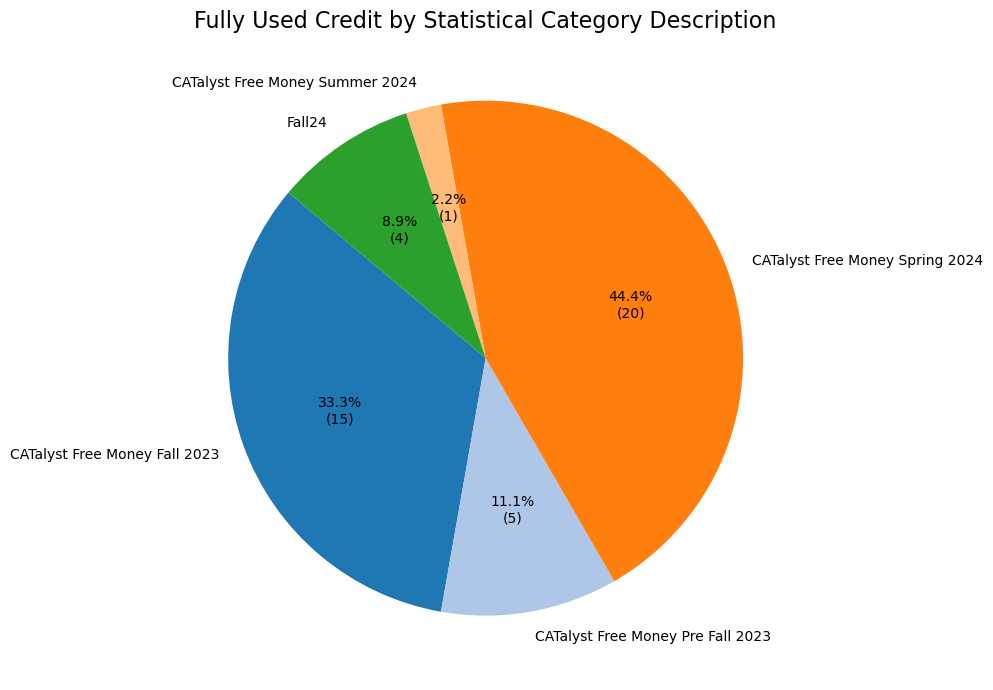

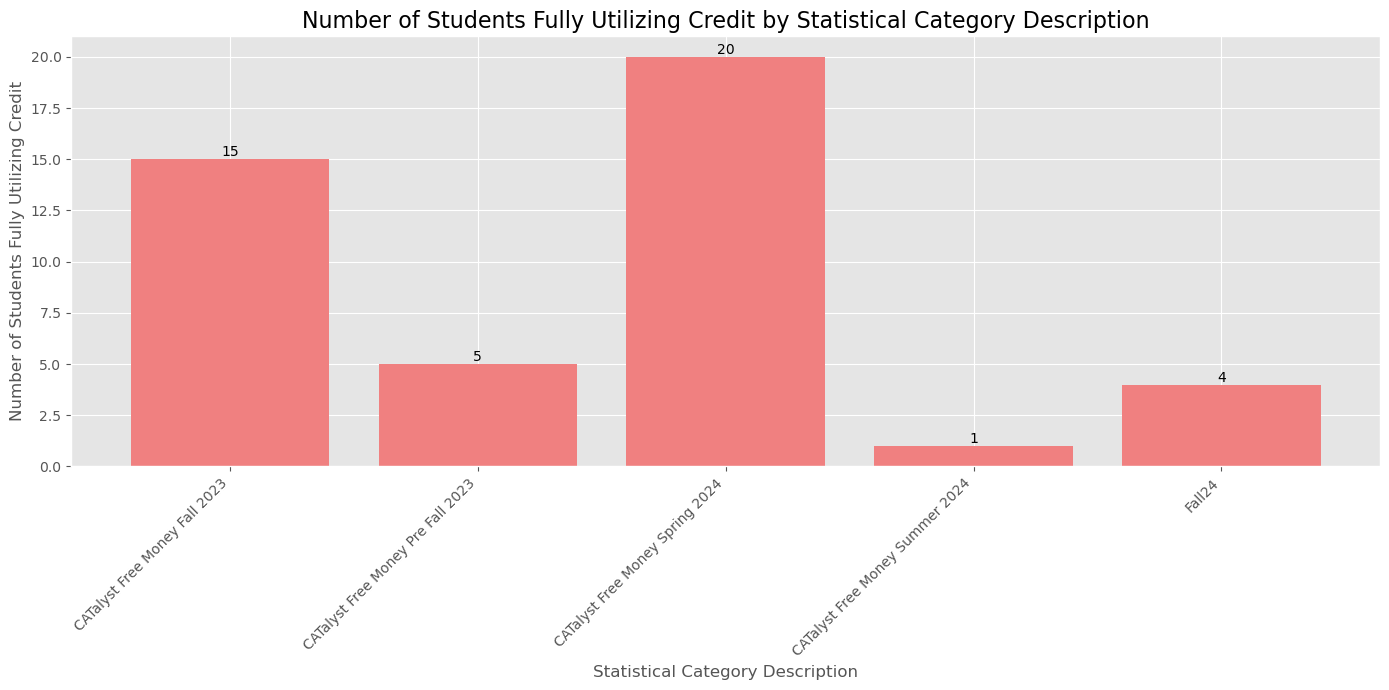

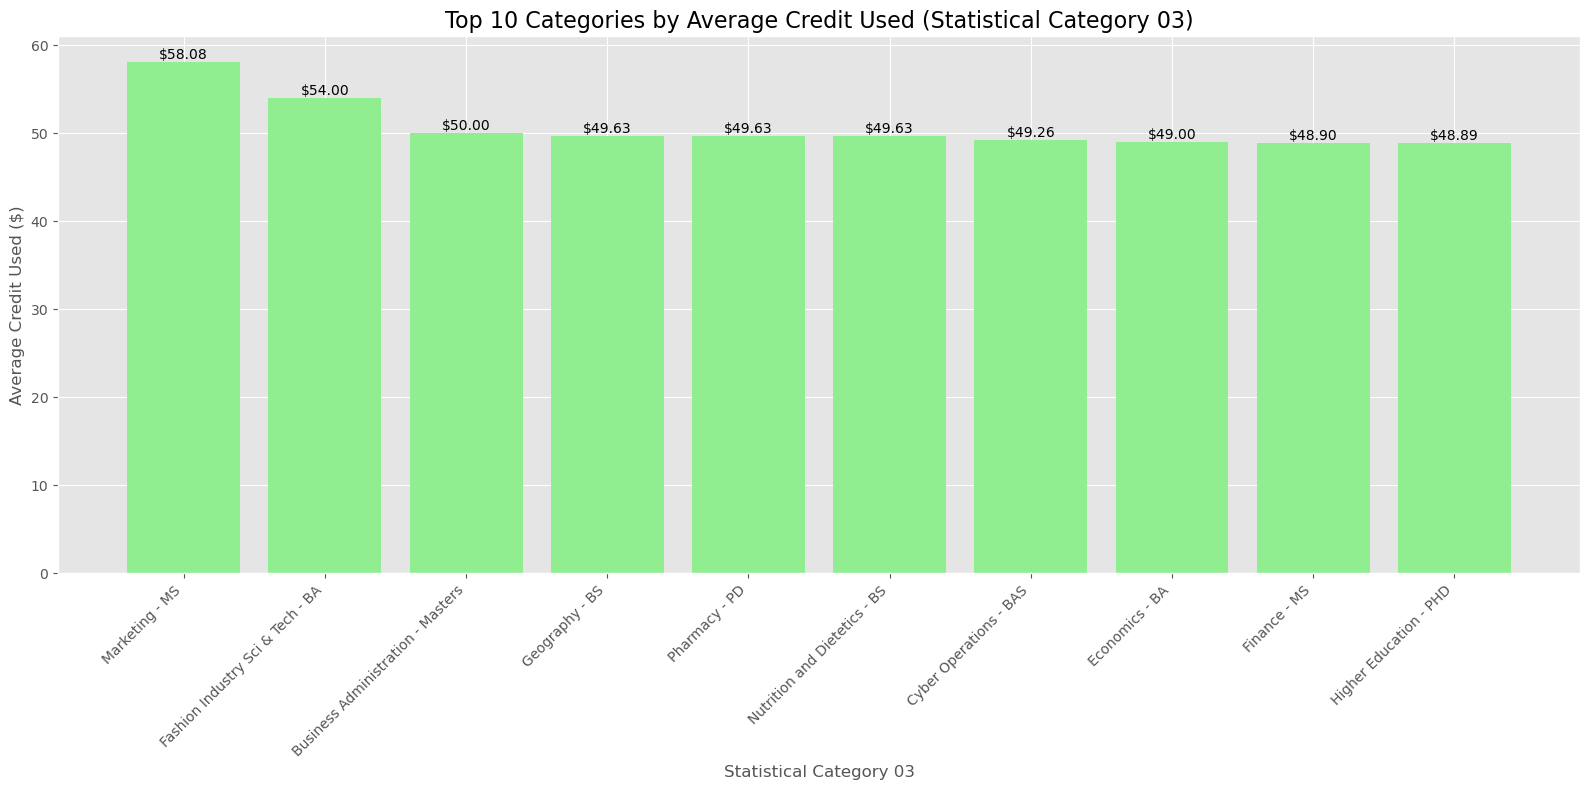

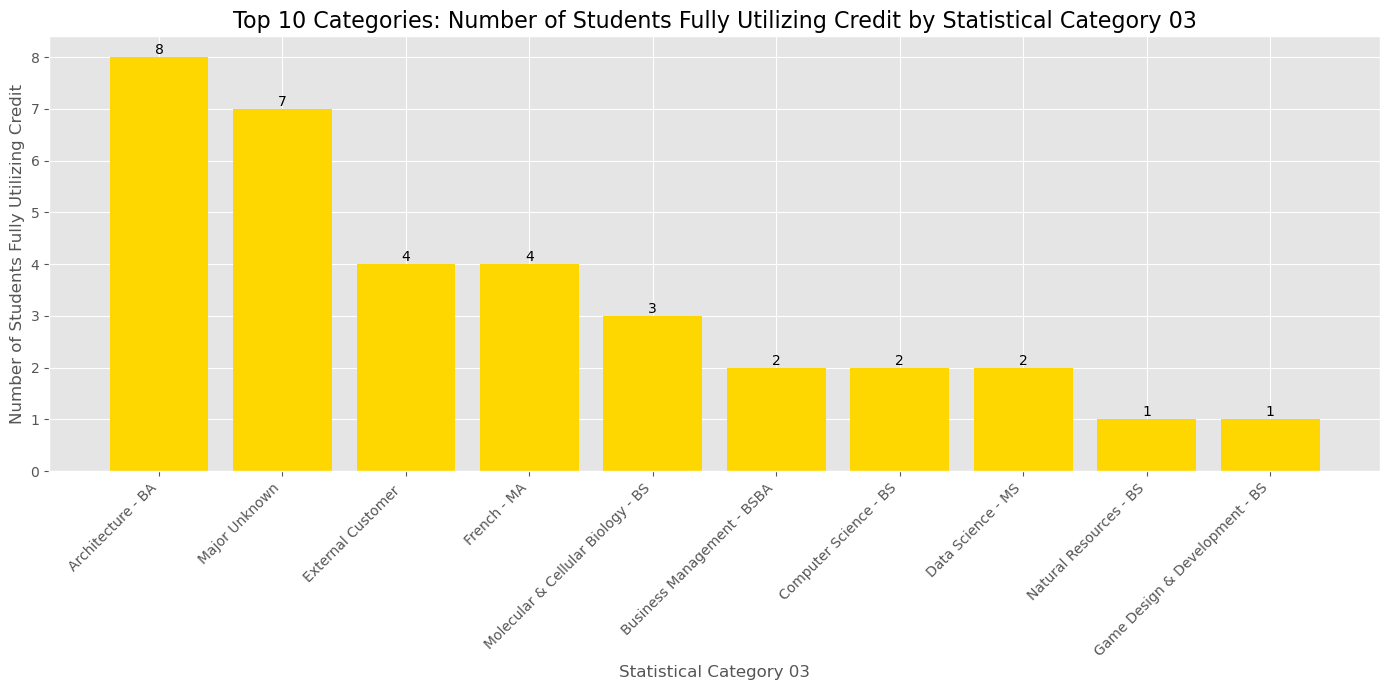

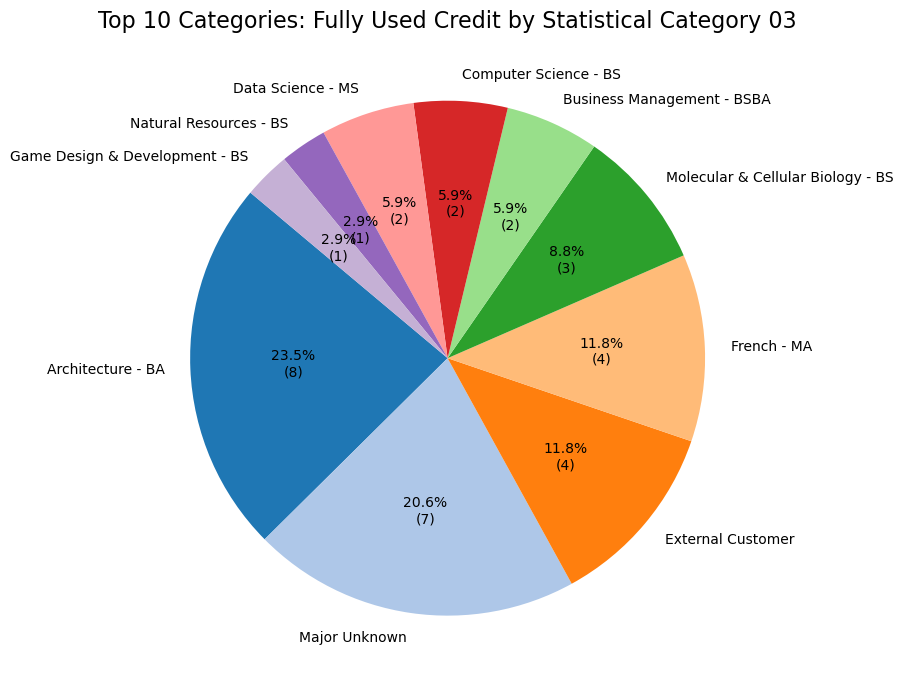

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

df = pd.read_csv('out1.csv')

# Combine "CATalyst Free Money Grad" and "CATalyst Free Money Under Grad" into one category called "Fall24"
df['Statistical Category Description'] = df['Statistical Category Description'].replace(
    {"CATalyst Free Money Grad": "Fall24", "CATalyst Free Money Under Grad": "Fall24"}
)

# Calculate statistics for Statistical Category Description
category_description_stats = df.groupby('Statistical Category Description')['Extracted Final Balance'].agg(
    Avg_Credit_Used=lambda x: x.fillna(0).mean(),
    Fully_Used_Credit=lambda x: (x == 0).sum()
).reset_index()

# Calculate statistics for Statistical Category 03
category_03_stats = df.groupby('Statistical Category 03')['Extracted Final Balance'].agg(
    Avg_Credit_Used=lambda x: x.fillna(0).mean(),
    Fully_Used_Credit=lambda x: (x == 0).sum()
).reset_index()

# Set up the visualization style
plt.style.use('ggplot')

# 1. Bar Chart: Average Credit Used by Statistical Category Description
plt.figure(figsize=(14, 7))
bars = plt.bar(category_description_stats['Statistical Category Description'],
               category_description_stats['Avg_Credit_Used'],
               color='skyblue')
plt.title('Average Credit Used by Statistical Category Description', fontsize=16)
plt.xlabel('Statistical Category Description', fontsize=12)
plt.ylabel('Average Credit Used ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"${height:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Pie Chart: Fully Used Credit by Statistical Category Description
plt.figure(figsize=(10, 7))
sizes = category_description_stats['Fully_Used_Credit']
labels = category_description_stats['Statistical Category Description']
colors = plt.cm.tab20.colors[:len(labels)]
plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(sizes) / 100)})', startangle=140, colors=colors)
plt.title('Fully Used Credit by Statistical Category Description', fontsize=16)
plt.tight_layout()
plt.show()

# 3. Bar Chart: Fully Used Credit by Statistical Category Description
plt.figure(figsize=(14, 7))
bars = plt.bar(category_description_stats['Statistical Category Description'],
               category_description_stats['Fully_Used_Credit'],
               color='lightcoral')
plt.title('Number of Students Fully Utilizing Credit by Statistical Category Description', fontsize=16)
plt.xlabel('Statistical Category Description', fontsize=12)
plt.ylabel('Number of Students Fully Utilizing Credit', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 4. Bar Chart: Average Credit Used by Statistical Category 03
plt.figure(figsize=(16, 8))
top_categories_03 = category_03_stats.sort_values(by='Avg_Credit_Used', ascending=False).head(10)
bars = plt.bar(top_categories_03['Statistical Category 03'], 
               top_categories_03['Avg_Credit_Used'], 
               color='lightgreen')
plt.title('Top 10 Categories by Average Credit Used (Statistical Category 03)', fontsize=16)
plt.xlabel('Statistical Category 03', fontsize=12)
plt.ylabel('Average Credit Used ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"${height:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 1. Bar Chart: Fully Used Credit by Statistical Category 03 (Top 10)
plt.figure(figsize=(14, 7))
bars = plt.bar(top_10_fully_used_03['Statistical Category 03'],
               top_10_fully_used_03['Fully_Used_Credit'],
               color='gold')
plt.title('Top 10 Categories: Number of Students Fully Utilizing Credit by Statistical Category 03', fontsize=16)
plt.xlabel('Statistical Category 03', fontsize=12)
plt.ylabel('Number of Students Fully Utilizing Credit', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Pie Chart: Fully Used Credit by Statistical Category 03 (Top 10)
plt.figure(figsize=(10, 7))
sizes = top_10_fully_used_03['Fully_Used_Credit']
labels = top_10_fully_used_03['Statistical Category 03']
colors = plt.cm.tab20.colors[:len(labels)]
plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(sizes) / 100)})', startangle=140, colors=colors)
plt.title('Top 10 Categories: Fully Used Credit by Statistical Category 03', fontsize=16)
plt.tight_layout()
plt.show()


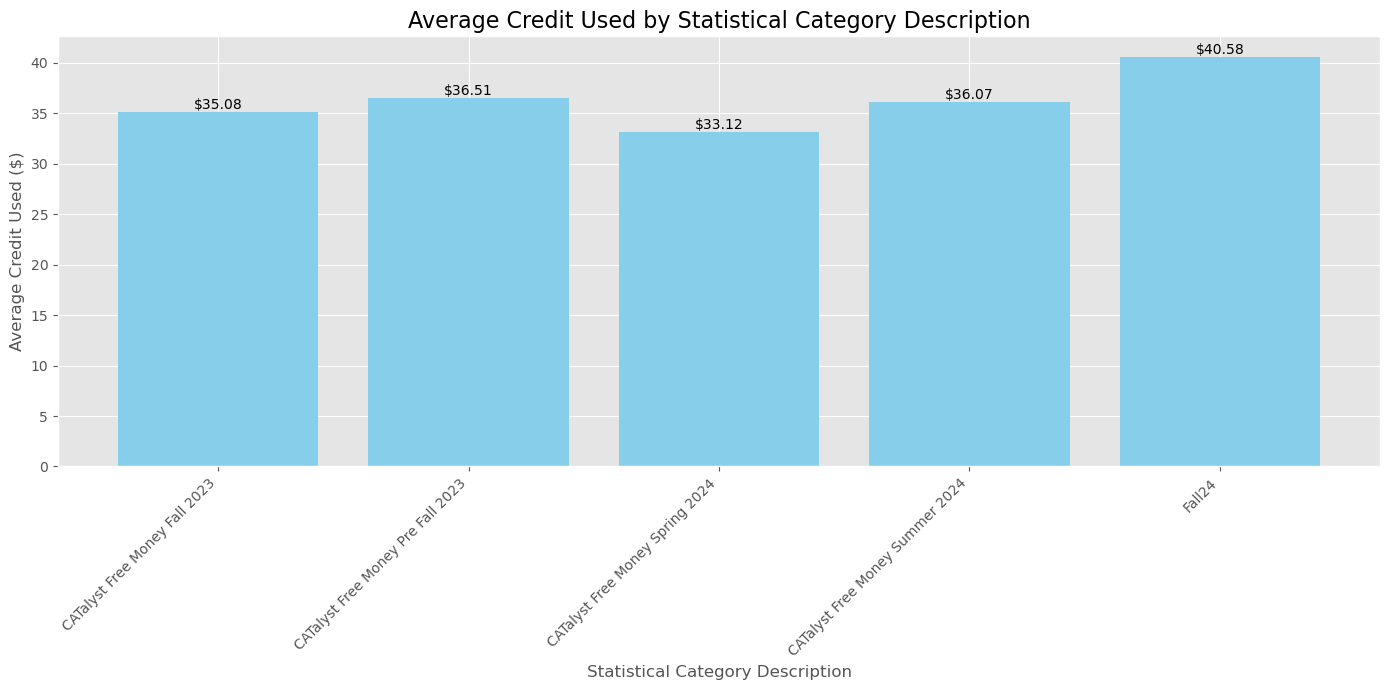

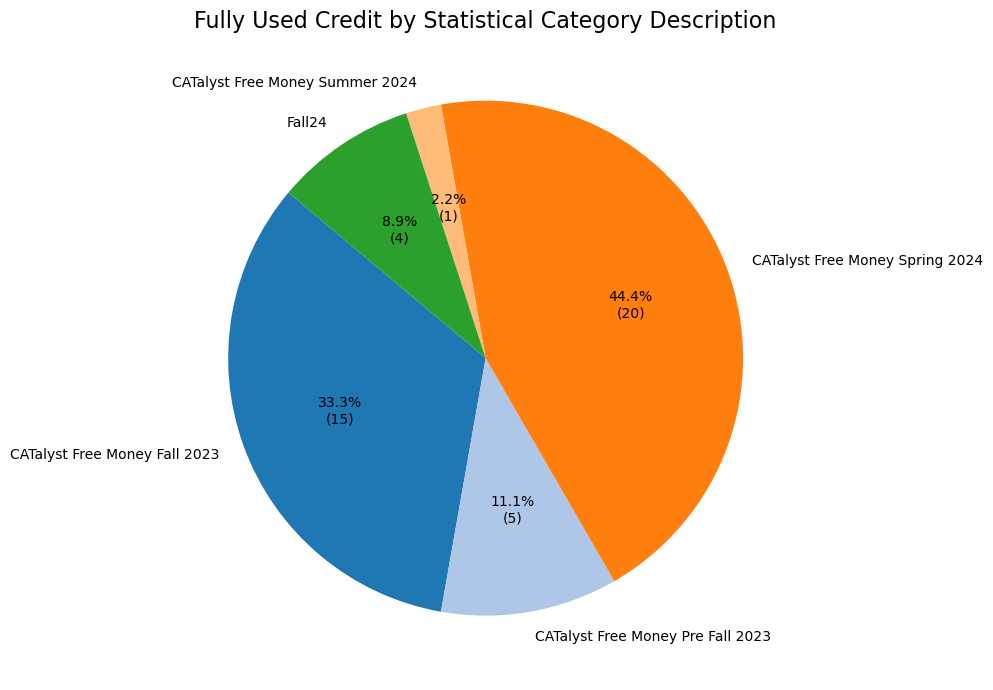

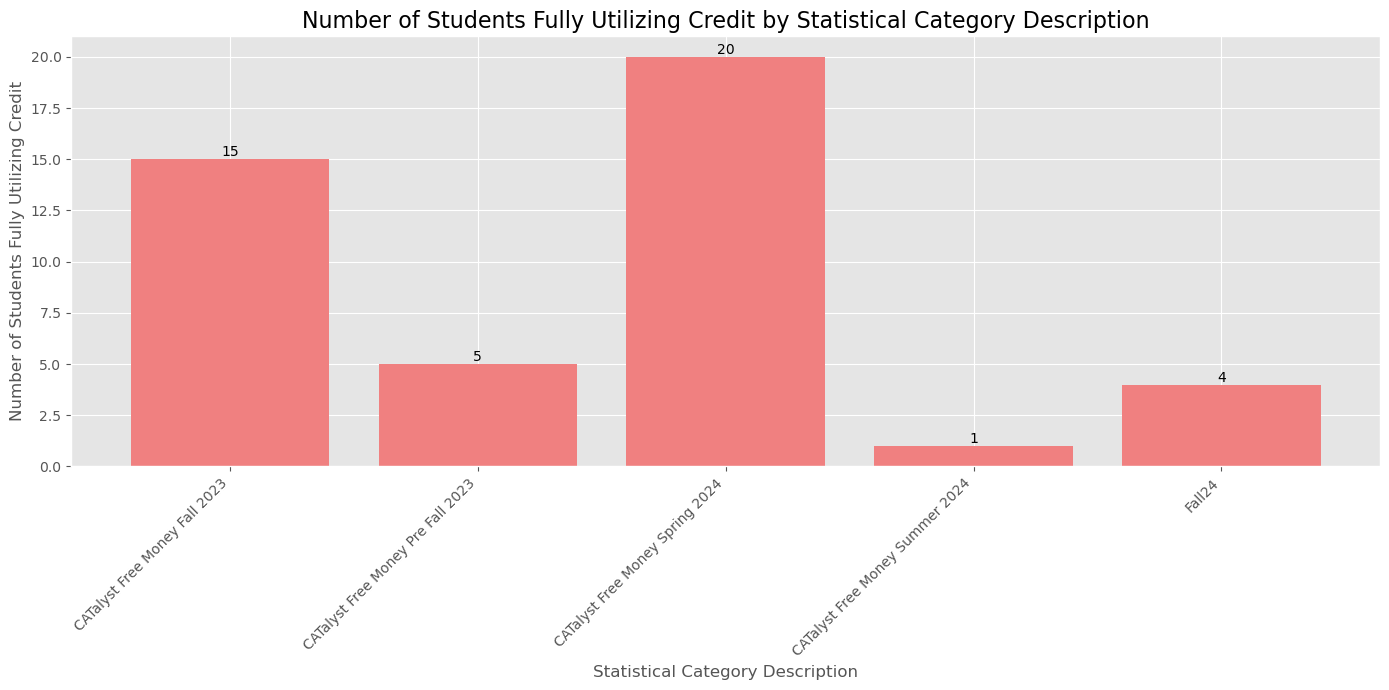

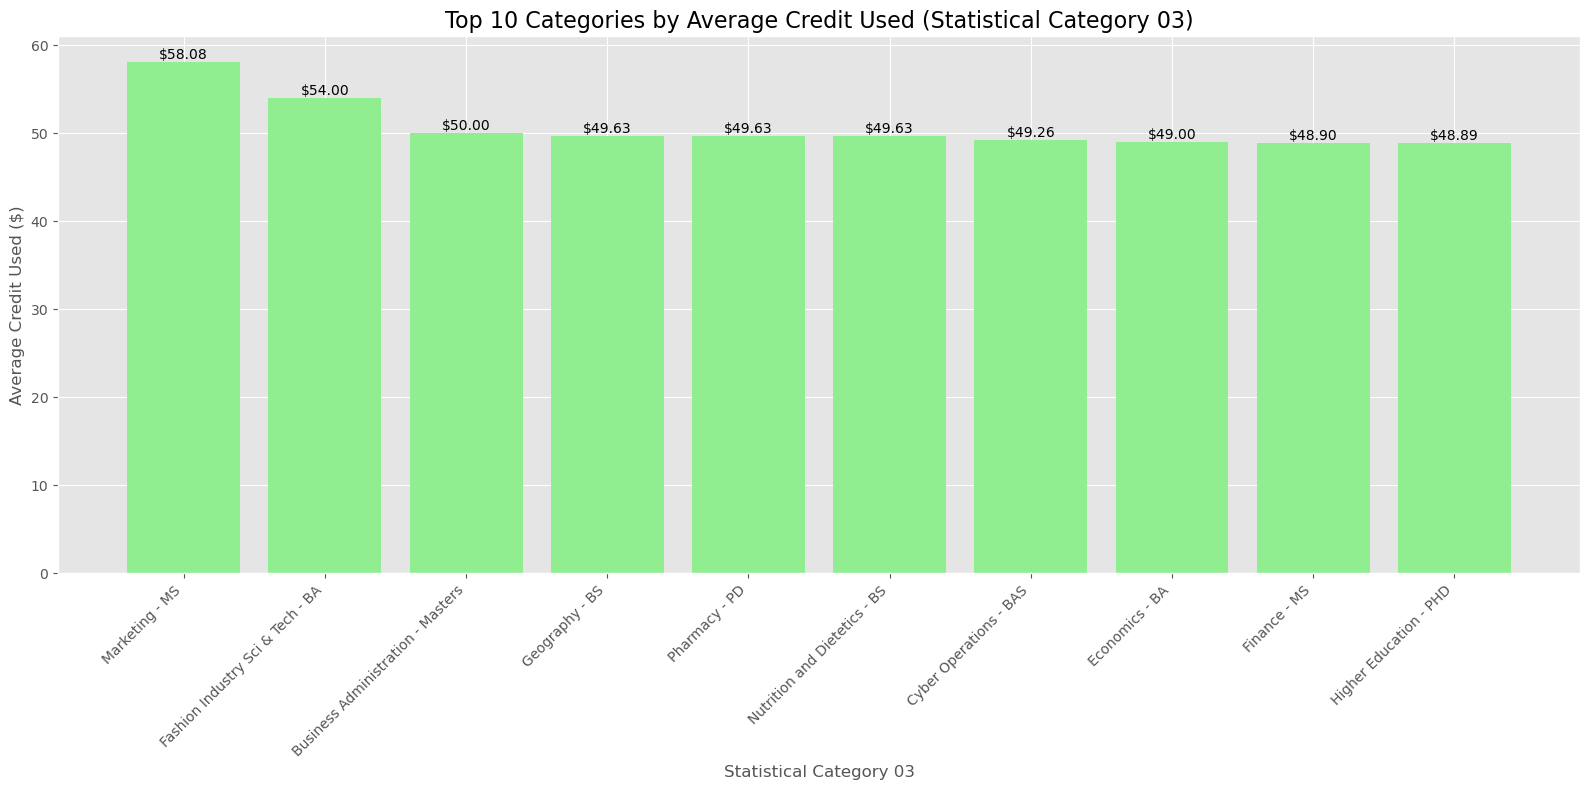

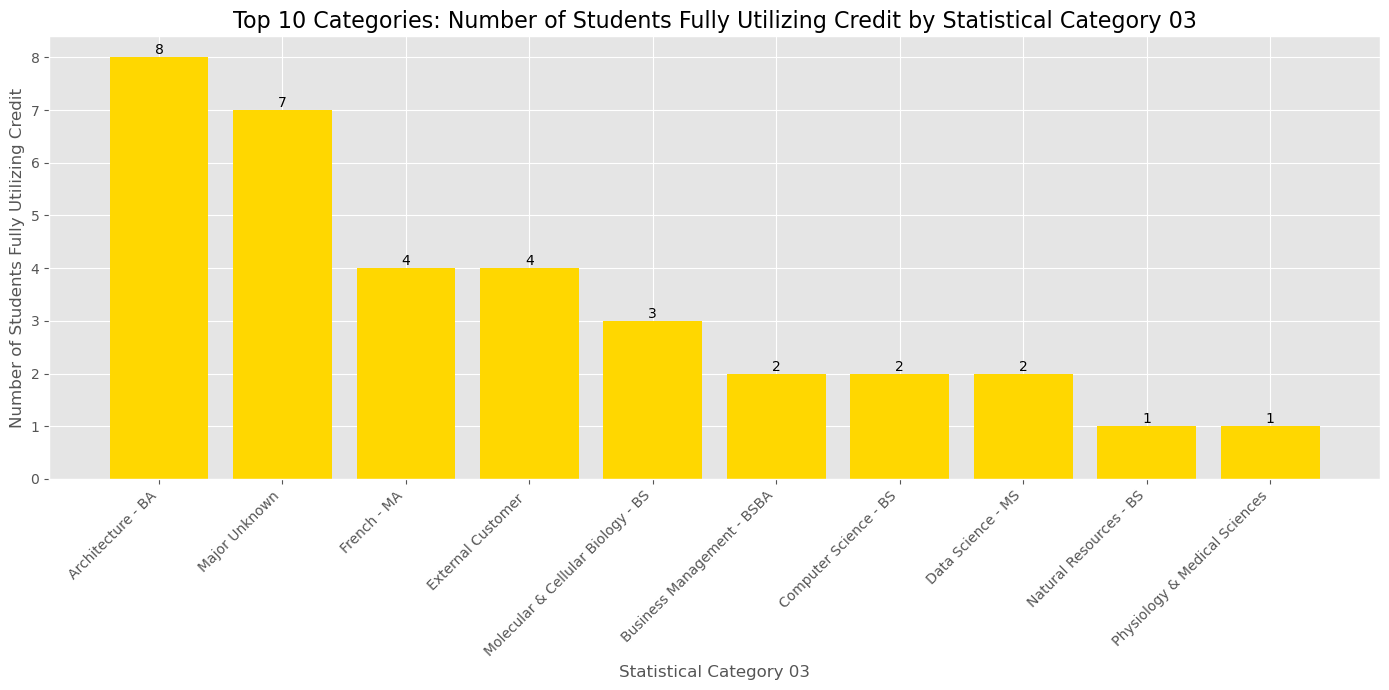

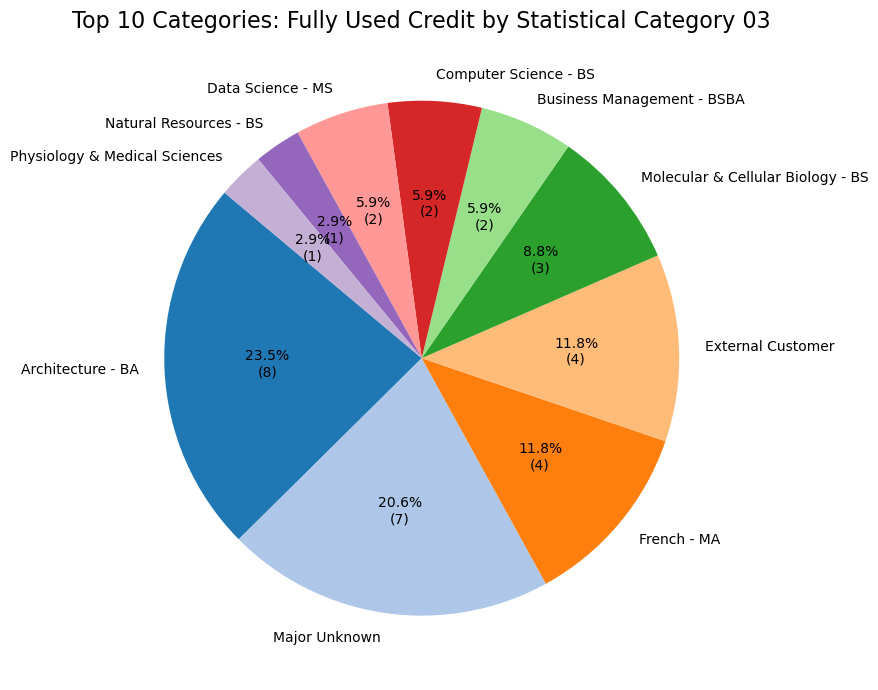

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('out1.csv')

# Replace category names
df['Statistical Category Description'] = df['Statistical Category Description'].replace(
    {
        "CATalyst Free Money Grad": "Fall24",
        "CATalyst Free Money Under Grad": "Fall24",
        "Catalyst Free Money Pre Fall 2023": "PreFall23",
        "Catalyst Free Money Summer 2023": "Summer23",
        "Catalyst Free Money Spring 2024": "Spring24",
        "Catalyst Free Money Fall 2023": "Fall23"
    }
)

# Calculate statistics for Statistical Category Description
category_description_stats = df.groupby('Statistical Category Description')['Extracted Final Balance'].agg(
    Avg_Credit_Used=lambda x: x.fillna(0).mean(),
    Fully_Used_Credit=lambda x: (x == 0).sum()
).reset_index()

# Calculate statistics for Statistical Category 03
category_03_stats = df.groupby('Statistical Category 03')['Extracted Final Balance'].agg(
    Avg_Credit_Used=lambda x: x.fillna(0).mean(),
    Fully_Used_Credit=lambda x: (x == 0).sum()
).reset_index()

# Set up the visualization style
plt.style.use('ggplot')

# 1. Bar Chart: Average Credit Used by Statistical Category Description
plt.figure(figsize=(14, 7))
bars = plt.bar(category_description_stats['Statistical Category Description'],
               category_description_stats['Avg_Credit_Used'],
               color='skyblue')
plt.title('Average Credit Used by Statistical Category Description', fontsize=16)
plt.xlabel('Statistical Category Description', fontsize=12)
plt.ylabel('Average Credit Used ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"${height:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
# Insight: Fall24 shows the highest average credit used, indicating significant allocation for this category.

# 2. Pie Chart: Fully Used Credit by Statistical Category Description
plt.figure(figsize=(10, 7))
sizes = category_description_stats['Fully_Used_Credit']
labels = category_description_stats['Statistical Category Description']
colors = plt.cm.tab20.colors[:len(labels)]
plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(sizes) / 100)})', startangle=140, colors=colors)
plt.title('Fully Used Credit by Statistical Category Description', fontsize=16)
plt.tight_layout()
plt.show()
# Insight: PreFall23 accounts for a substantial proportion of fully used credits, indicating efficient utilization of allocated funds.

# 3. Bar Chart: Fully Used Credit by Statistical Category Description
plt.figure(figsize=(14, 7))
bars = plt.bar(category_description_stats['Statistical Category Description'],
               category_description_stats['Fully_Used_Credit'],
               color='lightcoral')
plt.title('Number of Students Fully Utilizing Credit by Statistical Category Description', fontsize=16)
plt.xlabel('Statistical Category Description', fontsize=12)
plt.ylabel('Number of Students Fully Utilizing Credit', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
# Insight: Spring24 has the highest number of students fully utilizing their credit allocation, suggesting strong financial planning.

# 4. Bar Chart: Average Credit Used by Statistical Category 03
plt.figure(figsize=(16, 8))
top_categories_03 = category_03_stats.sort_values(by='Avg_Credit_Used', ascending=False).head(10)
bars = plt.bar(top_categories_03['Statistical Category 03'], 
               top_categories_03['Avg_Credit_Used'], 
               color='lightgreen')
plt.title('Top 10 Categories by Average Credit Used (Statistical Category 03)', fontsize=16)
plt.xlabel('Statistical Category 03', fontsize=12)
plt.ylabel('Average Credit Used ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"${height:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
# Insight: The top category in Statistical Category 03 exhibits remarkably higher average credit use compared to others.

# 5. Bar Chart: Fully Used Credit by Statistical Category 03 (Top 10)
top_10_fully_used_03 = category_03_stats.sort_values(by='Fully_Used_Credit', ascending=False).head(10)
plt.figure(figsize=(14, 7))
bars = plt.bar(top_10_fully_used_03['Statistical Category 03'],
               top_10_fully_used_03['Fully_Used_Credit'],
               color='gold')
plt.title('Top 10 Categories: Number of Students Fully Utilizing Credit by Statistical Category 03', fontsize=16)
plt.xlabel('Statistical Category 03', fontsize=12)
plt.ylabel('Number of Students Fully Utilizing Credit', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
# Insight: The highest number of fully utilized credits in Statistical Category 03 indicates categories where funding is efficiently utilized.

# 6. Pie Chart: Fully Used Credit by Statistical Category 03 (Top 10)
plt.figure(figsize=(10, 7))
sizes = top_10_fully_used_03['Fully_Used_Credit']
labels = top_10_fully_used_03['Statistical Category 03']
colors = plt.cm.tab20.colors[:len(labels)]
plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(sizes) / 100)})', startangle=140, colors=colors)
plt.title('Top 10 Categories: Fully Used Credit by Statistical Category 03', fontsize=16)
plt.tight_layout()
plt.show()
# Insight: A few categories dominate fully used credits, signifying focused areas of efficient resource consumption.


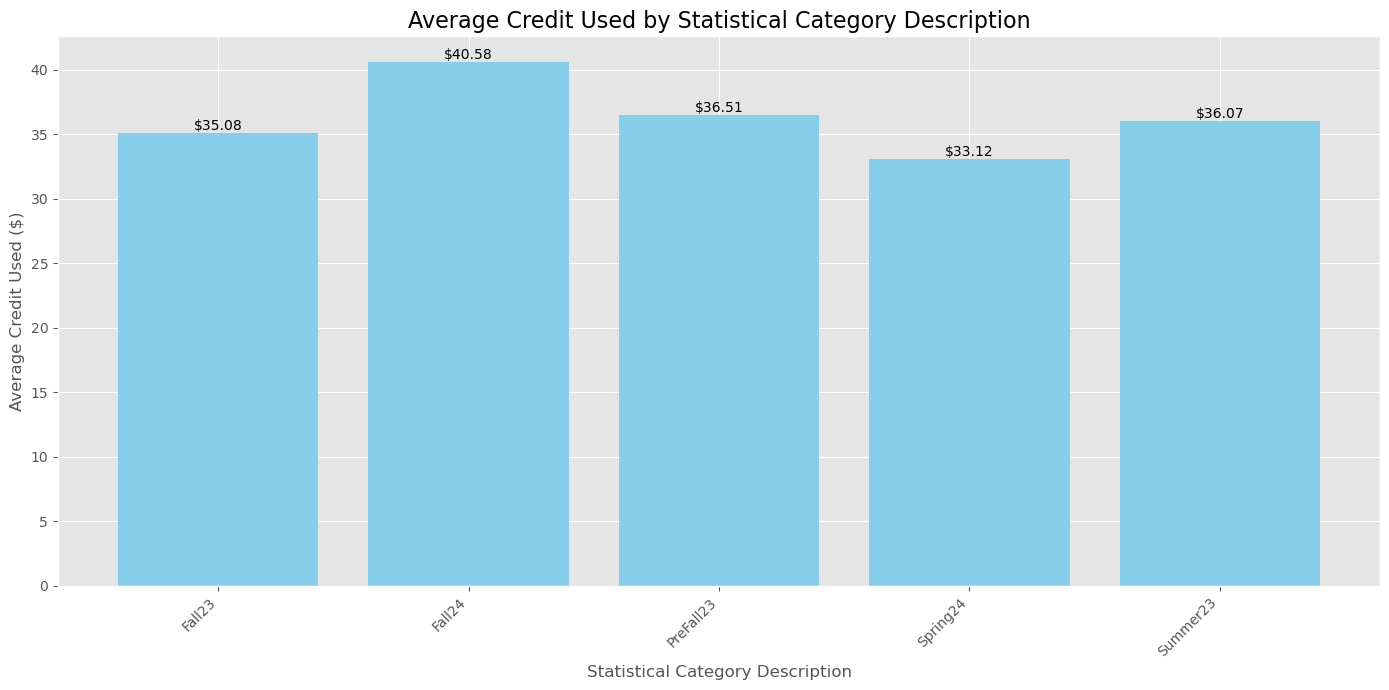

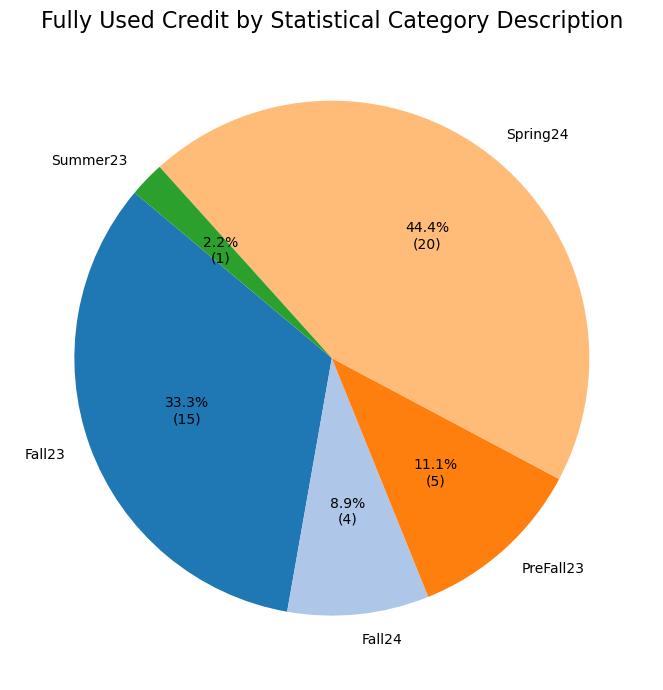

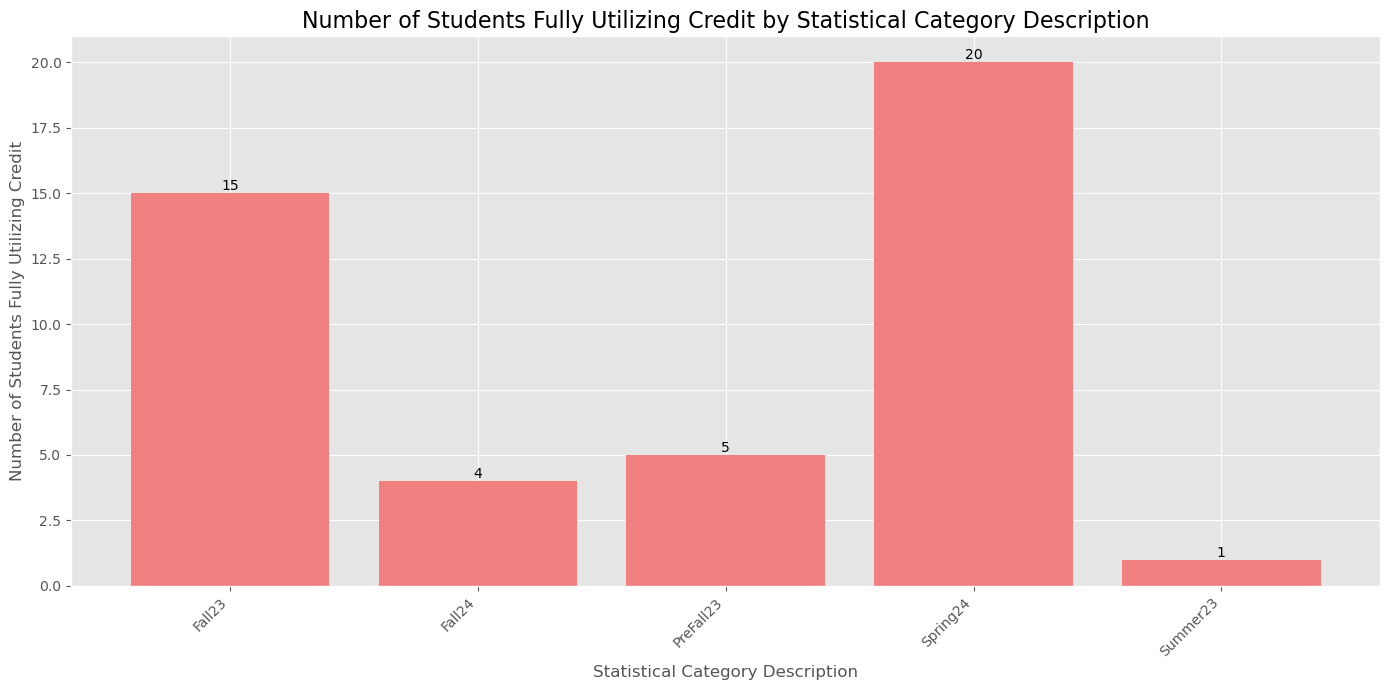

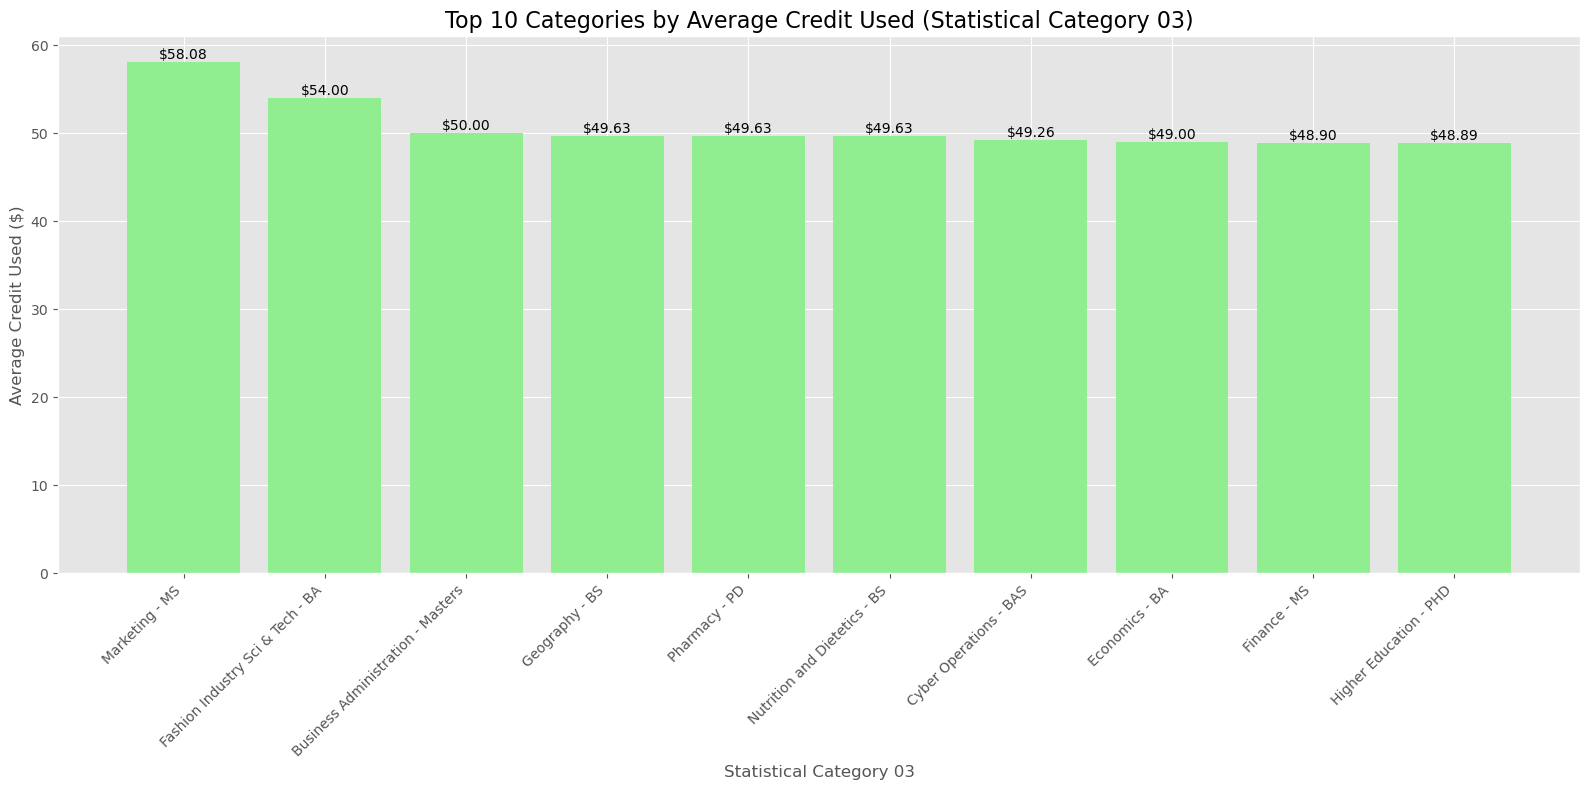

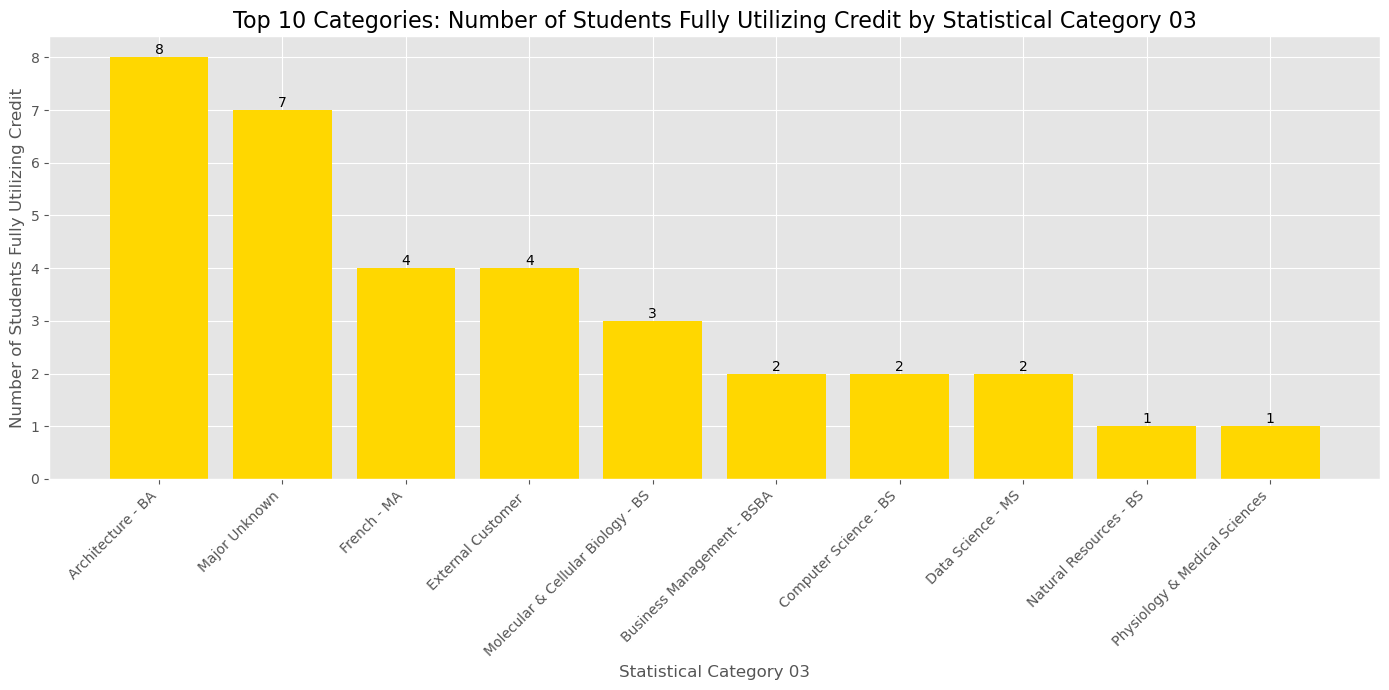

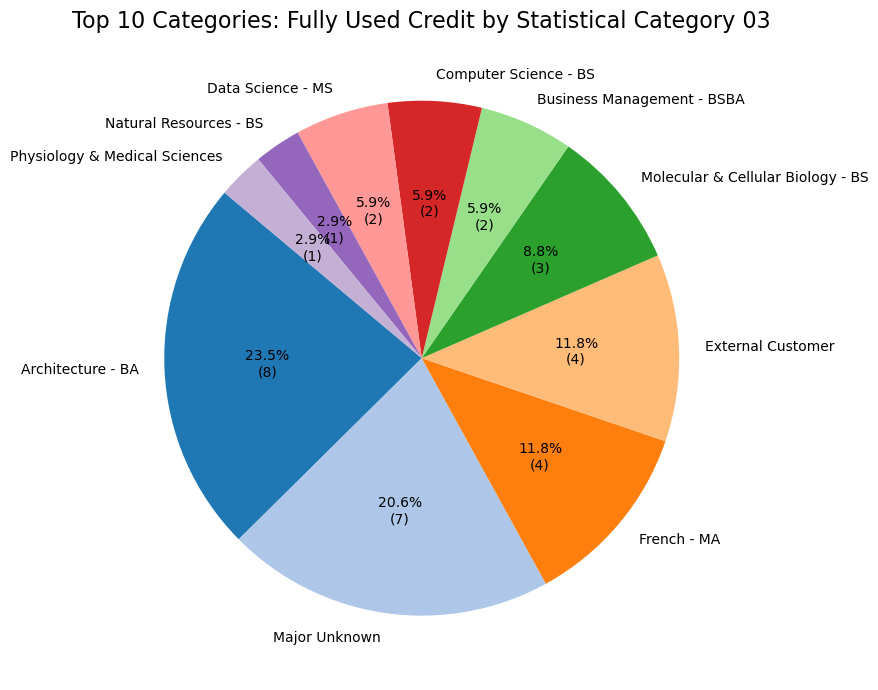

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('out1.csv')

# Replace category names
df['Statistical Category Description'] = df['Statistical Category Description'].replace(
    {
        "CATalyst Free Money Grad": "Fall24",
        "CATalyst Free Money Under Grad": "Fall24",
        "CATalyst Free Money Pre Fall 2023": "PreFall23",
        "CATalyst Free Money Summer 2024": "Summer23",
        "CATalyst Free Money Spring 2024": "Spring24",
        "CATalyst Free Money Fall 2023": "Fall23"
    }
)

# Calculate statistics for Statistical Category Description
category_description_stats = df.groupby('Statistical Category Description')['Extracted Final Balance'].agg(
    Avg_Credit_Used=lambda x: x.fillna(0).mean(),
    Fully_Used_Credit=lambda x: (x == 0).sum()
).reset_index()

# Calculate statistics for Statistical Category 03
category_03_stats = df.groupby('Statistical Category 03')['Extracted Final Balance'].agg(
    Avg_Credit_Used=lambda x: x.fillna(0).mean(),
    Fully_Used_Credit=lambda x: (x == 0).sum()
).reset_index()

# Set up the visualization style
plt.style.use('ggplot')

# 1. Bar Chart: Average Credit Used by Statistical Category Description
plt.figure(figsize=(14, 7))
bars = plt.bar(category_description_stats['Statistical Category Description'],
               category_description_stats['Avg_Credit_Used'],
               color='skyblue')
plt.title('Average Credit Used by Statistical Category Description', fontsize=16)
plt.xlabel('Statistical Category Description', fontsize=12)
plt.ylabel('Average Credit Used ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"${height:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
# Insight: Fall24 shows the highest average credit used, indicating significant allocation for this category.

# 2. Pie Chart: Fully Used Credit by Statistical Category Description
plt.figure(figsize=(10, 7))
sizes = category_description_stats['Fully_Used_Credit']
labels = category_description_stats['Statistical Category Description']
colors = plt.cm.tab20.colors[:len(labels)]
plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(sizes) / 100)})', startangle=140, colors=colors)
plt.title('Fully Used Credit by Statistical Category Description', fontsize=16)
plt.tight_layout()
plt.show()
# Insight: PreFall23 accounts for a substantial proportion of fully used credits, indicating efficient utilization of allocated funds.

# 3. Bar Chart: Fully Used Credit by Statistical Category Description
plt.figure(figsize=(14, 7))
bars = plt.bar(category_description_stats['Statistical Category Description'],
               category_description_stats['Fully_Used_Credit'],
               color='lightcoral')
plt.title('Number of Students Fully Utilizing Credit by Statistical Category Description', fontsize=16)
plt.xlabel('Statistical Category Description', fontsize=12)
plt.ylabel('Number of Students Fully Utilizing Credit', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
# Insight: Spring24 has the highest number of students fully utilizing their credit allocation, suggesting strong financial planning.

# 4. Bar Chart: Average Credit Used by Statistical Category 03
plt.figure(figsize=(16, 8))
top_categories_03 = category_03_stats.sort_values(by='Avg_Credit_Used', ascending=False).head(10)
bars = plt.bar(top_categories_03['Statistical Category 03'], 
               top_categories_03['Avg_Credit_Used'], 
               color='lightgreen')
plt.title('Top 10 Categories by Average Credit Used (Statistical Category 03)', fontsize=16)
plt.xlabel('Statistical Category 03', fontsize=12)
plt.ylabel('Average Credit Used ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"${height:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
# Insight: The top category in Statistical Category 03 exhibits remarkably higher average credit use compared to others.

# 5. Bar Chart: Fully Used Credit by Statistical Category 03 (Top 10)
top_10_fully_used_03 = category_03_stats.sort_values(by='Fully_Used_Credit', ascending=False).head(10)
plt.figure(figsize=(14, 7))
bars = plt.bar(top_10_fully_used_03['Statistical Category 03'],
               top_10_fully_used_03['Fully_Used_Credit'],
               color='gold')
plt.title('Top 10 Categories: Number of Students Fully Utilizing Credit by Statistical Category 03', fontsize=16)
plt.xlabel('Statistical Category 03', fontsize=12)
plt.ylabel('Number of Students Fully Utilizing Credit', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
# Insight: The highest number of fully utilized credits in Statistical Category 03 indicates categories where funding is efficiently utilized.

# 6. Pie Chart: Fully Used Credit by Statistical Category 03 (Top 10)
plt.figure(figsize=(10, 7))
sizes = top_10_fully_used_03['Fully_Used_Credit']
labels = top_10_fully_used_03['Statistical Category 03']
colors = plt.cm.tab20.colors[:len(labels)]
plt.pie(sizes, labels=labels, autopct=lambda p: f'{p:.1f}%\n({int(p * sum(sizes) / 100)})', startangle=140, colors=colors)
plt.title('Top 10 Categories: Fully Used Credit by Statistical Category 03', fontsize=16)
plt.tight_layout()
plt.show()
# Insight: A few categories dominate fully used credits, signifying focused areas of efficient resource consumption.


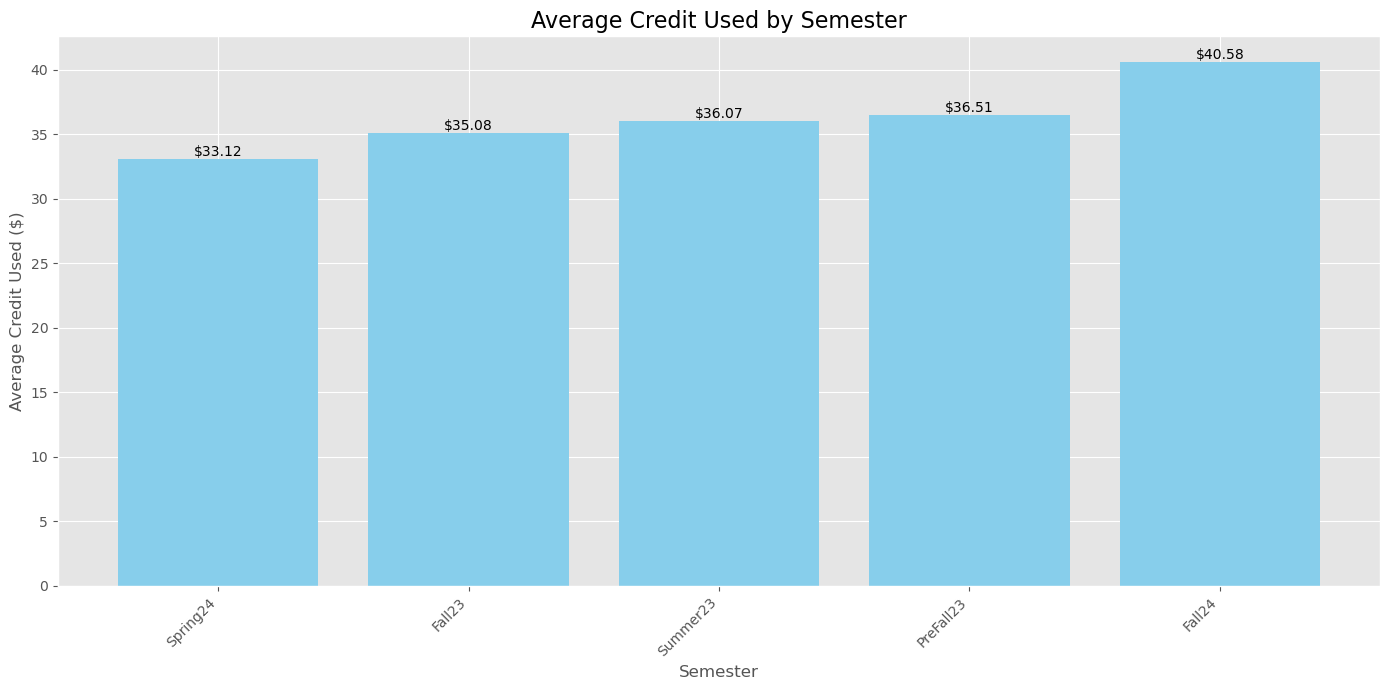

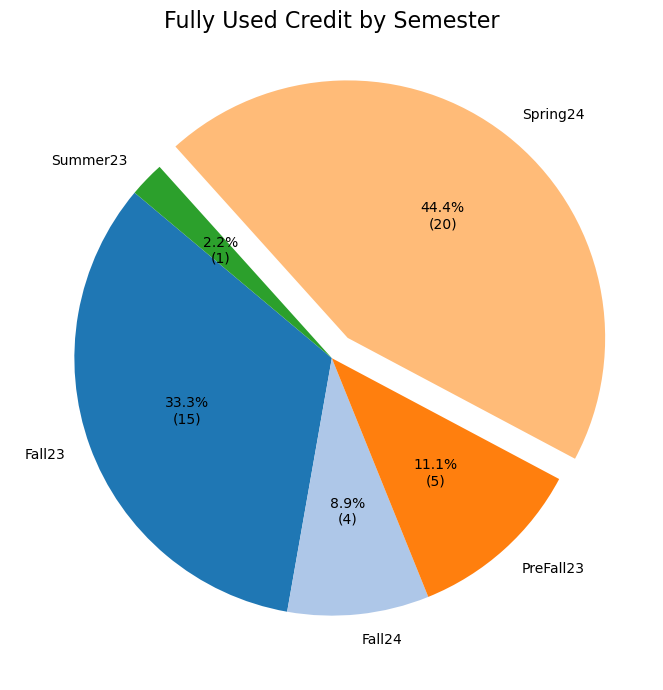

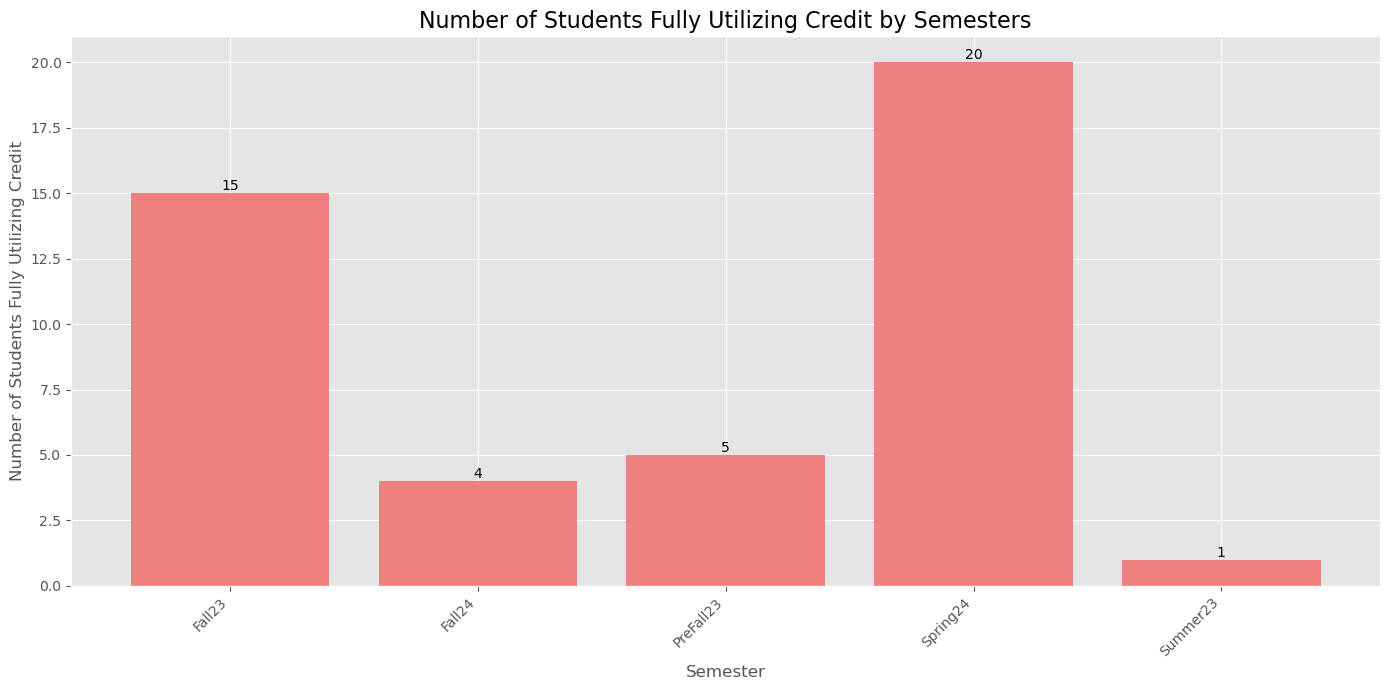

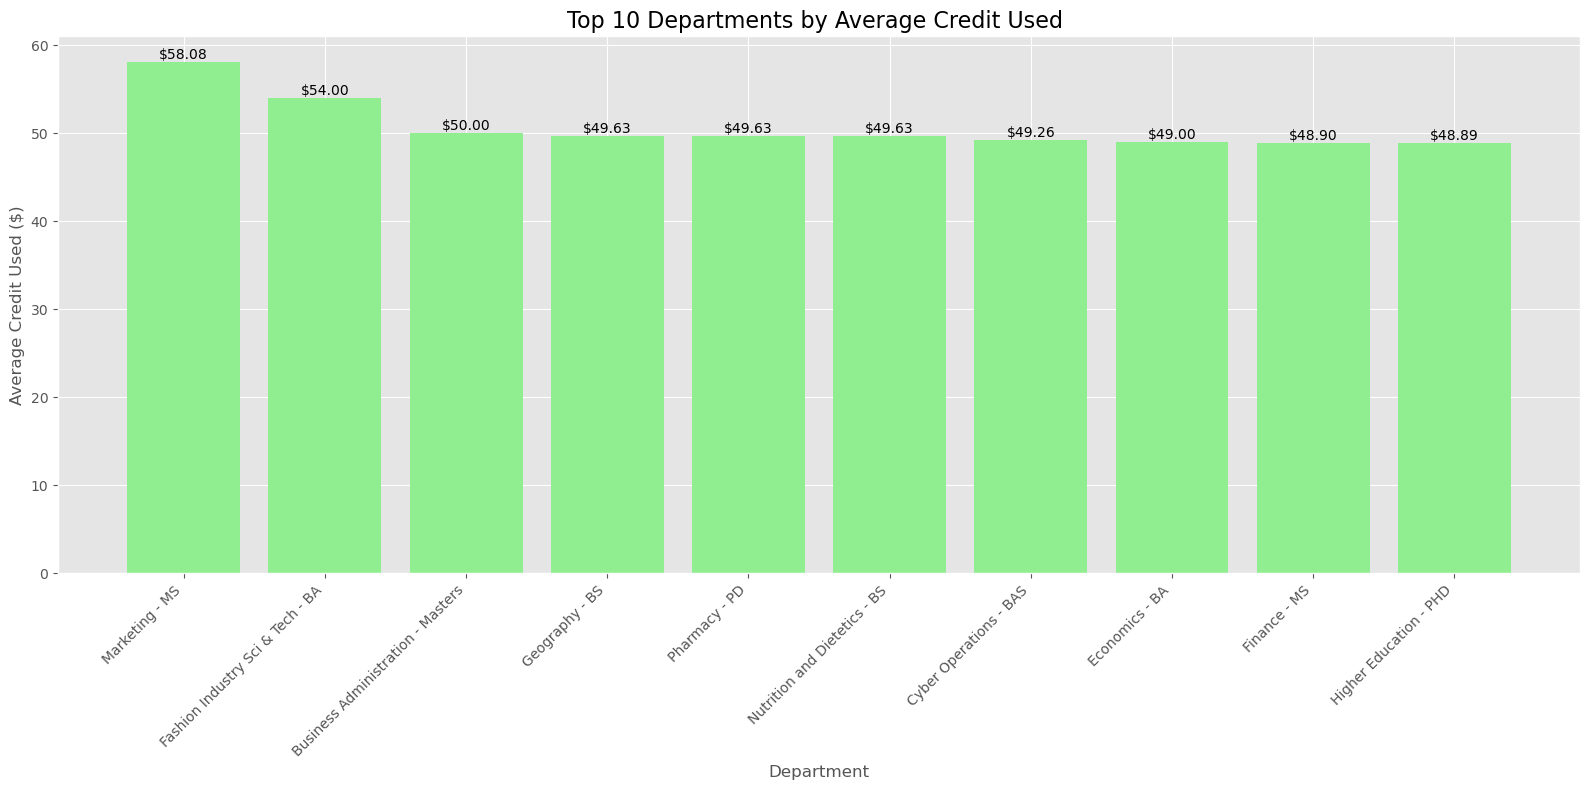

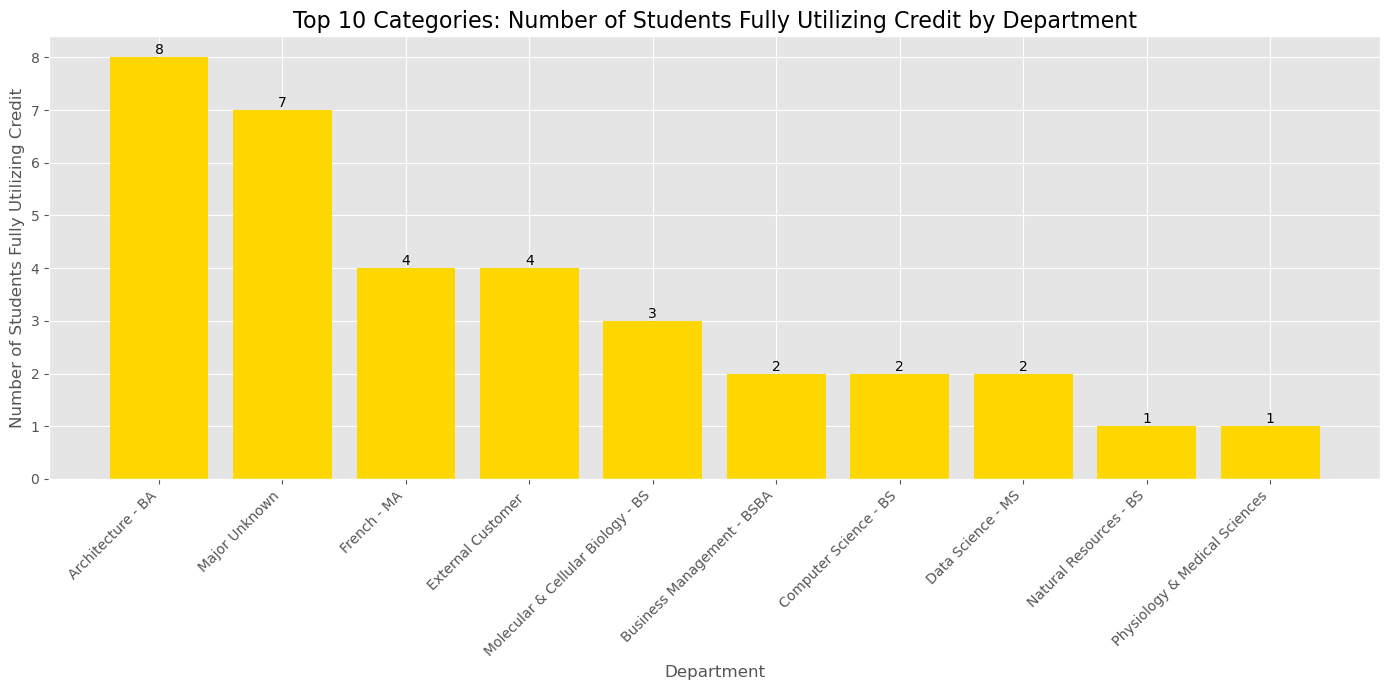

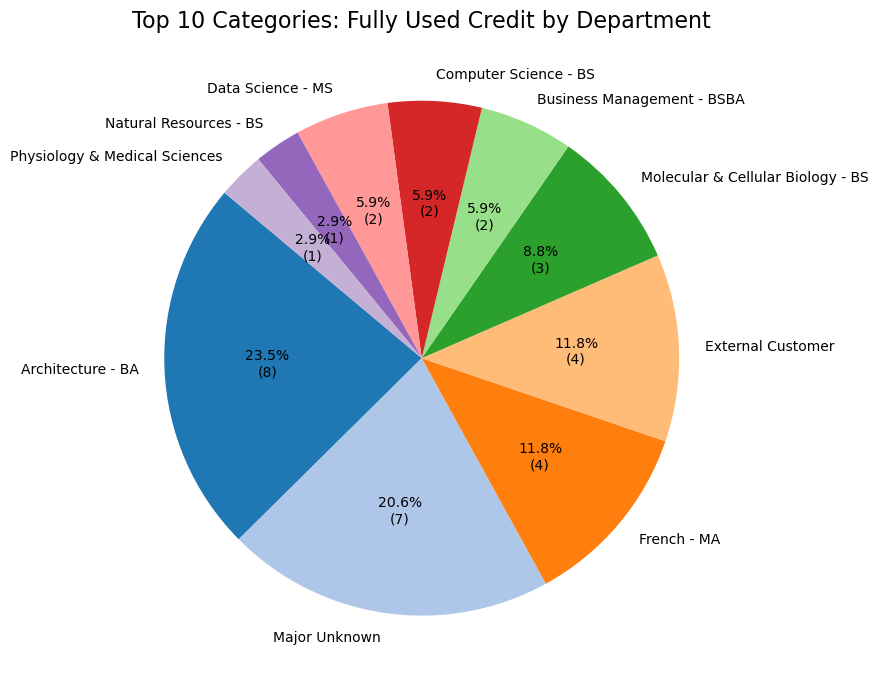

In [23]:
a

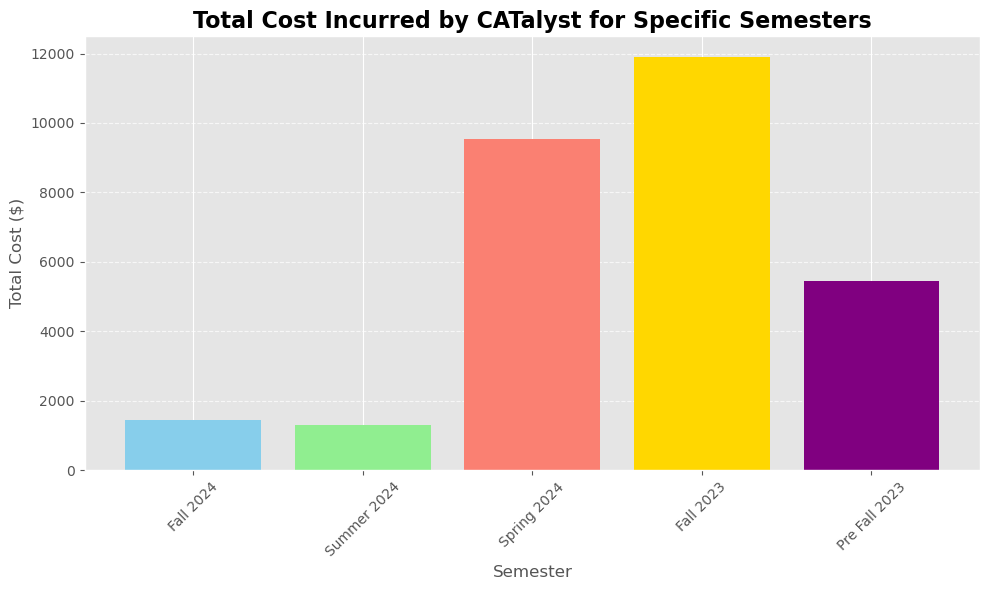

        Semester  Total Cost
0      Fall 2024        1450
1    Summer 2024        1300
2    Spring 2024        9550
3      Fall 2023       11900
4  Pre Fall 2023        5450


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
  
data = pd.read_csv('out1.csv')

# Filter entries for "CATalyst Free Money" categories
relevant_entries = data[
    data["Statistical Category Description"].str.contains("CATalyst Free Money", na=False, case=False)
]

# Define specific semesters and their corresponding descriptions
specific_semesters = {
    "Fall 2024": ["CATalyst Free Money Grad", "CATalyst Free Money Undergrad"],
    "Summer 2024": ["CATalyst Free Money Summer 2024"],
    "Spring 2024": ["CATalyst Free Money Spring 2024"],
    "Fall 2023": ["CATalyst Free Money Fall 2023"],
    "Pre Fall 2023": ["CATalyst Free Money Pre Fall 2023"],
}

# Initialize a list to store results
filtered_results = []

# Iterate through each specific semester and its descriptions to filter and calculate costs
for semester, descriptions in specific_semesters.items():
    # Filter data for the current semester's descriptions
    semester_data = relevant_entries[
        relevant_entries["Statistical Category Description"].str.contains(
            "|".join(descriptions), na=False, case=False
        )
    ]
    # Calculate total cost for the semester
    total_cost = (semester_data["Number of Users"] * 50).sum()
    filtered_results.append({"Semester": semester, "Total Cost": total_cost})

# Convert results to a DataFrame
filtered_costs = pd.DataFrame(filtered_results)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(filtered_costs["Semester"], filtered_costs["Total Cost"], color=["skyblue", "lightgreen", "salmon", "gold", "purple"])
plt.title("Total Cost Incurred by CATalyst for Specific Semesters", fontsize=16, fontweight="bold")
plt.xlabel("Semester", fontsize=12)
plt.ylabel("Total Cost ($)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Display the filtered costs
print(filtered_costs)


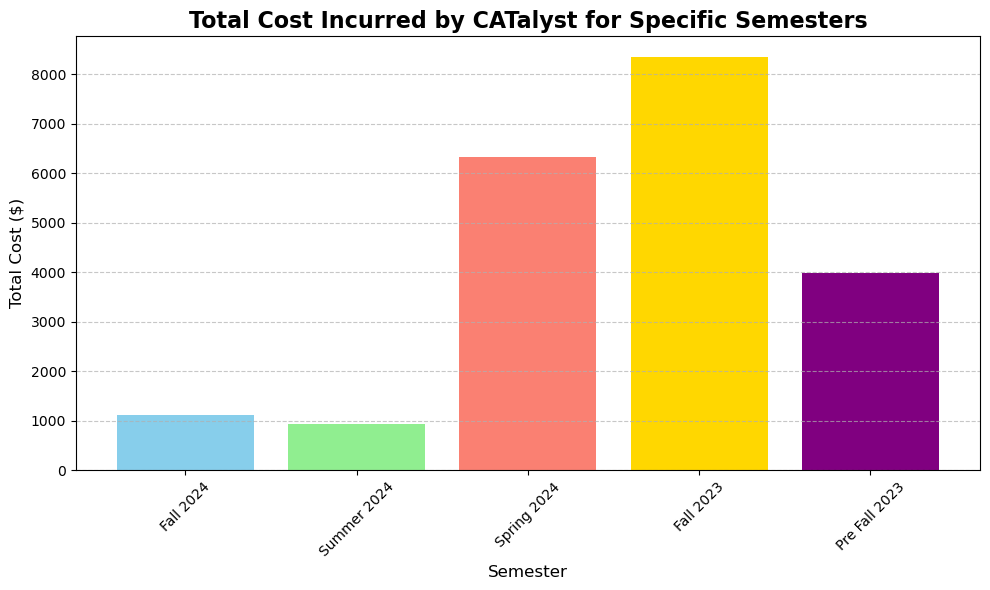

        Semester  Total Cost
0      Fall 2024    1111.690
1    Summer 2024     937.810
2    Spring 2024    6325.794
3      Fall 2023    8349.280
4  Pre Fall 2023    3979.780


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
#file_path = '/path/to/your/file.csv'  # Update with the correct path to your CSV file
data = pd.read_csv('out1.csv')

# Filter entries for "CATalyst Free Money" categories
relevant_entries = data[
    data["Statistical Category Description"].str.contains("CATalyst Free Money", na=False, case=False)
]

# Convert 'Extracted Final Balance' to numeric (handles potential issues with strings or missing values)
relevant_entries["Extracted Final Balance"] = pd.to_numeric(relevant_entries["Extracted Final Balance"], errors='coerce')

# Define specific semesters and their corresponding descriptions
specific_semesters = {
    "Fall 2024": ["CATalyst Free Money Grad", "CATalyst Free Money Undergrad"],
    "Summer 2024": ["CATalyst Free Money Summer 2024"],
    "Spring 2024": ["CATalyst Free Money Spring 2024"],
    "Fall 2023": ["CATalyst Free Money Fall 2023"],
    "Pre Fall 2023": ["CATalyst Free Money Pre Fall 2023"],
}

# Initialize a list to store results
filtered_results = []

# Iterate through each specific semester and its descriptions to filter and calculate costs
for semester, descriptions in specific_semesters.items():
    # Filter data for the current semester's descriptions
    semester_data = relevant_entries[
        relevant_entries["Statistical Category Description"].str.contains(
            "|".join(descriptions), na=False, case=False
        )
    ]
    # Calculate the total extracted balance for the semester
    total_cost = semester_data["Extracted Final Balance"].sum()
    filtered_results.append({"Semester": semester, "Total Cost": total_cost})

# Convert results to a DataFrame
filtered_costs = pd.DataFrame(filtered_results)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(filtered_costs["Semester"], filtered_costs["Total Cost"], color=["skyblue", "lightgreen", "salmon", "gold", "purple"])
plt.title("Total Cost Incurred by CATalyst for Specific Semesters", fontsize=16, fontweight="bold")
plt.xlabel("Semester", fontsize=12)
plt.ylabel("Total Cost ($)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Display the filtered costs
print(filtered_costs)


Number of people who used any credit: 610
Total number of people: 632
Overall average credit used: $36.35

Top 5 Demographic Stats:
                              Statistical Category 01  Avg_Credit_Used  \
2   Catalyst Customer,Classified Staff Wage,Gradua...           50.000   
13                 Professional Student - Second Year           45.315   
8                     DCC Associates,Graduate Student           45.260   
10            Graduate Student,Regular App/Fac Fiscal           43.590   
5              Classified Staff Wage,Graduate Student           42.240   

    Fully_Used_Credit  
2                   0  
13                  0  
8                   0  
10                  0  
5                   0  


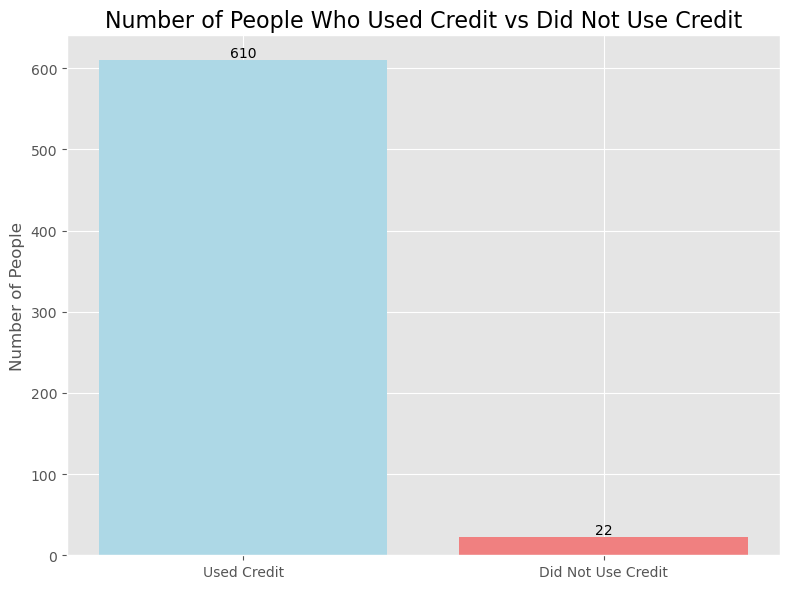

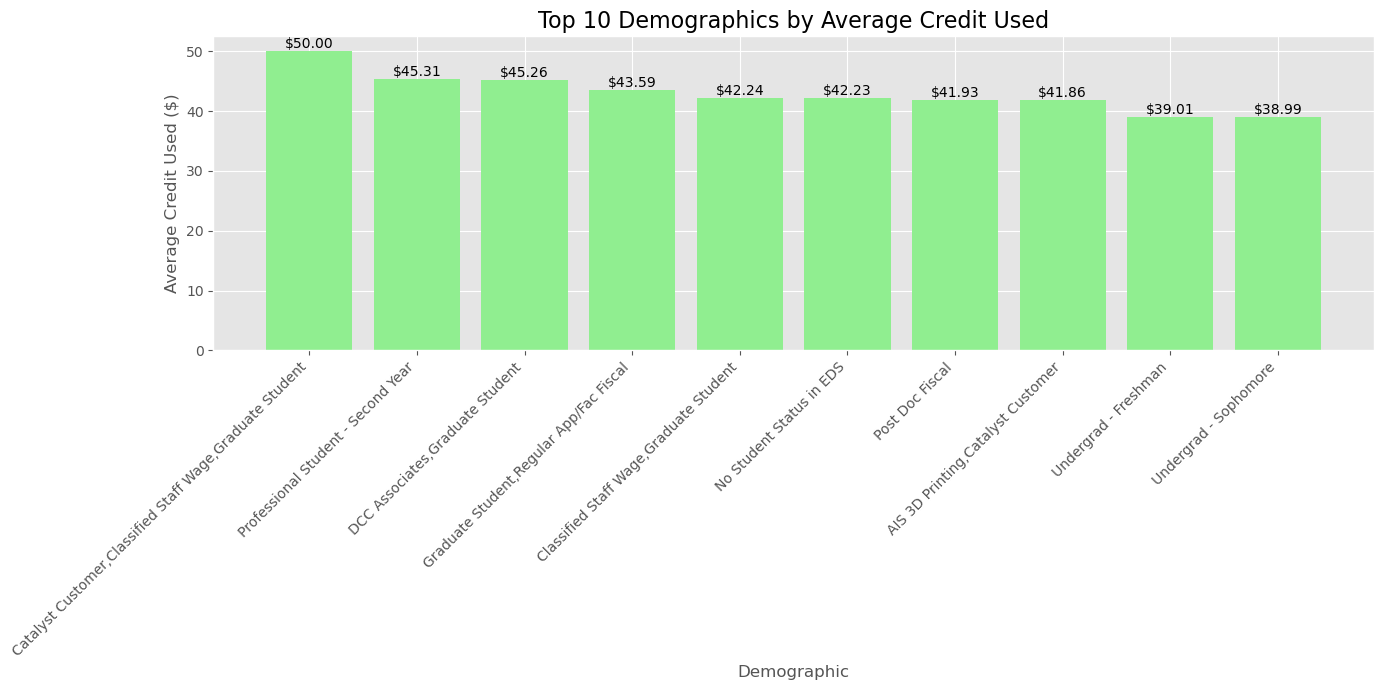

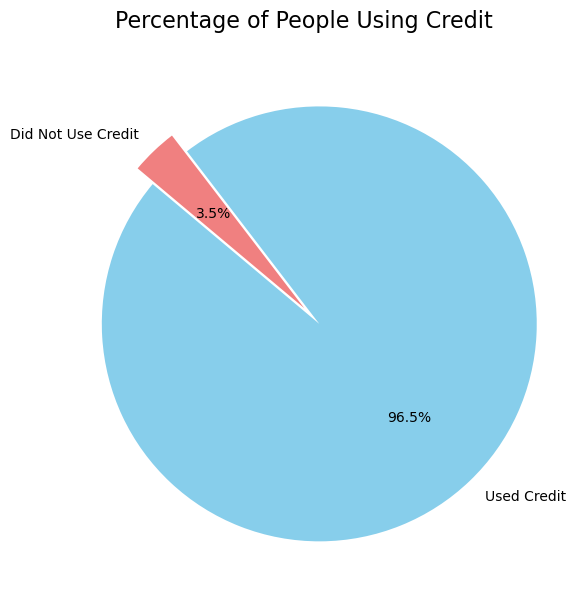

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('out1.csv')

# Step 1: Number of people who used any credit (non-zero extracted final balance)
people_used_credit = df[df['Extracted Final Balance'] > 0]['Primary Identifier'].nunique()
total_people = df['Primary Identifier'].nunique()

# Step 2: Demographic insights (based on Statistical Category 01)
demographic_stats = df.groupby('Statistical Category 01')['Extracted Final Balance'].agg(
    Avg_Credit_Used=lambda x: x.fillna(0).mean(),
    Fully_Used_Credit=lambda x: (x == 0).sum()
).reset_index().sort_values(by='Avg_Credit_Used', ascending=False)

# Step 3: Overall average credit used
avg_credit_used = df['Extracted Final Balance'].mean()

# Print Insights
print(f"Number of people who used any credit: {people_used_credit}")
print(f"Total number of people: {total_people}")
print(f"Overall average credit used: ${avg_credit_used:.2f}")
print("\nTop 5 Demographic Stats:")
print(demographic_stats.head())

# Set up the visualization style
plt.style.use('ggplot')

# 1. Bar Chart: Number of people who used credit vs total
plt.figure(figsize=(8, 6))
bars = plt.bar(['Used Credit', 'Did Not Use Credit'], [people_used_credit, total_people - people_used_credit],
               color=['lightblue', 'lightcoral'])
plt.title('Number of People Who Used Credit vs Did Not Use Credit', fontsize=16)
plt.ylabel('Number of People', fontsize=12)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Bar Chart: Average Credit Used by Demographics (Top 10)
top_10_demographics = demographic_stats.head(10)
plt.figure(figsize=(14, 7))
bars = plt.bar(top_10_demographics['Statistical Category 01'], 
               top_10_demographics['Avg_Credit_Used'], 
               color='lightgreen')
plt.title('Top 10 Demographics by Average Credit Used', fontsize=16)
plt.xlabel('Demographic', fontsize=12)
plt.ylabel('Average Credit Used ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"${height:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 3. Pie Chart: Percentage of People Using Credit
plt.figure(figsize=(8, 6))
sizes = [people_used_credit, total_people - people_used_credit]
labels = ['Used Credit', 'Did Not Use Credit']
colors = ['skyblue', 'lightcoral']
explode = [0.1, 0]  # Explode the first slice
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Percentage of People Using Credit', fontsize=16)

plt.tight_layout()
plt.show()


Number of people who used any credit: 613
Number of people who fully used the credit: 40
Total number of people: 632
Overall average credit used: $13.65

Top 5 Demographic Stats:
                     Statistical Category 01  Avg_Credit_Used  \
1                          Catalyst Customer        44.320000   
7                             DCC Associates        28.546667   
14                    Regular App/Fac Fiscal        19.500000   
4   Classified Staff Salary,Graduate Student        18.250000   
9                           Graduate Student        15.860686   

    Fully_Used_Credit  
1                   4  
7                   1  
14                  0  
4                   0  
9                   9  


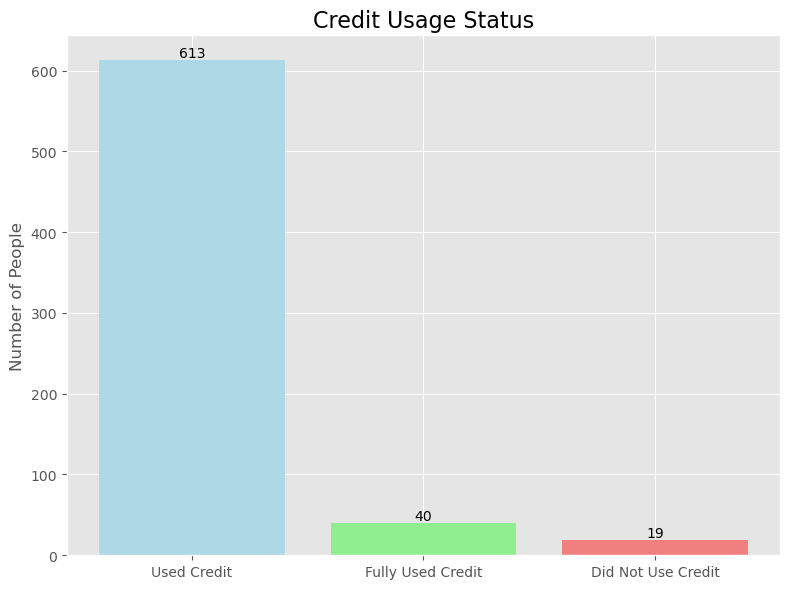

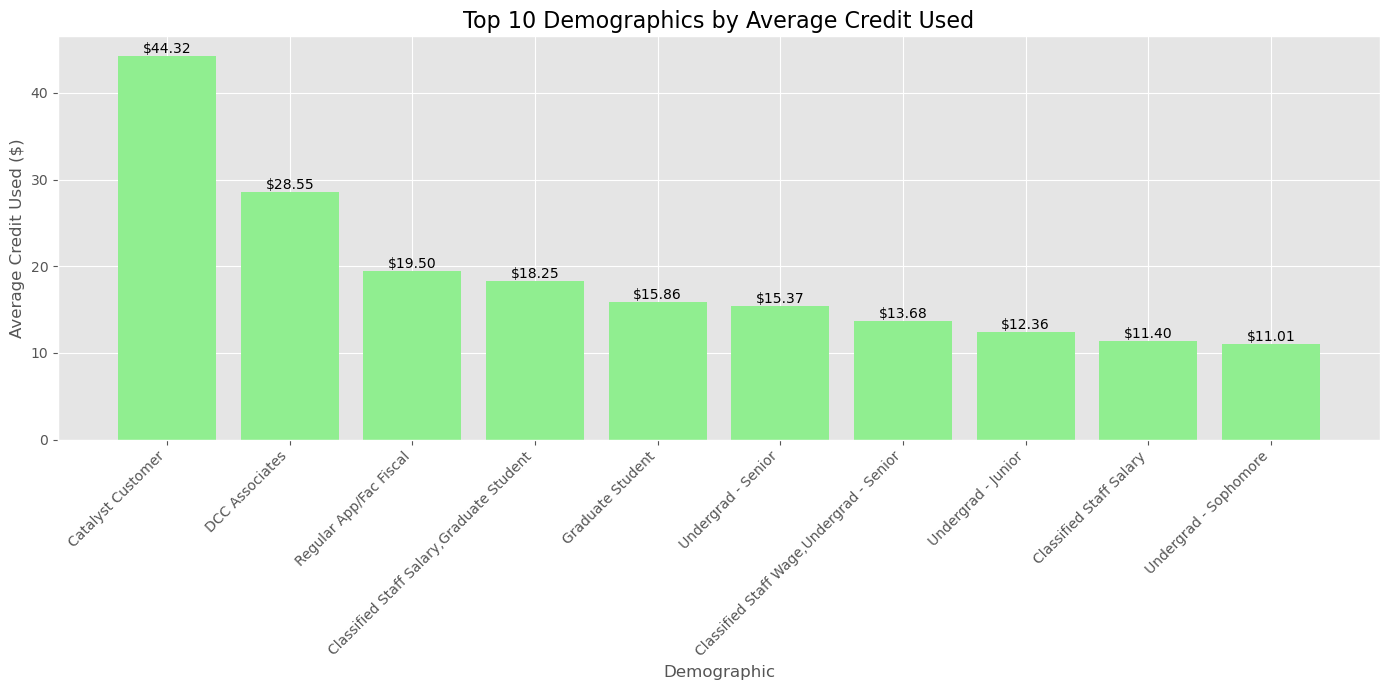

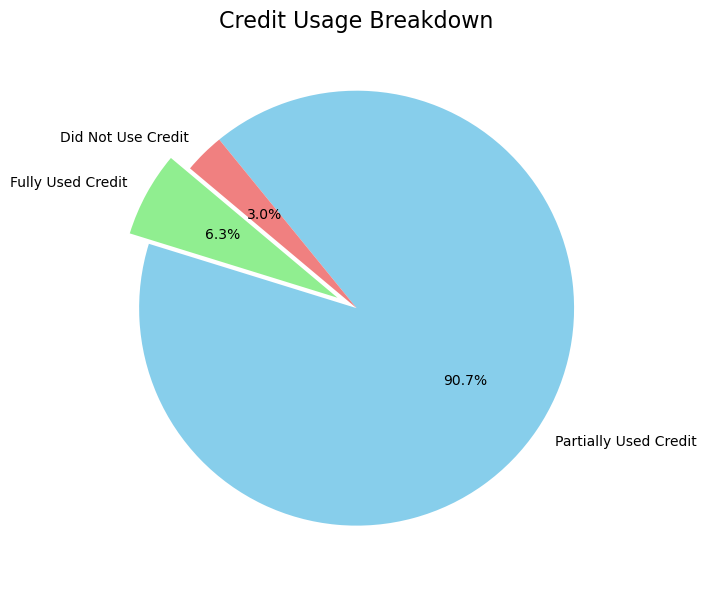

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('out1.csv')

# Step 1: Number of people who used any credit (extracted final balance < 50)
people_used_credit = df[df['Extracted Final Balance'] < 50]['Primary Identifier'].nunique()
total_people = df['Primary Identifier'].nunique()

# Step 2: Number of people who fully used the credit (extracted final balance = 0)
people_fully_used_credit = df[df['Extracted Final Balance'] == 0]['Primary Identifier'].nunique()

# Step 3: Average credit used
avg_credit_used = 50 - df['Extracted Final Balance'].mean()

# Step 4: Demographic insights (based on Statistical Category 01)
demographic_stats = df.groupby('Statistical Category 01')['Extracted Final Balance'].agg(
    Avg_Credit_Used=lambda x: 50 - x.fillna(50).mean(),
    Fully_Used_Credit=lambda x: (x == 0).sum()
).reset_index().sort_values(by='Avg_Credit_Used', ascending=False)

# Print Insights
print(f"Number of people who used any credit: {people_used_credit}")
print(f"Number of people who fully used the credit: {people_fully_used_credit}")
print(f"Total number of people: {total_people}")
print(f"Overall average credit used: ${avg_credit_used:.2f}")
print("\nTop 5 Demographic Stats:")
print(demographic_stats.head())

# Set up the visualization style
plt.style.use('ggplot')

# 1. Bar Chart: Number of people who used credit vs fully used credit vs did not use
plt.figure(figsize=(8, 6))
bars = plt.bar(
    ['Used Credit', 'Fully Used Credit', 'Did Not Use Credit'],
    [people_used_credit, people_fully_used_credit, total_people - people_used_credit],
    color=['lightblue', 'lightgreen', 'lightcoral']
)
plt.title('Credit Usage Status', fontsize=16)
plt.ylabel('Number of People', fontsize=12)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Bar Chart: Average Credit Used by Demographics (Top 10)
top_10_demographics = demographic_stats.head(10)
plt.figure(figsize=(14, 7))
bars = plt.bar(top_10_demographics['Statistical Category 01'], 
               top_10_demographics['Avg_Credit_Used'], 
               color='lightgreen')
plt.title('Top 10 Demographics by Average Credit Used', fontsize=16)
plt.xlabel('Demographic', fontsize=12)
plt.ylabel('Average Credit Used ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"${height:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 3. Pie Chart: Percentage of People Using vs Fully Using vs Not Using Credit
plt.figure(figsize=(8, 6))
sizes = [people_fully_used_credit, people_used_credit - people_fully_used_credit, total_people - people_used_credit]
labels = ['Fully Used Credit', 'Partially Used Credit', 'Did Not Use Credit']
colors = ['lightgreen', 'skyblue', 'lightcoral']
explode = [0.1, 0, 0]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Credit Usage Breakdown', fontsize=16)

plt.tight_layout()
plt.show()


Average credit used overall: $13.65


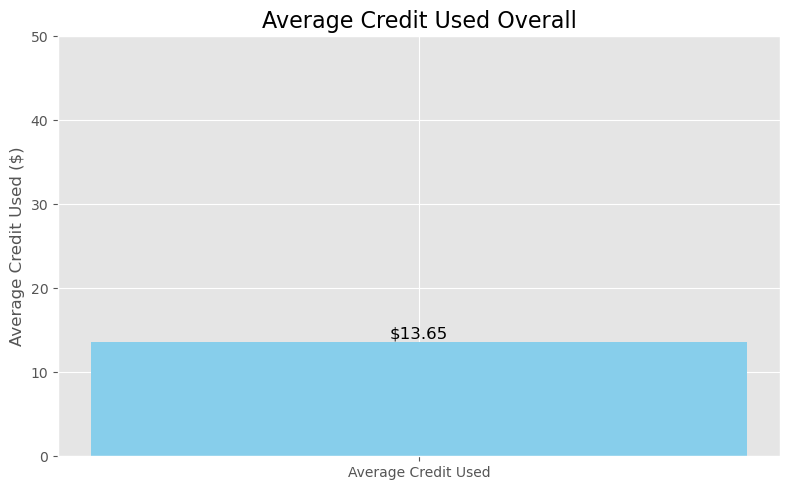

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('out1.csv')

# Calculate the average credit used (initial credit = $50)
df['Credit Used'] = 50- df['Extracted Final Balance']
avg_credit_used = df['Credit Used'].mean()

print(f"Average credit used overall: ${avg_credit_used:.2f}")

# Create a bar chart for average credit used
plt.figure(figsize=(8, 5))
plt.bar(['Average Credit Used'], [avg_credit_used], color='skyblue')

# Add data label
plt.text(0, avg_credit_used, f"${avg_credit_used:.2f}", ha='center', va='bottom', fontsize=12)

# Formatting the chart
plt.title('Average Credit Used Overall', fontsize=16)
plt.ylabel('Average Credit Used ($)', fontsize=12)
plt.ylim(0, 50)  # Since max credit = $50
plt.xticks(fontsize=10)

# Show and save the plot
plt.tight_layout()
#plt.savefig('avg_credit_used_overall.png')
plt.show()


Top 10 Departments by Number of Students Who Used Credit:
                                    Department  Students Used Credit
89                        No Major Selected EG                    74
78              Mechanical Engineering - BSMEE                    35
9                            Architecture - BA                    33
18              Biomedical Engineering - BSBME                    17
1                   Aerospace Engineering - BS                    16
94      Optical Sciences & Engineering - BSOSE                    14
34                       Computer Science - BS                    12
115                           Studio Art - BFA                     8
24                  Business Management - BSBA                     8
43   Electrical & Computer Engineering - BSECE                     7


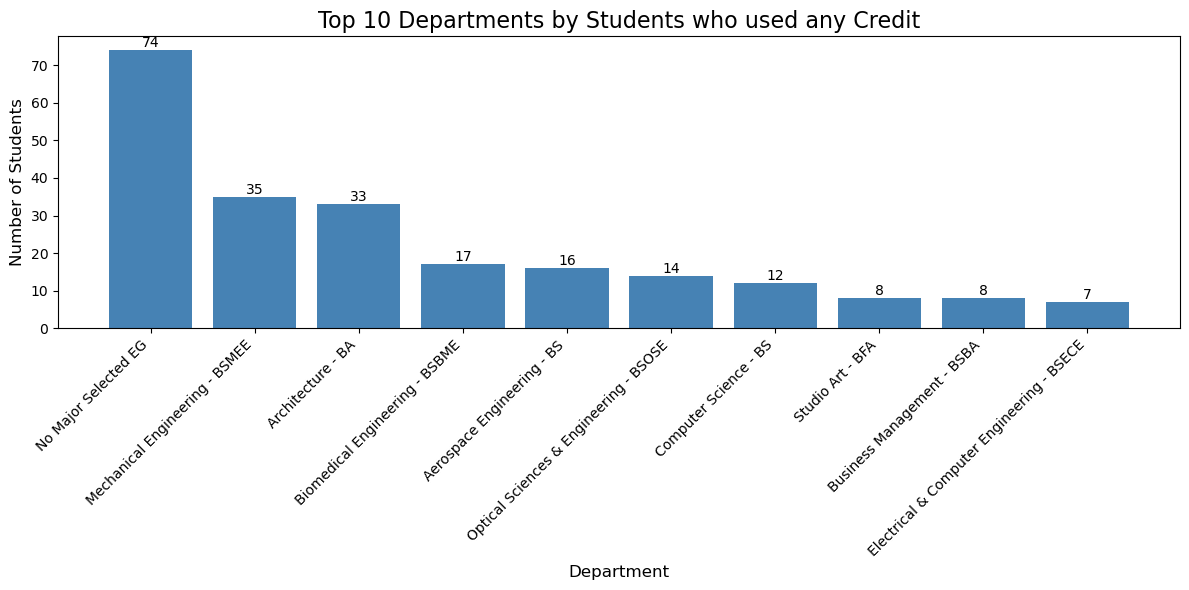

In [31]:
# Top 10 departments by number of students who used any credit
top_departments = (
    df[df['Extracted Final Balance'] < 50]
    .groupby('Statistical Category 03')['Primary Identifier']
    .nunique()
    .reset_index()
    .rename(columns={
        'Statistical Category 03': 'Department',
        'Primary Identifier': 'Students Used Credit'
    })
    .sort_values(by='Students Used Credit', ascending=False)
    .head(10)
)

# Display results
print("Top 10 Departments by Number of Students Who Used Credit:")
print(top_departments)

# Optional: Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bars = plt.bar(top_departments['Department'], top_departments['Students Used Credit'], color='steelblue')
plt.title('Top 10 Departments by Students who used any Credit', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()
